<a href="https://colab.research.google.com/github/totalleecher/codemaster-mm/blob/master/All_in_One_3.0.0%20Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/totalleecher/Codemaster">
<img src="https://github.com/fluidicon.png" height=100px, align="left"></a>



<center><h1><b>Welcome to My Page</h1></b><h5>You can remote upload and download torrent to your <b>Google Drive</b> Here</center></h5>



In [ ]:
#@markdown <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png" height=30px>      ___Mount / Unmount Gdrive!___
#@markdown <center><h6>Mount Gdrive to /content/drive</h6></center>



MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

In [ ]:
#@title ← Check Your Notebook Info (Optional)
#@markdown - Your CPU total threads should be <b>40</b> in <b>TPU Mode</b>, otherwise process may slow.
from psutil import *
!nvidia-smi
!python -V
#!cat /proc/version
!lscpu |grep 'Model name'
#!cat /proc/cpuinfo
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache"
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep "MHz"
print("Total No of Thread(s) " + str(cpu_count()))

!cat /proc/meminfo | grep 'MemAvailable'
virtual_memory()
!df -h
!df -h / | awk '{print $4}'

# <center><b>Direct Link, Spotify, You Tube Link, Yandex, Google Drive Downloaders</b><h5>All of hidden cells are direct downloaders</center></h5>

## <img src='https://raw.githubusercontent.com/totalleecher/Google-Colab-CloudTorrent/master/src/aria2cli.png' height="30" alt="aira2"/> <font size=1px >___Direct link downloader / Remote Uploading___</font>
___Auto share link supported : Disk.yandex.com, Gdrive and youtube-dl all extractor...___

In [ ]:
%cd /content/drive/My Drive
%mkdir DirectDownload

#

URL = "http://download1475.mediafire.com/lwwlpamtja6g/dkw0f1p5j6ysjz5/The.Boat.2018.BDRip.1080p.720.mp4" #@param {type:"string"}
#@markdown <center><h5>Default output path <b>/content/drive/My Drive/DirectDownload</b></h5></center>
OUTPUT_PATH = "/content" #@param {type:"string"}

import pathlib
import shutil
import hashlib
import requests
from urllib.parse import urlparse
from os import path, mkdir
if not path.exists("/root/.ipython/ttmg.py"): 
    from subprocess import run
    from shlex import split

    shellCmd = "wget -qq https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py \
                    -O /root/.ipython/ttmg.py"
    run(split(shellCmd))
from ttmg import updateCheck, runSh

def youtubedlInstall():
  if not path.isfile("/usr/local/bin/youtube-dl"):
    cmdC = "rm -rf /content/sample_data/ && " \
            " mkdir -p -m 666 /root/.YouTube-DL/ &&" \
            " apt-get install atomicparsley &&" \
            " curl -L https://yt-dl.org/downloads/latest/youtube-dl " \
            "-o /usr/local/bin/youtube-dl &&" \
            " chmod a+rx /usr/local/bin/youtube-dl"
    get_ipython().system_raw(cmdC)

def aria2Install():
  runSh('apt install -y aria2')

def istmd(URL): 
  link = urlparse(URL)
    
  #YandexDisk
  if link.netloc == "yadi.sk":
    API_ENDPOINT = 'https://cloud-api.yandex.net/v1/disk/public/resources/' \
                    '?public_key={}&path=/{}&offset={}'
    dry = False
    def md5sum(file_path):
        md5 = hashlib.md5()
        with open(file_path, 'rb') as f:
            for chunk in iter(lambda: f.read(128 * md5.block_size), b''):
                md5.update(chunk)
        return md5.hexdigest()


    def check_and_download_file(target_path, url, size, checksum):
        if path.isfile(target_path):
            if size == path.getsize(target_path):
                if checksum == md5sum(target_path):
                    print('URL {}'.format(url))
                    print('skipping correct {}'.format(target_path))
                    return
        if not dry:
            print('URL {}'.format(url))
            print('downloading {}'.format(target_path))
            runSh(f'aria2c -x 16 -s 16 -k 1M -d {OUTPUT_PATH} {url}', output=True)
            # r = requests.get(url, stream=True)
            # with open(target_path, 'wb') as f:
            #     shutil.copyfileobj(r.raw, f)


    def download_path(target_path, public_key, source_path, offset=0):
        print('getting "{}" at offset {}'.format(source_path, offset))
        current_path = path.join(target_path, source_path)
        pathlib.Path(current_path).mkdir(parents=True, exist_ok=True)
        jsn = requests.get(API_ENDPOINT.format(public_key, source_path, offset)).json()
        def try_as_file(j):
            if 'file' in j:
                file_save_path = path.join(current_path, j['name'])
                check_and_download_file(file_save_path, j['file'], j['size'], j['md5'])
                return True
            return False

        # first try to treat the actual json as a single file description
        if try_as_file(jsn):
            return

        # otherwise treat it as a directory
        emb = jsn['_embedded']
        items = emb['items']
        for i in items:
            # each item can be a file...
            if try_as_file(i):
                continue
            # ... or a directory
            else:
                subdir_path = path.join(source_path, i['name'])
                download_path(target_path, public_key, subdir_path)

        # check if current directory has more items
        last = offset + emb['limit']
        if last < emb['total']:
            download_path(target_path, public_key, source_path, last)
    download_path(OUTPUT_PATH, URL, '')
    return False  
  return URL

if not OUTPUT_PATH:
  OUTPUT_PATH = "/content/drive/My Drive/DirectDownload"
  
if not URL == "":
  aria2Install()
  youtubedlInstall()
  try:
    mkdir("DirectDownload")
  except FileExistsError:
    pass
  url = istmd(URL)
  if url != False:
    print('URL {}'.format(URL))
    cmdC = f'youtube-dl -o "{OUTPUT_PATH}/%(title)s" {URL} ' \
            '--external-downloader aria2c ' \
            '--external-downloader-args "-x 16 -s 16 -k 1M"'
    runSh(cmdC, output=True)
else:
  print("Please input url")

##<img src="https://ar.toneden.io/13766685/6070f58d-091b-4a80-bd5c-24378e308116" height="30" alt="Zippyshare logo"/>
___Remote upload from Zippyshare to Google drive___


In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
##@markdown <center><img src="https://ar.toneden.io/13766685/6070f58d-091b-4a80-bd5c-24378e308116" height="100" alt="Zippyshare logo"/></center>
##@markdown <center><h3>Remote upload from Zippyshare to Google drive</h3></center><br>



from IPython.display import HTML, clear_output

%cd /content
!git clone https://github.com/mcrapet/plowshare.git
%cd plowshare
!make install
!plowmod --install
!apt-get install nodejs
!cd ..


clear_output()

print("Server Started Successfully")


In [ ]:
#@markdown <h3>⬅️ Click Here to START Download</h3>

import os
direct_URL = "https://www18.zippyshare.com/v/74wtly9z/file.html" #@param {type:"string"}
output_dir = "/content/drive/My Drive" #@param {type:"string"}

!plowdown "$direct_URL" -o "$output_dir"

%cd /content/

In [ ]:
#@markdown <h3>⬅️ Click Here to START Batch Download</h3>
#@markdown <h5> Make "download.txt" file contaning batch links of zippyshare and upload here to down them all.

%cd /content/plowshare

!rm *.txt

from google.colab import files
files.upload()

import os
output_dir = "/content/drive/My Drive" #@param {type:"string"}

!plowdown "download.txt" -m -o "$output_dir"

%cd /content/





##<left><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/57/01_mega_logo.svg/800px-01_mega_logo.svg.png" height="30" alt="Zippyshare logo"/></left> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png" height=30px align="right">
___Remote upload from Mega, Gdrive to Google drive___

In [ ]:
#@markdown <center><h5>Easy to use but we recommend you to use <font color="red"><b>Jdownloader</b></font> when download from mega.co.nz</h5></center><br>
!pip install mega.py
!pip install gdget

##
import os
from IPython.display import HTML, clear_output
%cd /content/drive/My Drive

Gdrive_url = "" #@param {type:"string"}
MegaNZ_url = "https://mega.nz/file/l8MyzZba#P8WB63QZ83T_opN8TaGAGku43rx2mo9OsplP7j3q4fk" #@param {type:"string"}
#Direct_Link = "" #@param {type:"string"}
Download_from = "MegaNZ" #@param ["MegaNZ", "Gdrive"]
clear_output()
print('Downloading started')

if Download_from == 'MegaNZ':
 os.makedirs("Mega", exist_ok=True)
 %cd Mega
 from mega import Mega
 mega = Mega()
 m = mega.login()
 m.download_url(MegaNZ_url)
 print('Finished')

if Download_from == 'Gdrive':
 os.makedirs("Gdrive", exist_ok=True)
 %cd Gdrive
 !gdget "$Gdrive_url"
 print('Finished')



## <img src='https://biplobsd.github.io/RLabClone/img/title_jdownloader.png' height="30" alt="JDownloader"/>

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute JDownloader
# @markdown Example : totalleecher@gmail.com
NEW_Account = False  # @param {type:"boolean"}
# ================================================================ #

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec

from rlab_utils import handleJDLogin

handleJDLogin(NEW_Account)

## <img src='https://biplobsd.github.io/RLabClone/img/title_youtube-dl.png' height="30" alt="Youtube-DL"/>

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute YouTube-DL
# @markdown 📝 Note: if you want to change an archive file just run this cell again.
Archive = False #@param {type:"boolean"}
# ================================================================ #

import os, uuid, urllib.parse
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files
os.system('sudo pip install youtube_dl')
Links = widgets.Textarea(placeholder='''Video/Playlist Link
(one link per line)''')

VideoQ = widgets.Dropdown(options=["Best Quality (VP9 upto 4K)", "Best Compatibility (H.264 upto 1080p)"])

AudioQ = widgets.Dropdown(options=["Best Quality (Opus)", "Best Compatibility (M4A)"])

Subtitle = widgets.ToggleButton(value=True, description="Subtitle", button_style="info", tooltip="Subtitle")

SavePathYT = widgets.Dropdown(options=["/content", "/content/Downloads"])

AudioOnly = widgets.ToggleButton(value=False, description="Audio Only", button_style="", tooltip="Audio Only")

Resolution = widgets.Select(options=["Highest", "4K", "1440p", "1080p", "720p", "480p", "360p", "240p", "144p"], value="Highest")

Extension = widgets.Select(options=["mkv", "webm"], value="mkv")

UsernameYT = widgets.Text(placeholder="Username")

PasswordYT = widgets.Text(placeholder="Password")

SecAuth = widgets.Text(placeholder="2nd Factor Authentication")

VideoPW = widgets.Text(placeholder="Video Password")

GEOBypass = widgets.Dropdown(options=["Disable", "Hide", "AD", "AE", "AF", "AG", "AI", "AL", "AM", "AO", "AQ", "AR", "AS", "AT", "AU", "AW", "AX", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BL", "BM", "BN", "BO", "BQ", "BR", "BS", "BT", "BV", "BW", "BY", "BZ", "CA", "CC", "CD", "CF", "CG", "CH", "CI", "CK", "CL", "CM", "CN", "CO", "CR", "CU", "CV", "CW", "CX", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "EH", "ER", "ES", "ET", "FI", "FJ", "FK", "FM", "FO", "FR", "GA", "GB", "GD", "GE", "GF", "GG", "GH", "GI", "GL", "GM", "GN", "GP", "GQ", "GR", "GS", "GT", "GU", "GW", "GY", "HK", "HM", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IM", "IN", "IO", "IQ", "IR", "IS", "IT", "JE", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KP", "KR", "KW", "KY", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MF", "MG", "MH", "MK", "ML", "MM", "MN", "MO", "MP", "MQ", "MR", "MS", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NC", "NE", "NF", "NG", "NI", "NL", "NO", "NP", "NR", "NU", "NZ", "OM", "PA", "PE", "PF", "PG", "PH", "PK", "PL", "PM", "PN", "PR", "PS", "PT", "PW", "PY", "QA", "RE", "RO", "RS", "RU", "RW", "SA", "SB", "SC", "SD", "SE", "SG", "SH", "SI", "SJ", "SK", "SL", "SM", "SN", "SO", "SR", "SS", "ST", "SV", "SX", "SY", "SZ", "TC", "TD", "TF", "TG", "TH", "TJ", "TK", "TL", "TM", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "UM", "US", "UY", "UZ", "VA", "VC", "VE", "VG", "VI", "VN", "VU", "WF", "WS", "YE", "YT", "ZA", "ZM", "ZW"])

ProxyYT = widgets.Text(placeholder="Proxy URL")

MinSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Min:")

MaxSleep = widgets.BoundedIntText(value=0, min=0, max=300, step=1, description="Max:")

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def upload_archive():
  if ask_yes_no("Do you already have an archive file? (y/n)", default="", interrupt=""):
    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Please upload an archive from your computer.</h2><br>"))
      UploadConfig = files.upload().keys()
      clear_output(wait=True)
      if len(UploadConfig) == 0:
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been cancelled during upload file.</h2><br></center>"))
      elif len(UploadConfig) == 1:
        for fn in UploadConfig:
          if os.path.isfile("/content/" + fn):
            get_ipython().system_raw("mv -f " + "\"" + fn + "\" /root/.youtube-dl.txt && chmod 666 /root/.youtube-dl.txt")
            AudioOnly.observe(AudioOnlyChange)
            Subtitle.observe(SubtitleChange)
            AudioQ.observe(AudioQChange)
            ShowYT()
          else:
            return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">File upload has been failed during upload file.</h2><br></center>"))
      else:
        for fn in UploadConfig:
          get_ipython().system_raw("rm -f " + "\"" + fn + "\"")
        return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Please uploading only one file at a time.</h2><br></center>"))
    except:
      clear_output(wait=True)
      return display(HTML("<center><h2 style=\"font-family:Trebuchet MS;color:#ce2121;\">Error occurred during upload file.</h2><br></center>"))
  else:
    get_ipython().system_raw("touch '/root/.youtube-dl.txt'")
    AudioOnly.observe(AudioOnlyChange)
    Subtitle.observe(SubtitleChange)
    AudioQ.observe(AudioQChange)
    ShowYT()

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/Downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content", "/content/Downloads"]

def AudioOnlyChange(change):
  if change["type"] == "change" and change["new"]:
    VideoQ.disabled = True
    Subtitle.disabled = True
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = True
    Extension.options = ["best", "aac", "flac", "mp3", "m4a", "opus", "vorbis", "wav"]
    Extension.value = "best"
    AudioOnly.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    VideoQ.disabled = False
    Subtitle.disabled = False
    if Subtitle.value:
      Subtitle.button_style = "info"
    else:
      Subtitle.button_style = ""
    Resolution.disabled = False
    if AudioQ.value == "Best Quality (Opus)":
      Extension.options = ["mkv", "webm"]
    else:
      Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"
    AudioOnly.button_style = ""

def SubtitleChange(change):
  if change["type"] == "change" and change["new"]:
    Subtitle.button_style = "info"
  elif change["type"] == "change" and change["new"] == False:
    Subtitle.button_style = ""

def AudioQChange(change):
  if change["type"] == "change" and change["new"] == "Best Quality (Opus)":
    Extension.options = ["mkv", "webm"]
    Extension.value = "mkv"
  elif change["type"] == "change" and change["new"] == "Best Compatibility (M4A)":
    Extension.options = ["mkv", "mp4", "webm"]
    Extension.value = "mkv"

def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  display(widgets.HBox([widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      widgets.HTML("<b style=\"color:#888888;\">For website that require an account:</b>"), UsernameYT, PasswordYT, SecAuth, VideoPW,
                                      widgets.HTML("<b><a href=\"https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements\" target=\"_blank\">GEO Bypass Country:</a></b>"), GEOBypass,
                                      widgets.HTML("<b style=\"color:#888888;\">Proxy:</b>"), ProxyYT,
                                      widgets.HTML("<b style=\"color:#888888;\">Sleep Interval (second):</b>"), MinSleep, MaxSleep]),
                        widgets.VBox([widgets.HTML("<b style=\"color:#888888;\">Video Quality:</b>"), VideoQ, widgets.HTML("<b style=\"color:#888888;\">Resolution:</b>"), Resolution,
                                      widgets.HTML("<b style=\"color:#888888;\">Audio Quality:</b>"), AudioQ, widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Options:</b>"), widgets.HBox([Subtitle, AudioOnly]),
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), ExtraArg])]), HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"),
          SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    # Account Check
    if UsernameYT.value.strip() and PasswordYT.value.strip():
      accountC = "--username \"" + UsernameYT.value + "\" --password \"" + PasswordYT.value + "\""
    else:
      accountC = ""
    if SecAuth.value.strip():
      secauthC = "-2 " + SecAuth.value
    else:
      secauthC = ""
    if VideoPW.value.strip():
      videopwC = "--video-password " + VideoPW.value
    else:
      videopwC = ""
    # Proxy
    if ProxyYT.value.strip():
      proxyytC = "--proxy " + ProxyYT.value
    else:
      proxyytC = ""
    # GEO Bypass
    if GEOBypass.value == "Disable":
      geobypass = ""
    elif GEOBypass.value == "Hide":
      geobypass = "--geo-bypass"
    else:
      geobypass = "--geo-bypass-country " + GEOBypass.value
    # Video Quality
    if VideoQ.value == "Best Quality (VP9 upto 4K)":
      videoqC = "webm"
    else:
      videoqC = "mp4"
    # Audio Quality
    if AudioQ.value == "Best Quality (Opus)":
      audioqC = "webm"
    else:
      audioqC = "m4a"
    # Audio Only Check
    if AudioOnly.value:
      subtitleC = ""
      thumbnailC = ""
      extC = "-x --audio-quality 0 --audio-format " + Extension.value
      codecC = "bestaudio[ext=" + audioqC + "]/bestaudio/best"
    else:
      if Subtitle.value:
        subtitleC = "--all-subs --convert-subs srt --embed-subs"
      else:
        subtitleC = ""
      if Extension.value == "mp4":
        thumbnailC = "--embed-thumbnail"
      else:
        thumbnailC = ""
      extC = "--merge-output-format " + Extension.value
      if Resolution.value == "Highest":
        codecC = "bestvideo[ext=" + videoqC + "]+bestaudio[ext=" + audioqC + "]/bestvideo+bestaudio/best"
      else:
        codecC = "bestvideo[ext=" + videoqC + ",height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio[ext=" + audioqC + "]/bestvideo[height<=" + Resolution.value.replace("4K", "2160").replace("p", "") + "]+bestaudio/bestvideo+bestaudio/best"
    # Archive
    if os.path.isfile("/root/.youtube-dl.txt"):
      archiveC = "--download-archive \"/root/.youtube-dl.txt\""
    else:
      archiveC = ""
    # Sleep Interval
    if MinSleep.value > 0 and MaxSleep.value > 0:
      minsleepC = "--min-sleep-interval " + MinSleep.value
      maxsleepC = "--max-sleep-interval " + MaxSleep.value
    else:
      minsleepC = ""
      maxsleepC = ""
    # Extra Arguments
    extraargC = ExtraArg.value
    for Link in Links.value.splitlines():
      clear_output(wait=True)
      Count += 1
      display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Processing link " + str(Count) + " out of " + Total + "</h3>"))
      if "youtube.com" in Link or "youtu.be" in Link:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading...</h3><br>"), YouTubeVideo(Link, width=640, height=360), HTML("<br>"))
      else:
        display(HTML("<h3 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Currently downloading <a href=\"" + Link + "\">" + Link + "</a></h3><br>"))
      if ("youtube.com" in Link or "youtu.be" in Link) and "list=" in Link:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(playlist)s/%(playlist_index)s - %(title)s.%(ext)s" "$Link"
      else:
        !youtube-dl -i --no-warnings --yes-playlist --add-metadata $accountC $secauthC $videopwC $minsleepC $maxsleepC $geobypass $proxyytC $extC $thumbnailC $subtitleC $archiveC $extraargC -f "$codecC" -o "/root/.YouTube-DL/%(title)s.%(ext)s" "$Link"
      if not os.path.exists(SavePathYT.value):
        get_ipython().system_raw("mkdir -p -m 666 " + SavePathYT.value)
      get_ipython().system_raw("mv /root/.YouTube-DL/* '" + SavePathYT.value + "/'")
    # Archive Download
    if os.path.isfile("/root/.youtube-dl.txt"):
      files.download("/root/.youtube-dl.txt")
    ShowYT()

if not os.path.isfile("/usr/local/bin/youtube-dl"):
  get_ipython().system_raw("rm -rf /content/sample_data/ && mkdir -p -m 666 /root/.YouTube-DL/ && apt-get install atomicparsley && curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl && chmod a+rx /usr/local/bin/youtube-dl")
if Archive:
  upload_archive()
else:
  AudioOnly.observe(AudioOnlyChange)
  Subtitle.observe(SubtitleChange)
  AudioQ.observe(AudioQChange)
  ShowYT()

##URL Hash
___Convert direct HTTP link to .torrent___

In [ ]:
import os, sys, re
#@markdown <h3>Please input url to make a torrent file</h3>

!cd /content/

#Install mktorrent
os.system('git clone https://github.com/pobrn/mktorrent.git')
%cd /content/mktorrent
os.system('make install')



url =  "" #@param {type:"string"}

if url != "":     
#Download file
 !wget "$url"

#Getting file name
 filename = url.split("/")[-1]
 split_string = filename.split(".", 1)
 tfilename = split_string[0]
 print(tfilename)
 print(filename)
 print(url)
      


#Create torrent using mktorrent
 !mktorrent -o "$tfilename".torrent -w "$url" "$filename"

 torrent = (tfilename)+"."+"torrent"

 from google.colab import files
 files.download(torrent) 

else:
 print("Please input url")

#Beta version V1.0 by Codemaster

##<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Pornhub-logo.svg/512px-Pornhub-logo.svg.png' height="30" alt="filebrowser" />  <h5>

In [ ]:
#@markdown <h3>⬅️ Click Here to Install Require Modules</h3>
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip3 install youtube-dl')
os.system('pip3 install prettytable')
os.system('pip3 install bs4')
os.system('pip3 install requests')
%cd /content
os.system('git clone https://github.com/mariosemes/PornHub-downloader-python.git')

clear_output()
print("Install Finished")

In [ ]:
#@markdown <h3>⬅️ Click Here to download video</h3>

#@markdown - Single Download link Eg: https://www.pornhub.com/view_video.php?viewkey=ph5d69a2093729e
#@markdown - The batch option will ask you for the full path of your .txt file where you can import multiple URLs at once.Take care that every single URL in the .txt file is in his own row.



pornhub_url = '' #@param {type: "string"}
option = "single_download" #@param ["single_download", "batch_download","add","delete"]

%cd PornHub-downloader-python

if option == 'single_download':
  !python3 phdler.py custom "$pornhub_url"

elif option == 'add':
  !python3 phdler.py add "$pornhub_url"

elif option == 'delete':
  !python3 phdler.py delete "$pornhub_url"

else:
  !python3 phdler.py custom batch 

## <img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="30" alt="pyLoad" /> <font size=1px>___PyLoad___</font>

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
##@markdown <br><center><img src='https://github.com/pyload/pyload-webui/raw/master/media/banner.png' height="100" alt="pyLoad"/></center>
##@markdown <center><h3>pyLoad Webinterface<br />The free and open-source Download Manager written in pure Python</h3></center><br>
import os, pathlib, zipfile, re, threading
import urllib.request
from IPython.display import HTML, clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "SA" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
#@markdown Default <br>&emsp;username : admin<br>&emsp;password : admin
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")


from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    findProcess
)

loadingAn()

os.makedirs('downloads', exist_ok=True)
os.makedirs('tools/pyload', exist_ok=True)

# Downloading latest version of pyload
if not os.path.exists("tools/pyload/pyload-stable"):
  urlF = 'https://github.com/pyload/pyload/archive/stable.zip'
  conf = 'https://raw.githubusercontent.com/totalleecher/' \
          'OneClickRun/master/res/appdata/pyload/pyload.conf'
  db = 'https://github.com/totalleecher/OneClickRun/raw/master/' \
        'res/appdata/pyload/files.db'
  urllib.request.urlretrieve(urlF, 'tools/pyload.zip')
  urllib.request.urlretrieve(conf, 'tools/pyload/pyload.conf')
  urllib.request.urlretrieve(db, 'tools/pyload/files.db')
  with zipfile.ZipFile('tools/pyload.zip', 'r') as zip_ref:
      zip_ref.extractall('tools/pyload')
  try:
    pathlib.Path('tools/pyload.zip').unlink()
  except FileNotFoundError:
    pass

  # runSh("apt install -y python-pycurl python-qt4 tesseract-ocr libtesseract-dev")
  # runSh("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr")

  # Using Threading to install
  threadRun = [
    threading.Thread(target=runSh, args=("apt install -y python-pycurl python-qt4 tesseract-ocr libtesseract-dev",)),
    threading.Thread(target=runSh, args=("pip2 install pycrypto pyOpenSSL Jinja2 tesseract tesseract-ocr",))
  ]
  for perTh in threadRun:perTh.start()
  for perTh in threadRun:perTh.join()

if not findProcess("python2.7", "pyLoadCore.py"):
  runCmd = "python2.7 /content/tools/pyload/pyload-stable/pyLoadCore.py" \
          " --configdir=/content/tools/pyload" \
          " --no-remote" \
          " --daemon"
  runSh(runCmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfig', 53682, 'http'], 
                            ['pyload', 8000, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/rclonePyload.yml", 4074]
).start('pyload')

## <img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/spotify-downloader.png' height="30" alt="spotify-downloader" /> ___spotify-downloader___

In [ ]:
##@markdown <br><center><img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/spotify-downloader.png' height="100" alt="spotify-downloader"/></center>
#@markdown <center><h7>Download Spotify playlists from YouTube with albumart and meta-tags</h7></center><br>

import os, uuid, urllib.parse, re
import ipywidgets as widgets

from glob import glob
from urllib.parse import urlparse, parse_qs
from IPython.display import HTML, clear_output, YouTubeVideo
from IPython.utils.io import ask_yes_no
from google.colab import output, files


os.makedirs('tools/spotify-downloader/', exist_ok=True)
os.makedirs('downloads', exist_ok=True)
LATEST_VERSION = False #@param {type:"boolean"}

SET_VERSION = "2.0.8" #@param {type:"string"}
#@markdown  <font size='2px'>`https://pypi.org/project/spotdl/#history`</font>
# # Config files
# data = """spotify-downloader:
#   avconv: false
#   download-only-metadata: false
#   dry-run: false
#   file-format: '{artist} - {track_name}'
#   folder: /home/user/Music
#   input-ext: .m4a
#   log-level: INFO
#   manual: false
#   music-videos-only: false
#   no-fallback-metadata: false
#   no-metadata: false
#   no-spaces: false
#   output-ext: .mp3
#   overwrite: prompt
#   search-format: '{artist} - {track_name} lyrics'
#   skip: null
#   spotify_client_id: 4fe3fecfe5334023a1472516cc99d805
#   spotify_client_secret: 0f02b7c483c04257984695007a4a8d5c
#   trim-silence: false
#   write-successful: null
#   write-to: null
#   youtube-api-key: null
# """
# with open('tools/spotify-downloader/config.yml', 'w') as wnow:
#   wnow.write(data)

Links = widgets.Textarea(placeholder='''Link list
(one link per line)''')

fileFormat = widgets.Text(
    value='{artist} - {track_name}',
    placeholder='File name format',
    description="""File Name : file format to save the downloaded track with, each
                        tag is surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

searchFormat = widgets.Text(
    value='{artist} - {track_name} lyrics',
    placeholder='Search format',
    description="""Search Format : search format to search for on YouTube, each tag is
                        surrounded by curly braces. Possible formats:
                        ['track_name', 'artist', 'album', 'album_artist',
                        'genre', 'disc_number', 'duration', 'year',
                        'original_date', 'track_number', 'total_tracks',
                        'isrc']""",
    disabled=False
)

tab = widgets.Tab()

LinksType = widgets.RadioButtons(
    options=['Songs', 'Playlist', 'Album', 'Username', 'Artist'],
    value='Songs',
    layout={'width': 'max-content'},
    description='Links type:',
    disabled=False,
)

SavePathYT = widgets.Dropdown(options=["/content/downloads", "/content"])

Extension = widgets.Select(options=["flac", "mp3", "m4a"], value="mp3")

TrimSilence = widgets.ToggleButton(
    value=False,
    description='Trim silence',
    disabled=False,
    button_style='',
    tooltip='remove silence from the start of the audio',
    icon='check'
)

writeM3u = widgets.ToggleButton(
    value=False,
    description='Write .m3u playlist',
    disabled=False,
    button_style='',
    tooltip='''generate an .m3u playlist file with youtube links
               given a text file containing tracks''',
    icon='check'
)

noMeta = widgets.ToggleButton(
    value=False,
    description='No metadata',
    disabled=False,
    button_style='',
    tooltip='do not embed metadata in tracks',
    icon='check'
)

noEnco = widgets.ToggleButton(
    value=False,
    description='No Encoding',
    disabled=False,
    button_style='',
    tooltip='do not encode media using FFmpeg',
    icon='check'
)

overwrite = widgets.Dropdown(
    disabled=False,
    options=['prompt', 'force', 'skip'],
    value='skip',
    description='Overwrite:',
)

quality = widgets.Dropdown(
    disabled=False,
    options=['worst', 'best'],
    value='best',
    description='Quality:',
)

inputExt = widgets.Dropdown(
    disabled=False,
    options=['automatic', 'm4a', 'opus'],
    value='automatic',
    description='Input format:',
)

logLevel = widgets.Dropdown(
    disabled=False,
    options=['INFO', 'WARNING', 'ERROR', 'DEBUG'],
    value='INFO',
    description='Log level:',
)

nf = widgets.ToggleButton(
    value=False,
    description='No fallback metadata',
    disabled=False,
    button_style='',
    tooltip='''do not use YouTube as fallback for metadata if track
                        not found on Spotify''',
    icon='check'
)

dryRun = widgets.ToggleButton(
    value=False,
    description='Dry run',
    disabled=False,
    button_style='',
    tooltip=''' show only track title and YouTube URL, and then skip
                        to the next track (if any)''',
    icon='check'
)

MusicVidOnly = widgets.ToggleButton(
    value=False,
    description='Music Videos Only',
    disabled=False,
    button_style='',
    tooltip='''search only for music videos on Youtube (works only
                        when YouTube API key is set''',
    icon='check'
)

NoSpaces = widgets.ToggleButton(
    value=False,
    description='No Spaces',
    disabled=False,
    button_style='',
    tooltip='''replace spaces with underscores in file names''',
    icon='check'
)

manual = widgets.ToggleButton(
    value=False,
    description='manually',
    disabled=False,
    button_style='',
    tooltip='''choose the track to download manually from a list of
                        matching tracks''',
    icon='check'
)

nr = widgets.ToggleButton(
    value=False,
    description='Keep original',
    disabled=False,
    button_style='',
    tooltip='''do not remove the original file after conversion''',
    icon='check'
)

ExtraArg = widgets.Text(placeholder="Extra Arguments")

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

def RefreshPathYT():
  if os.path.exists("/content/drive/"):
    if os.path.exists("/content/drive/Shared drives/"):
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/") + glob("/content/drive/Shared drives/*/")
    else:
      SavePathYT.options = ["/content", "/content/downloads", "/content/drive/My Drive"] + glob("/content/drive/My Drive/*/")
  else:
    SavePathYT.options = ["/content/downloads", "/content"]


def ShowYT():
  clear_output(wait=True)
  RefreshPathYT()
  mainTab = widgets.Box([
                        widgets.HBox([widgets.VBox([
                                      widgets.HTML("<b style=\"color:#888888;\">Link:</b>"), Links,
                                      LinksType, searchFormat, fileFormat, 
                                      widgets.HBox([TrimSilence, writeM3u, noMeta]),
                                      widgets.HBox([nf, dryRun, MusicVidOnly]),
                                      widgets.HBox([NoSpaces, manual, nr]),
                                      widgets.HBox([noEnco])
                                      ]),
                        widgets.VBox([
                                      widgets.HTML("<b style=\"color:#888888;\">Extension:</b>"), 
                                      Extension,
                                      widgets.HTML("<b style=\"color:#888888;\">Extra Arguments:</b>"), 
                                      ExtraArg, overwrite, quality, inputExt, 
                                      logLevel])
                        ])])
  
  tab.children = [mainTab]
  tab.set_title(0, 'spotify-downloader')
  display(HTML("<style>widget-tab-bar {display: none;}</style>"))
  display(tab)
  display(HTML("<h4 style=\"color:#888888;\">Save Location:</h4>"), SavePathYT, MakeButton("Refresh", RefreshPathYT, ""))
  if not os.path.exists("/content/drive/"):
    display(HTML("*If you want to save in Google Drive please run the cell below."))
  display(HTML("<br>"), MakeButton("Download", DownloadYT, "info"))

def DownloadYT():
  if Links.value.strip():
    Count = 0
    Total = str(len(Links.value.splitlines()))
    
    if writeM3u.value:
      M3u = '--write-m3u'
    else:
      M3u = ''
    
    if TrimSilence.value:
      trmS = '--trim-silence'
    else:
      trmS = ''
    
    if noMeta.value:
      noM = '--no-metadata'
    else:
      noM = ''
    
    if noEnco.value:
      noE = '--no-encode'
    else:
      noE = ''

    if not overwrite.disabled:
      oW = f'--overwrite {overwrite.value}'
    else:
      oW = ''

    if not quality.disabled:
      qL = f'--quality {quality.value}'
    else:
      qL = ''
    
    if not inputExt.disabled:
      iE = f'--input-ext {inputExt.value}'
    else:
      iE = ''

    if not logLevel.disabled:
      lL = f'--log-level {logLevel.value}'
    else:
      lL = ''

    if nf.value:
      nfv = '--no-fallback-metadata'
    else:
      nfv = ''
    
    if dryRun.value:
      drR = '--dry-run'
    else:
      drR = ''
    
    if MusicVidOnly.value:
      MsV = '--music-videos-only'
    else:
      MsV = ''
    
    if NoSpaces.value:
      NoS = '--no-spaces'
    else:
      NoS = ''
    
    if manual.value:
      mal = '--manual'
    else:
      mal = ''
    
    if nr.value:
      nro = '--no-remove-original' 
    else:
      nro = ''
    
    if not searchFormat.value == '{artist} - {track_name} lyrics':
      seFor = f'--search-format "{searchFormat.value}"'
    else:
      seFor = ''
    
    if not fileFormat.value == '{artist} - {track_name}':
      fiFor = f'--file-format "{fileFormat.value}"'
    else:
      fiFor = ''
    
    if not LinksType.value == 'Songs':
      with open('tools/spotify-downloader/finish.txt', 'a+') as master:
        for Link in Links.value.splitlines():
          if LinksType.value == 'Playlist':
            outFileName = !spotdl --playlist $Link
          elif LinksType.value == 'Album':
            outFileName = !spotdl --album $Link
          elif LinksType.value == 'Username':
            outFileName = !spotdl -u $Link
          elif LinksType.value == 'Artist':
            outFileName = !spotdl --all-albums $Link
          filename = re.search(r"to\s(.+\.txt)", outFileName[-1]).group(1)
          with open(filename, 'r') as r:
            master.write(r.read())
    else:
      for Link in Links.value.splitlines():
        with open('tools/spotify-downloader/finish.txt', 'w') as master:
          master.write(Link)
    # Extra Arguments
    
    extraargC = ExtraArg.value
    cmd = r"spotdl -l 'tools/spotify-downloader/finish.txt' " \
      fr"-f '{SavePathYT.value}' " \
      fr"-o {Extension.value} " \
      f"{seFor} {fiFor} " \
      f"{M3u} {trmS} {oW} {noM} {noE} {nfv} {drR} {MsV} {NoS} {mal} {nro}" \
      f"{qL} {iE} {lL}" 
    !$cmd
    ShowYT()

if not os.path.isfile("/usr/local/bin/spotdl"):
  get_ipython().system_raw(f"pip3 install spotdl{'=='+SET_VERSION if LATEST_VERSION else ''} && apt -y install ffmpeg")

ShowYT()

## 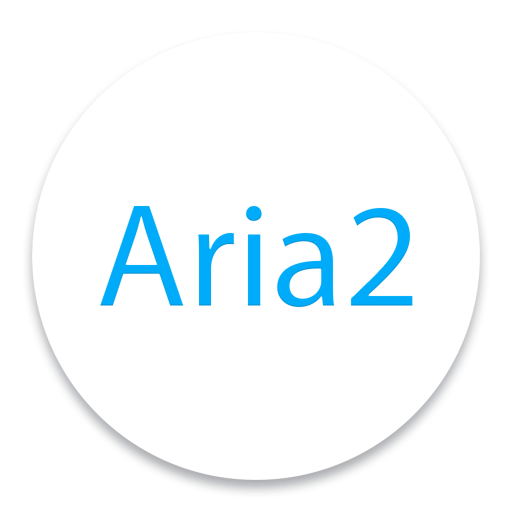<font size=1px>___aria2___</font>

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
##@markdown <br><center><img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAYAAAD0eNT6AAAAAXNSR0IArs4c6QAAQABJREFUeAHsnQmAFMX1/2vu2Zm92WUvll1gOZf7EFGURUSNioqCR7x+uYzxSmKiOX6JMYcxasypifrTvz/vKMbkJ0ZRUdAEI6IED0BlkeWQa4GFvY85/t/XM7XbOzuz07M709Oz8wpmu6enu7rqU931Xr2qeiUEBybABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAJMgAkwASbABJgAE2ACTIAJMAEmwASYABNgAkyACTABJsAEmAATYAKDJWAabAR8PRNgAroRSJX31a8bEb4RE2ACAyZgHfCVfCETYALxJKBFuGs5h9KE85ZjU2+qqaGv6lCj/hJmf22fY2vXFkKgr6Dj8RTs8YyrT5r5ABNgAtEJaK1QosfEZzABJhCNQH/vW4TflkOI15vGjRtnuu666zJzcnLybDZXrt1ly82w2TL9fnOW1WrKMplMubh5rt/vzzWbzS58z8B3ZUvfvV5vBrZWHCel3xzcqtPrwbU+HPDgXI/JZGkXwteOY9iaWvBTC35r8ZtMR4XPdxTH6dPk8/maOjt9TV1dnobm5oaG7du3H73ttnU4d60IKg6RBH2k45Sm/n6j3zkwASYQBwIRKp04xMxRMIH0JRDpvQpznAR8tennP1+UVVVVVeJ0OousVkeRxSLKrFZrGRCWQXCX4jMc+24IbjsErx379qAQJ4EeJl4cTXwgQU2KAxQGUwf2O7HfSQqDz+et9/nEXigRn0NJwMf0eUdH64H29vYD9fX1+2644bmmtWs34/oV4YR9uGOUm0jH6TcOTIAJxEggWRVHjMnk05mAIQlEen9Cj5uWL18ulixZ4jzppJPK8/PzK9AYr7DbrVUQ7GORs9EWi2UYthkQpE5s6WPGZygFsi4ELQqiDfuHvT7fZz6vdxuUhtoOj2fnkfrGnf/854e7V658sH3FirBdDpEUgEjHhxI/zgsTiDuB0Ioq7jfgCJnAECIQ7n0JObbcdOut1ZYrrriqJD/fNRYt+rEQ8pMg2CdByI8Giyx8MvHdMYS4DDorUAI6wKQZ2yZE9pnH49kCC8IWj6dzGywGtY888sjeW2/d7A1jMQgn/MMdG3QaOQImMNQIhFReQy17nB8mMGAC4d6N0GMQ9rdaLr30y+XDh+eMt9lskyHkp8N0PwXCbDg+JOypL57DwAmQtaAJisFBKAUf4rMJ4x4+qq/fv/WXv/zlngceeIAsC6ECP/Q73T3cMTrOgQmkLYHQCi1tQXDG055AuHdBfQz7y8WaNddkTZo0daLL5ZzicNjmQsjPgcAvhoDKwT71zXNIMAGwxjgDcQyfz6EQbMD2naamps0bN27csnjxA81hZiyEE/7hjiU45Rw9EzAWAXUFZ6yUcWqYQOIJhD7/6u8YnFdjuuOOO3JGjx43xe12zEHrfj6E/TQI+mH4uJE89fmJTy3fIRIB6AR+mqVwGAMON0Ip+GdbW9vGrVu3fnjCCT9sxIwEEvZqga/epzhDv9MxDkxgyBPgCmzIFzFnUEUg3POuPmZ69NFHnQsXLq7Ozc2ca7fbF8GsPxPXk8B3qeLhXeMTwNRF/5GgQvBac3Pz+hdffHHzFVdcgWmNvQR+OOEf7pjxc8wpZAIxElBXfjFeyqczgZQgEPqM9/o+a9Ysy1NPPVdeVJR7vMPhWAiBfxKEfQlylo1tSmSQE6mJQCMUgn1QCP7Z1dW15uDBg29feeXDu9auvZXGEKhDqPAP/a4+l/eZQEoT4BoupYuPEx+BQOhzrf5u+s1vfmNfvvySKXl5WQvQyj8Tpv1qCPt8fCwR4uPDQ4uAN2gd2IzughcbGprfeOqp1z+88cYLaWyBWuCr94lA6PehRYVzk3YE1BVj2mWeMzykCIQ+y+rvJph/3TNnzpydnZ29GC39MyHsK/HJHlIEODMDIgBlgKYe7oAHxBdbWlpefeutt94988wzaUyBWuCr9+k+od/pGAcmkFIE1JVkSiWcE8sEQCD0+ZXfle3jj7/oXrx47tycHDe18r+ATzmEPvfl86PTH4FWKAS7Ozs7X2ppaX/xpZfeWn/ZZYoyQNdIoS+3Mp7Q7/I4b5mAoQnICtPQieTEMQEVgdBnVn5Xtvfff79jyZKlaOlnLsE0vbMh9KmlT571ODCBmAhAEaABg3UYM/BCa2vnymeeefLdr3/96+TymIIU+nIbONpzXH7nLRMwLAFZeRo2gZwwJhAkoH5We+1XVy+3rFz524mFRXlnO+32CyD0x0Ho0zQ9DkwgXgSwvoFvG8YMPHv06NEXTjnluq2bN6+AZ8JuRYDuo1YG1PvxSgPHwwTiSkBdkcY1Yo6MCcSBQOjzKb9jW2N65507C8aOHb8YTnm+iNH75JQnLw735CiYQDQCDRgvsL69vevJLVs+fPW4424+FOJrIFT4h36PFj//zgR0ISArVF1uxjdhAhoJqJ9Lua9sv40R/DdfcvlxmKd/EUbwnw0/+zRlj1bE48AE9CZAKyHug1XgBQwefPrhhx9+58Ybb6SZBBSk0Jdb9THlBP7DBJJNQFauyU4H358JhD6L8ju2Naa33vpd0aRJY5a43c4r4I1vKnCxiZ+fGSMRaIFV4AMoA49+/PHOldOnf/0AWwWMVDyclnAEZCUb7jc+xgT0IKB+BnvtU9/+Sy/dPa2goOAyu91xvsWitPZ5rr4epcL3GCgB8jFAVoHnDhw4/MR55/3kP++912fBIrYKDJQuXxdXAuoKN64Rc2RMIAoB9bMn95Xtvffem3HhhReegjn7X0Hf/gL07edEiYt/ZgKGIwBFAOsQiLVwQ/zQY4+tev3aay+klQ0pSAVAbtXHlBP4DxPQg4CsePW4F9+DCYQ+b/I7bU1r1qwpmDZt2tLMzMwvB5fUdTAyJjAECHRAGfgQCxT9v82bN//tuOOOw6BBRQmQCoDcyqyGfpfHecsE4kpAVsBxjZQjYwIhBEKfM/ldEfz/+c/WEVVVIy6Dh74vocVfgWvZzB8CkL8OCQLUPbCzo6Pj4bq6/Y9PnDhqD3JFwl4KfLmVmQ39Lo/zlgnEhYCsiOMSGUfCBEIIhD5f8ju2s8zbtj03tqys8EsQ/F8MjuaXv4dEw1+ZwJAiAD1A7Ovq6nxy//4jD1dUnL1NiPdoUSIp8OVWZjr0uzzOWyYwKAJc4Q4KH18cgUDoc0Xfg8dmmT/5ZMWkiorSq9HaXwbBXxAhDj7MBNKBwCE4GHp25759940+99wt4j1FEaB8k9APFfyh39OBD+cxgQRCK+oE3oqjTgMCoc9TL8H/2WcrJpWUlFyD+fsk+PPTgAdnkQloIgCTwBFSBHbv3//nUeeeu5kVAU3Y+KRBEgitsAcZHV+epgRCn6Negv/jz1ZMrCgpvQ6C/wKz2cSCP00fEs62JgJH4E/gr/v27bunvPy8rcGuAbqQLQKa8PFJsRAIrbhjuZbPZQKhz4/8Tlvz9u3bK9HivxZ9/JehxT+McTEBJqCZwGEsQvTE7gMH7hlTXl6Hq3iMgGZ0fKJWArLC1no+n8cEJAH1syP3sa0xvbv53tLxI0de5XK5vgLBXywv4C0TYAIxE9jf6fE8tGfXrgfGjPnK3n68C/L4gJjR8gWy4mYSTEArAfUzI/dpa1q5cmXuggULroTgvx4r8o2kY1oj5fOYABOISABDBPy7Or3eP/77X/96ZOHChUdxprpLQC381fsRI+QfmAAR4AqanwOtBNTPitynremuux51XPGl05fmZufdbLfZJuEYz+PXSpXPYwLaCZAfgS1NTU13PvDA//3tppuu6MClrAho58dnhhCQFXnIYf7KBLoJqJ8Rua8I/urqavPq1atPyMvL+28M8DsZLnvt3VfxDhNgAoki0AlF4M1jLS23zT/++LfgXVCOD5Ctf7ml+6v3E5UejjdFCcgKPUWTz8lOMAH186EI/cD9akzvvXd35YQJk27KyHBcAsGfleB0cPRMgAn0JdCEGQNP1dXV3VVV9dW64PgAOkttFZDfacuBCfQioK7ge/3AX9KagPq5kPuKAvDEE09knXnmmVdmZWV9B/38I9KaEmeeCRiAAKwBezo7O+/+6+rVj1x69tlNSJJaAVBbANT7Bkg5JyHZBGTlnux08P2NQUD9PMh9RfBXVVVZ1q1bVwNz/61YqGcOWv3cz2+MMuNUMAEiAGOA991jx47dOnfu3DW1tbVeHGNFgJ+NfgnISr7fk/jHtCCgfhYUoR/MtWn9+vXlkydP/r7T6bwU0/rcaUGDM8kEUpAArAEtHp/via2bN/8KK2vuRhZkq1+tDFDO5PEUzCUnOV4EzPGKiONJWQK9hD1yIb9jdP9dzoaGhstnzJixOiMj4yoW/ilbxpzwNCEAy5zbZrFcNWXKlNXNzc2X0zusfqeD+0RDvue0zyFNCdBDwCF9CajLP1gh1GC71vzRR59MHDNm5G1o9S8GHh7dn77PCOc8dQnAh5Dn1d27d//36NFL4Fa4ELMF1kpLgNoCoN5P3dxyymMmwBaAmJENiQuCwl7Ji9xXtn/4w/muww0N10ycWLUKwv8snMHCf0gUOWciDQnYMV7nrFGjRq1qbd1wzR8e/6oLDHq970Em8lgaIkrvLFPBc0gvArLMVdtAq3/btrrJpaWFv4K5fyFMidb0wsK5ZQJDmoAHgwTXfP75wR9gKe4P4bJbbQ2gjEsrgNwOaRicuQABtgCkz5Og1vJVwl+YqdVfX19/w6hRI1bBje9iFv7p81BwTtOGgBXTdhePHFnyUmtr6w30ziPnVP+r6wKCoa4n6DuHIUxAFv4QziJnDQRkOau2SqvfBC9i4yorK+9Eq/80Fvz8rDCBtCBA1oBXPv/885srKio+hTUArf7usQEEQFoB5DYtoKRjJtkCMLRLXa3Nq4S/MF911Tj74cOHLx8/fjy1+s9k4T+0HwTOHRNQESBrwJnl5eUvt7S0XX7VVTU0zoetASpA6bIrhUK65Ded8qku26AiEGj1v/vuuyVw4/tLuPFdjql9PMgvnZ4KzisTUBGA34BOn8+34pNPPvkh1vbYF2INUFsA1PuqGHg3lQmwBSCVSy982oPCXvlR7mNbY6qq2mPZtWvXwilTpr7ocilOfVj4h2fIR5lAWhCA5c+ORsClEydOfBEWwYVUR1BdgcyrP8RCfk8LLumSSVYAhlZJ00sqg3xhqYzN999/iXvDhg03l5WVrbDbbdV48eV5vGUCTCCNCVBdgE91fn7+ig83b775/vuvIW+fSr2BraxHJCGuOCSJIbDlwhwChRjMgixL1ZY0+SbThg33jYYr3984HI7T8aKzD/+hU+acEyYQbwK0psDLtbt23Thh9PLPhMiC6Z8HCMYbslHik8LCKOnhdMROQF2Gch/bWeaqqmPmtWvXnlpYWPh7u90+Jvao+QomwATSkQDGBmw/fPToN+cdd9zq2toc+Ax4D5+wswN4bEAKPyDcBZDChYekS4FPuaB9fGoU090dd1zofPvtd75bUlLyFAt/wsOBCTABrQRgKRwzLDf3qffff/8mqktwHeoVpW4J1jPdManroO6DvJMaBLjwUqOcwqVSXXbBl5JM/mtNWLa3dPr06b/G3P7z8CKzR79w9PgYE2ACWgiQz4C/f/DBB9+dOXPmXigB6i4Bdetfva8lXj7HAATUQsQAyeEkaCQgy021nQUN/T3Ttm3bZo0cOfLPNpttGoS/xuj4NCbABJhAZALoEngf3kK/UVRU9B66FyHsw3YJsBIQGaEhf+EuAEMWS8REkUSXUl3uYzvL/IUvDDfv3bv3Qnj1+xtM/iz8IyLkH5gAE4iVABoT0zCW6G/HmpsvpLqG6hzEoaqDlBjl91ij5/OTRIBHhCcJ/ABuSy+XDMEXjUz+w8y/+tVy169+9asfYBrPbfDwlSdP4i0TYAJMIF4EoARkOuz2M5YvX27PzGzcsHr1ag+6BBB9Xegt1HVV6G/83UAEuKAMVBj9JEVdTrSPDwn/teaVK1cWLly48Ddw53sBXlBW6PqByD8xASYQFwJej8fz3JtvvvntRYsW1aMuUq8sqO4GUO/H5cYcSXwJqAVLfGPm2OJFQJaRahvo79+0adNY+PJ/wOl0zsPN5O/xui/HwwSYABOIRMCPwYH/3rHj86vGjq3YxuMCImEy9nEeA2Ds8pFCXbWF8Mf8/tra2vlw3/l3CP8TkAX5u7Fzw6ljAkxgqBAwobvxhDFjyv++f//++VQnqcYFUB5lnSS3QyXfQyofXDjGLE51udA+PjX4NJkqKw9b1q9fvwz9/b+1Wq0Fxkw+p4oJMIF0IYAZAoeamppunDZt2oq6umHeEO+B6m4A9X664DF0PtkCYLziiSj8lywptcGf//XDhg27j4W/8QqOU8QE0pEAxh4VZGdn/3nLli3XUx1FDZVAg0WxAoTWZ+mIyLB55kFjxiqa0Jcl8CJV15u/9+VLXHfffdutubm5P4DpLcNYyebUMAEmkOYE7GiULLjgggvcmZlN/169799eUV8NJHWhWNR1XOhv/F1nAlwYOgPv53ayLFRbmP0h/B/93vdyzzvvvLsyMzMv5ZH+/RDkn5gAE0g2AW9XV9cTL7zwwk3nn3/+0ZAZApQ22Q0gt8lOb1rfXwqbtIZggMzLclBtAyP9n3rqqaJzzjnnz3DreyaEv/zdAEnmJDABJsAEwhLwY5rgi2+99dY3FixYcIBnCIRlZIiDLFCSXwyyDFTbgPB/7bXXyufNm/cQhP/JSKb8Pfkp5hQwASbABPonQNME38RU5a/Mnj17NysB/cNK1q8sVJJFPnBfyV+1DQj/jRs3VmGa3yMOh2M2N/yTW0h8dybABAZGAErAuzt27Lhy7NixtawEDIxhIq/iWQCJpNt/3CqhL0fLzjJXYT7t+o0bp06aNOkZzPFn4d8/Q/6VCTABAxPAgOXZY8aMeebjjz+eSnWbylcA1X/qOtDAuRi6SZMFMHRzaMycSe7BlwCD/TB1hl6Q559/fsbo0aMfQ8u/yphJ51QxASbABGIj4PP5tu/ateuyxYsX/6e2Ngeug7MwCHAtDQSUH4qQBwbGhnXQZ0tBNOiIOALNBCTzPsL/739/YfbYsaMew2p+ozTHxicyASbABFKAABwG7di3b9/lGBj4LisBxigw7gLQtxwiCn8s6nM8hP+TLPz1LRC+GxNgAvoQwFimUSUlJU+uWbPm+EB3QFiHQbKO1CdRaX4Xhq3fAyBZ0xafHrP/C6tWnTCqvPxRCP8R+iWH78QEmAAT0J8ALAF7Dhw4cMVJJ530FlsC9OevviNbANQ0ErcfUfhTy5+Ff+LAc8xMgAkYiwAsASOKiooeZUtA8stFCqbkp2TopkAypi0+aPnDu19VR4fp73//O/r8x5LZf+TQzT7njAkwASbQlwAGBu7CSoJfVMYEOBx+sbkQgwN5YGBfUok7whaAxLGlmCMK/2eeeWYmhD8N+GPhn9gy4NiZABMwIAGz2TwSYwIee/XVV2dQg4gaRmEWEZJ1qAFzkPpJYriJK0PJlrb4BFr+YvNmE5z8TME8/79gqt+YxN2eY2YCTIAJGJ8ATRGsq6u7GP4CPhTV1WwJ0LHIpJDS8ZZpcSvJtUf4K0tkvmdet27d2FmzZj0N4T8pLUhwJpkAE2ACUQhACdj66aefXgTvp5/CWRD7CYjCK14/cxdAvEj2xBNR+K9atap8xowZD7Pw74HFe0yACTABdAdMHDdu3CPr16+vEOI9yCWeIqjHU8EKQHwphxX+NOcVff5F8+fPf4jc+8b3lhwbE2ACTCD1CUAJmAHr6EP/+Mc/ilkJ0Kc8LfrcJi3uElH4f+m663IvXb78gczMzFMxBUaelxZQOJNMgAkwAa0EoASUV1SMGldRMfKVlSvv7xBiGC4dj0+dOgquQ9U0BrHPCsAg4KkulQ+kajtMWdhn2bJlrm9fe+1vsrOzL2DhryLGu0yACTCBvgRMZrNpbHV1dQkaTKt37vy358gRqlYVJYDWClDVsX0v5iOxEWAFIDZe4c4OfSDxPbCq34gRM2y//e1tP83Ly/sqhD93t4Sjx8eYABNgAioC1FCyWq3V6A7IePvtt9/o7KzzB5SAffKs0DpXHudtjAQkyBgv49ODBCQ/1TYg/FtbWy2bNm26ftiwYT+DWcvOxJgAE2ACTEA7Ab9fdLa2ttyCwYF/dLlc3oDb4PcwQ6B71UC5eqDcao+cz1QISMHFOGInoGZH+/jMMovqdhPm+lt27NhxUXl5+T1YD9sde9R8BRNgAkyACWDdgJZDhw5dP3PmzL/sycnxis1OCPtuJUAt+NX7DE4jATZLawTVz2m9hH9lS4t5y5Yt88vKyn7Nwr8favwTE2ACTCAKAfQGuGFFvQvTA+dT3ao0sKihFRgLoG6ERYmJfw5HgAGGoxL9mOQWFP49Xv7WrFs38YRZs/5qdzhGR4+Gz2ACTIAJMIFoBOAoaMfHH398PgYHbmVvgdFoaf+dLQDaWckzwwp/8mX94INPFB83ffp9LPwlKt4yASbABAZPAOOoRmEswH1//etfi3ndgMHzlDHwLABJQts2ovBfsmSJ+5prvv7HrKzMxYhKnqctVj6LCTABJsAE+iUAJaAM6wWM3L59+ysNn3zSdaQECwjVV+OaOvV1XPeqaUTZZ1hRAKl+lqyC2xpYT5pM5OUPrn1tr7/++o8KCwu/iz4rVqpU0HiXCTABJhBHAt6WlrZfz5075xcdHR1dgZkBWRgAuJZmB1CQgwHlNnCU/4YlIIVa2B/5YDcBNSfaxycw3a+2tt1cV/evS0aMGEEj/jO6r+AdJsAEmAATiDsBzAxoO9TQcP3wYcOerKqq8oVMD1QLfvV+3NMxFCLkMQCxlWKI8K81b9z4/JzS0tJfsfCPDSSfzQSYABMYCAFYWTMK8vJux+qBc2praxWPq8oUbJ4ZEDNOVgCiI5Ot/27hT1NR8OCZHnvsmbLx48ffY7PZCqNHw2cwASbABJhAPAhACSjEeIB7sMJqGdXFEaYHyro7HrccknFwf3X/xSofoKDwp+l+jWaaj/qlL33JddVVX8Ggv6yTEYU8r//Y+FcmwASYABOICwEoAcPhbG1ES0vLqv0ffOA5Wob2LA8KjIktC67IuCQblfCvV4Q/HjjrBx9suqmoqOSHeAitkaPgX5gAE2ACTCCBBDzNza0/r6qad3dGRqO3zu32ic2FGBC4lvr/5Yduz+MBwhQCdwGEgYJDUvirfsWIf8z1r6urM7/55punFRQMv5GFvwoP7zIBJsAE9CdgdbszvrthwwuLqW5WfARgdlaYZIQ7Fua09DrECkD/5R1s/csR/7Xml19+eXTlqFG/xmpVmf1fyr8yASbABJhAogmgIZaFWVh3r1u3YTQPCoyNNo8B6MtLaordwp8GmLhaWixXXnllJj5/drtcs3GZPK9vDHyECTABJsAEdCMAJSCvqKhgzLFj3n989NHGrsZyq1/Uj0Qd3b2EMKWF6+yQEmEgvYFIHrTFpwaD/mS/vxv9/qu/W1RU9CM8bKw49ebG35gAE2ACySbgbWxsvq2q6vi73O4WD48HiF4c3AXQw0gt/HEUwp88/QX7/V955S8L4Onv2yz8e4DxHhNgAkzAQAQsWVnub23Y8I8FvccDUF2uhNCtgZKenKSwAhCee0D4w80v9Sk9/PATZRMmVN0FZz/Z4U/no0yACTABJpBsAmigZZeVld+1atWa0p7xAMqgQCn8k51EQ92fFYBAcciHg7b4YL3pgLMfc01NjePcpWf9zOl0TjBUyXFimAATYAJMoA8Bq9U8YcGC439OdXd7e7tSl4fxFCjr/D7Xp9MBhtAzMCQo/Hv6/WFGsuzYsfOyiory30OzdKTTg8F5ZQJMgAmkMIGOQ4cavllYmP94ZWUl+weIUJBsAegNBkpAT7//iy++OK6kpOgWFv69IfE3JsAEmIDBCTjy83NueeutDeN6jwcgCy8HSSDdR7PLhyHY+pfz/dvNl1xysfuaa75yr8vlmgEFQPLiLRNgAkyACaQAAdTbWZgaWHHwYNsLr776vqeqyiuOHBmFlPPUQFl86SzZZN5pi0/A9C82byalyLJz587r4Gf653iI2NWvfFp4ywSYABNILQKehmPHfpw/duw9or7eK6qrvewquKcA070LIKgE9PT7A415zZo1k0tKSr7Dwr/nQeE9JsAEmEAKErDmZGV9Z+PLr01B2pW1XMi3S2Cat5Ib2RBMwawNPsnpqgCoCx37Pf3+l19+uXvmzJm/wBK/BYPHyzEwASbABJhAMgmYzeaCSZMm/Pzqq6929zMeQC0TkplcXe+djpmWeaYtPoEpf0HTvxUPyNUjR478Jbf+dX0O+WZMgAkwgUQS8DQ0HPthfn7ufbiJJ9AV4MQKge9h5cD0XTUwzS0AZPpvN1W2tBAH8+rVayeUlpZ+l4V/It9DjpsJMAEmoDsBa05O1ncxK2Ai7hzsCmhHAxAyIBDkVveEJfOG6aYAqAsZ+z2m/0WLljpnz57+M6zyNzyZBcL3ZgJMgAkwgfgTQFfA8Jkzp/x06dIrnNwVEOCrFojxJ26sGGVeaYtPL9O/pbZ2x6WjR1f8Aa1/u7GSzalhAkyACTCBOBHoPHTo0A1Y1+UJxBecFZC+XQHpZgEIPkO9Tf8PP/wwlpMu+R4L/zi9YhwNE2ACTMCYBOz5+fnfW7ly5QgkL+27AtJFAQhp/feY/vPyRluXLFlyk8PhqDTm88qpYgJMgAkwgXgRQFdA5SmnnHrT6NGjadC3mVZ8pe5gxC/lBN1KvR+vWxsunnRQAGRBBgs40PqnlaJQGubXXvvbgtzc3IvSpcAN9wRygpgAE2AC+hIwZWQ4L1q9evUC3FZZ8ZUGgwcHBAblhJIgKTv0TZ2Od0sHV8CyEKmAsTJUvWL2OXrUYbnuumtzLr74/D9x61/HJ45vxQSYABNIMgF4d7dnZmWh8W/527p1Wzsr3X5xtKxLiPpqpKwO0wPTI0jhOFRzK/NHW3ykr/9axd3vjh07rquoqCB3v+mgCA3VMuZ8MQEmwAQGQsB7uKHhhwX5+X/Gxd4qLBZQW5sDvwDp4xsgXboAIPx7m/6ffPbZUXD3ez0L/4G8N3wNE2ACTCDlCVjycnJueOHllyuEKOyvKyDlMxopA0NZAZCt/2Dem7od/qDP33paTc23YfovjgSGjzMBJsAEmMDQJoABgaU18+d/JzfXTYu+BWYFBAYEqjMeIkvUP6X2/lBVAGSB0RafgOm/rq6T8mt64aWX5uXk5CwL/JbaBcipZwJMgAkwgQETMLkyMpatW/fyPMRgIhlRVXUMcgJ+YhTZQfJDCXIb/Do0NkNVAVCVTsD07/F4UIB7zTVLljinVld/Fx7/MlUn8S4TYAJMgAmkIQF0A2eOHTvqpiVLLnGSjFBkRc+sgCFNZCgqAFJToy0+PXP+6fu9d955ttvtnj+kS5UzxwSYABNgApoJoEF44h/uvWMJLoAVoI9vALVM0RxnKpw4FEe/BwU/CX9q/Teaj3zyCfJZaLnxxm/nLT3vrHvQ91+aCoXDaWQCTIAJMIHEE6DB4GgYjoZseO711z/sOHJkjxDV+f7gtMDEJyBJdxhqFgCpqQVx9gz8wwRPy/XXf/Uyl8s1KUms+bZMgAkwASZgUAI2q3XSVVdffRnJCiRR7SFQneIQGaP+KfX2h5oCQCUQtACoB/4VmO+///6S4uLib/C0v9R7SDnFTIAJMAEdCFiG5eV9A1PES3AvTAtstUQYEKhDUvS5xVBSAFSaGZn+201y4J8Qh8zw9/9Vp9NJC0BwYAJMgAkwASbQhwCmBY4487TTviry8iAbIw4IVMmaPlGk1IGhogDIAgm2/nsN/DM/8cwzVfkFBVegZOR5KVVInFgmwASYABPQhYApy+2+4uW//KUKdzMP9QGBQ0UBUD0ZgdZ/e3s75c0scnPNixYsuMphsxWoTuJdJsAEmAATYAJ9CMAKUDDvhBOuys2tVGTIUJ4WOBQUANmq79X637Nnj1J4zz+5YsKw/Hx2+tPnMecDTIAJMAEmEIaAKdPtXvbCqr9MwG9kBbCELBmsljlhLk+dQ0NBAVDRDrT+A0v9FppIg5s7a9o3MMczT3US7zIBJsAEmAATiEgAg8Xzpk+efHXAClBoUmTKEHQOlOoKgFoTw36g7x+linzVmx976s+T8/PzzsF3eV7EAucfmAATYAJMgAkECZgwZfycF198EtPG6xVr8lC0AqS6AiCfVgh4deu/wJyTM9Jy3MzZX0frP0eexFsmwASYABNgAloIwAqQO3Xq1K+RLBGiIHS1QC1RGP6cVFYAZKs+uFW3/g+ZHn3qvkn5+blnowTkeYYvDE4gE2ACTIAJGIaAKSMj49znnn9sIqaSkxxROwei71K2yK1hEq41IamsAMg8An5o6z/HMm/27K9w618i4i0TYAJMgAnESgAzAnLnzJjx1QhWgJQV/JJDqioAEnxwq3b5e8j0p//5n7F5edz3LwuZt0yACTABJjAgAqbMzMxznn76gbHSClDZ0gK52RQig7qtAQO6SbIuSlUFQPJCIQRa/7SOM/XTiJwcyyknnnwZWv/58iTeMgEmwASYABMYCAGMBcifO3fu5SRbSMYosqZnRoBUBAYSddKvSUUFQAIPbmXr34vvPtPvf3Z3WX5BHs/7T/qjxQlgAkyACQwJAqas7Kxlj997L1zJ01gAr2moWAFSUQGQTxQKQt369yIvR8znnnvqxTabrViexFsmwASYABNgAoMhYDFbis4444yLEAfkjHfIWAFSTQEItvplf4ts/e9VWv+33np7QVFR0aUw2cjzBlPmfC0TYAJMgAkwASIAx3K5l9555+8LydKMhYKGhBUg1RQA1aMoW/91KAz0/aP1f8mly85xOBzlqpN4lwkwASbABJjAoAlYLJbyL35x+RKSNYGxAJA9PWMBBh1/MiJIRQWAWvf4qOf9+0ynn35+Rmlx8eVo/GOgBgcmwASYABNgAnElYBk+vODycy6+2BWwAkT0CxDXmyYyMhKmqRJkWrGtMYtquGfcvJlGZVoxMMPy9ttvnzFnzpz/xbxNR6pkiNPJBJgAE2ACKUWgY+vWT/9r0qTxqyB7vJA9HlFd7RWbC31CrMVH+IO5kVtDZy7VLACkBODTu/WfVVpqHTtu7JUs/A39rHHimAATYAKpTsBRMWrklaXjxqHhSWMBUtsKkCoKAIEOhhql3yWw4l+g7/+J+x6cmp2VfaI8g7dMgAkwASbABBJBwGm3n/j4fQ9Ok2MBIqwUqJJZiUhFfOJMFQWAcktA8end+hfZ2eY5c2YswwCNrPgg4ViYABNgAkyACYQnAEtz1vSZ05ZlQ/akuhUgFRQAlSYVaP23t7cj3YU47jfdeuONw+H2dwnP/Av/sPJRJsAEmAATiC+B7Ez3kltuuW04ySCSRYpM6jsjQCW74nv/eMWWCgoA5ZVA4hNo/e/Zswf75PjHZ77wwotPt9vtJfECwvEwASbABJgAE+iPACzOxRdddN7pJINIFpFMquroUGQUrgvKq/5iMMZvqaIAEC2l79/j8RBcpNtvmjNnnKOsrOQSnvpnjIeJU8EEmAATSBMCmBJYdMmsWVOdASuAMCuySbECKApASmAwugJAwj4YapRtXV0d0pyPj898++23z3a73VPkGbxlAkyACTABJqAHAZvNOuVPf/r1rIAVIB/ugUk2UahR/gb/qGSY+rAx9oMJNkZiIqQiaE6Rbn+LAkCzMs3VkycvhSkGThk4MAEmwASYABPQjwAsz67x4ycuFZBFgbsWqd0DB+WWfukZyJ2MrACoNKcaxfwPDQvH0Pef6zP/6JtXF8A3M/pgODABJsAEmAAT0J9AZqbr9F/+4NuFJJMCiwRBRqXQYEAjKwBUmkEtKmTq31Gf+aKLLjjFzqv+6f/E8x2ZABNgAkxAIYApgcWXXHLBQgGZhK4AklfmVBoMaHQFgCArGpV66l9RUaF1xIiSZYDPfv+Vx5D/MAEmwASYgN4EaAB6cXHxMpJJfacEKg1YvZMU0/2MqgBI8z+2s5TpFeqpf7/73a/GZ2VlzYwpp3wyE2ACTIAJMIE4E8AKtDMfeeTe8X2nBM4KWrCVG0qZFue7Dy46oyoAlKtuYOqpfwR5zpxZZ2DwX87gss5XMwEmwASYABMYHAFYAXKmT59+RkABIMdAwSmBPdF2y7KeQ8bYM6ICoIJVoxr8V2ASuX7TvHlznEXFw7Emc4+CYAyUnAomwASYABNIQwKm/Pz8JXPnzs8gGYVVAk3KgPUUGAxoRAWAnh9SAvDpO/jv1lu/NzPD6RyThg8ZZ5kJMAEmwAQMSMBqtY753e9+OiPVBgMaVQGgIu4z+A8mFsukSZNP47n/BnwDOElMgAkwgTQlQD4Bxo6tOh3TAjEwPXR9AONaq42mAKjN/4KmU3QP/svxmc8772x3fn4u+lo4MAEmwASYABMwDoGs7MzTzz77DLeArOq9PkCNOpEqGac+nJx9oykARKHb/B9EEgB2zGe+9tqrZmHE5YjkoOK7MgEmwASYABMIT8BmtY741rdumC0gq4JnBIV9U1CmGc8SIBMaPkdJO1qjmP9ra2uRvgLF819mpts8fvy4xTD/Y/EFDkyACTABJsAEjEMA3QDOceMqTxWQVQHPgAVmRYb1HQxomEQbSQEIakukJcnBf0VIH7wr+XzmU0+tcRcU5C8yDDlOCBNgAkyACTABFYHMzMxTL6ZuAMgsRXaJolDPgHS2lHWqK5OzayQFoBeYwNz/AwCFARWNfvM113xtht1uL0sOJr4rE2ACTIAJMIH+CVitttIbbrh+BsmswGDAA6agHxt5oWGEPyXIaAoAkhQw/wcW/gnM/RfCbRo/cVwNzP8ZkiJvmQATYAJMgAkYiYDJJDKqqsoXosta8VvTj08AQyTbKAqA1Iqw7Wv+nzx5nDM/N3exIYhxIpgAE2ACTIAJRCCQk5Nz6sSJ45yp0A1gFAWAUAaVgPagyaTH/H/LLddNyMjI4NH/ER44PswEmAATYALGIGCz2Ub84vZbJvTtBmhXNXSNkVYjKQAgQuZ/IXqb//3madNmzIP5P9MYyDgVTIAJMAEmwATCE8BsgMxJ4yfOwxgAzAZQuwam8yHjDBSMoABIINj2Nf+7CpyWwsJhp4KZPM9A+DgpTIAJMAEmwAR6ETBhxtqpBQXDLEbvBjCCAkDkgsK9t/k/y59p/slNPyzD0r8Te+HlL0yACTABJsAEDErAZrdP/MlPbikjGdZ7NoCxugGMogCgGPua/5uaGk2LFp0822w25xm0nDlZTIAJMAEmwAR6EbBAZi1efNJskmFG7gZItgKgMuuHmP+9XlpUwVJaWjofCgD2OTABJsAEmAATSAkCluLi4SeRDBOKLINDu95OgWQmVDJQHtJvm2wFgHJKABQIvZz/4Njxx89x5uXlzdUPB9+JCTABJsAEmMDgCbhcrrk1Zywm1/WQbzQYsJdToG65N/g7DTwGIygAlHrF93+v0f9NftMNN14zAessFw88e3wlE2ACTIAJMAH9CWDmWtH3v3X1BAFZ1rsbQBkHoDR69U9V7zsaRAGoUZb+JROJ4j/ZT9qS3zxjyrSZUADcvZPM35gAE2ACTIAJGJsAuq7dkyZNmkWyTCgyTd0NUGOIxCdTAZAaELbKcokAcgAfvynL57O4XBnmYYXDTsYBeZ4hgHEimAATYAJMgAloIGDKz88/iWQZybRgN0Dwsu4lgul70mRcMhUAmXHF/N/e3o600NK/flOT3206//xzsrMzM6cEafGGCTABJsAEmEBKEXA4HFMuvvLSbJJpwW4AsyLrlCWCFcGfNOFPIJOtACAJNZQOsWfPHoCAiYRMJc3NpgsuWjoR5v9c5Uf+wwSYABNgAkwgxQhgHEDuFRctm0QyTXYDBGQdZaQm6blJlgIgtR5su6f/BY7ROspuv2nShAlTefW/pD8fnAAmwASYABMYIAG4BXaNGjVyKsm0gFdAiqjIVNXRocg+fFHJwgHeZBCXJUsBoCTLjIve0/+yTC5/hgWr/9H0v+5zBpFHvpQJMAEmwASYQFII0FR2kmlCZEGe0QD3XtMBKU1Jk3PJVAACGUdfSK/pf36f6ZQvLHDD/S/3/yflceWbMgEmwASYQLwIYCXbKeddeLZbQLYZbTpgkhUAOf2PNKBg/7+/yXzZxRePR/8/u/+N1xM4gHjavUK0DuDThmu8/gHckC9JOAEfyqUD5UNlRB/ap2McmAATSBwBGgdw5WWXjReQbXIcAO4W7AaoSdyNNcRs1XBOvE+R5g5s5fS/oAmE+v9bhKl6QvVEQOP5//EmrzG+/W1+Mf/NLlHfofEC1Wk2lOrvp1rEpRXsvVmFJam7nT4hXtnvE0997hX/afCL/e1CWFBOI1xCHJ9vFleWm8WcYWblWFITyjdnAkOQAMYBuEdVVk6AbHs3K8tnbhIWqN7S7N89HZBUcZKNuqrkyVAAqIgpowjtpsD0v0J89+CDPhJXp7mgIG8mfgyeo5zIf3QksOagT2xvwQ0H+Cg+vc8nLiy3CFuS7Us6IjPsrXa1+MU1mzzixYN+4VdVO5TgQ1DwNjX4xMM7feI7Y83iJxOsws56m2HLMpaE+fHukiUOul+3lYf26bgJNStVrvQx4w+9pqQQ0nEOCSFgKsjPnyFcGU82CTsot+FTGJR9DlnLEn25n5BEhIs0WQoApQXz/zH9b/Me7BYE+kY8XnNpcbY1MzNrerjE8rHEE/Cglnh6L/4M4lF84xC1Mn2i3MUaQOJLLPIddkP4L3unS2w4EjwntIIPfqeugF9+4kO3QJe4Y7KNFbfISA35Cwn1LnwaOvxiS6NfbG32i80o+z2tflEPa96RTiGOdaFLD681KQVWlLsDr2YOav98B8akO02iHNPUp+AzNcckJmSbRBZOsvLrG7fydrvd00pLcix7DzQrvm7EUb8J0wGFqM4RYrOiiw2ixh14MpOoAFD//x5TreL+tys4/99vuur7Xy91Oh2FA88SXzkYAnshuP91eHDPYiMqnFcP+MWXRw0mJXztYAh0obL/7keeHuEfLTIU+R+2+8XkTK/40miLUiNFu4R/Tx4BEuQNnX6xDsr264fxzh7yiY+bAuN2FOVd/QqHKn7BZB+kLr5m+kIn40PnQejnQyrMzjeJLxSaxVnFJlGJJe3ZmkecBh7QpV1887dvLv3WdT+uEzk0E6DbLbCvVtQg4rUDj3wQVyZLAQAA2f9P7n/zBVwlom+kxXTCvNlj0WeSPYg88aWDILAagvvwAPr+e90SdckKWBFoHAC1NDjoT2A9hML/7VNLgehp8EJp+PV2r7h4pEW4klUzRE9m2p5BLX0amLuKxnPs8Yq1EP6HoWwrdn6iohb06v3+iIWeh2eALAav4Nl5Zb9X/GCLEPNhoL1mlEWcWWLm97k/lv38hnUBsubMnjlOiJadGAYQHAdAsi8Ln17jAPqJJf4/6f2a0+MWfOTaTYH5//Qd7n+D/f8jy8vHQVuyxT+rHGM0AmT+f/Zz/IlD+CesCPvafKLSzRpAHHDGFAUJiucgJMi0H2vYirEfm476xAnwys3BGARopkYdTPoP7vSKp3b7sI90kW4nhbfcxjO5spbGM0SNgtUHPWJmrkn8eHxAEbDz4xETbTRq7eWlJVAAMl7rGQcggjJQWR2Q4pMlSaWrS0hWMSr9/73n/3uVKRK52dmTdck536QPgd0Q2OsxSjweoQV9ji+h4uCgP4FONOXfOwJFbiD4UeFvahiA5qB/Nof8HUnw1zb5xfUYxDn99S5x+8dB4U85l6JCLwpIy0bUDUvf8Yhz3uoS25AunkIaG3wsbjM5IwMDLvyQdVjzhsa+KTIQY+EQ9C5R5aZJUgBqlJsHMo2+EJr+hzUASnKHYwBg5kT5I2/1I0Cy4hUIbDL/xSs8t9eLVuhApFC8UpCe8XhgAjhME/1NA2CPa/e3ewBuANemJ+6E5HovBu/9YLNHzFnbJf70mU80QaE2RIBe+TLqiblvdImHdnjY50cMhQKHQBNzi7Osii8AknnKOAAp+GtiiCl+pyZJAQjx/08LALX4TV/++kVFdru9IH7Z45i0EqD+32cxTzxqIPsyfTQIiHUYfU4jkTnoS4CaEjY/hPhA0PvwDNCHQ1II0ODNZ/f4xAL44bgTMzOOxlEhj2eGGjBO6Nr3feL7UFLq2wfyoMUzNakRF7q2C67/5rXFJOsUJUBJdq91AXTPiJ4KgDRxKNtQ//+orUzzZs8dbTKbM3WnwDcUdc0+seFoFBAk+D2okbrgScYbXUi0odXyIvqiOehLwI5J3RUZUAC8MbbkqXx9HjGqe2qyvulO97vtRD//dTD3L4eZvVYZnR8PIiSc1Z94xBmIg5SVX0NJueJdjzjISkBUsBgHkDlv5oxRJOsirAvQS0ZGjTAOJ+ipAFByAxmE//+AAoDZftQXQj6SXcJUMWrkaIvZjJmpHPQkQNXDKjiKORatteH3iRJbl/jlBLJeUQuTruw//BVOgdq5G6B/SHH+1Wo2i3OK4NHHA0Utlo5atPwdvnaxsMSOFMm6KM6J4+j6EPD4oHxj1saidV3igR2QqtFfqz5xKO8iWW48aJp3tGK6AOYENjcI0Qgz3LHgh/abcKylET7YcA6dS9doeI/73rDnyCp0CVwJJeAQKwE9UMLsYSaAo6S4aAzJup51AQoDi+FBJgYvkdswMcT/kN6zAJCDGmSwXihOEAT8kJL5nzQiv8+cnZVFUwDjn0uOsV8Civkf/fVRAyqqpeVW8bXxTvG7z1oEdIao4W1YFXahG2AcLYTFQTcCy0a7xe+3HhQftEFZc2RAnkfR9cmi09Ysrq0yi5HZpABw0IvAm3vaxNINHtHod6KcYnhPoJArljiyynW2KQLd5e8U07MsoizfInKcmM4J1455sAiRDt6IP21dXeIYfH3sa/KITY0YWyAw4cqG+9rxjFhR7mYojrGkIQiJlIA7tnnFryZb2aV0Pw9OQX5uFcm6gMwj2ec1QxZ6RQ4cAimyca2GWrWfG8T4UxIUAAEHQB3SARBpn0p/CI2OzHRnYpoEB70J1ML8v1GL+R8Tjs8qtYpcVCxz4CjkH/UQGpb+H6EOdAOshBXgO1lRBJDemR7i98t2WMRjJ+aKs16Fst0Ga40DS2uEq9xJiHRBgLQ3iaXD/eIns4vhHjYGITTEOeqRvephDuH0tolGEsZR3idUmGi1U5kFWvqWrjZxEpZNO3mUS5xRli+qClwiC843bPDxS+UY2qDyo7VPRiEPtP5m2PC31beKF3a1iJd3HxbvNkL4O9AD68AiEeGelSgwfl/rE2PdXvFV+AwgF8Mc+hLIyHCMJ1nX1gHX90rjl84pMkMmwiGQ/iEJtbLaARB6QoIWgKljq50uV8ZI/RGk9x1J3aRRvVpGGbstPjEz3wYXoWaxaDgqC42mw+egALR5dFVs07tQg7mfWpQhVp9RKE7LxMTxxv0BkzBa+YqJuB3HWo7BPFwv8loPip9gfveji0tEtqN/hY7Bxp/AcJdFXFkJ4Q9XzJHfKbw/NKaDyq2xXozzHhK3jjOJLUtLxKqlo8RP55WIeRU5otBtE06rRaArtY/wp5STQmCBdHbYLGKYyyaOxzU/n18i3lhWKdYsyhNfyEb8zfV4RmBRiHEwKI0JuGmzV3wAPxIcwhOwWu3lUyfPhMnFbwrIPjqPHAJRkLIx8E2Pv3q/7Ype2McBUEun6YILvlBqtdrQTOGgJwFy/vOMFvM/WopzYKWi1j+FEwvI1NcJ0yIeoSgtxg3odtyJbgDyMc5BXwLjCzLE80tGivW7G8VT25vEZ8daRBM8BDng670o1yrmF7nEuVWFoizHwS1/fYum+24klL8+LkPcs71RtPlhhjcF3rHuE6jF34nxHO2NYo7bI749N1ucWVUKZQ0um6O8e91x9LNDcVBXQc2oHHFCeZZ4Bem4/t2joq4NlgAnPNVZQtLTT1zkBvz7H3nFyhPZfXA4TFjm3v31/7qwdP2bb3/alEX9orQwkHQIpFxB33VrLemlACiZVLJHAwCP0cp/hZAmWAPAExgAOHly9Qiz2YQnjoOeBD5BP+AmNASjBlRCx8E7nJNWEkGYBOFRau8Qu9EoiRa60FPwNDwM3pKNVkm0k/n3uBNwYFWXk0flipMqc0QX+oF9sNzAOCys6Bum1iCH5BOozLaJC8rM4vG9sALQeA0S7GRho/59WG2qbG3ix8dliwvG5Qk3BH+igh3Pytnjc8X04gxxzRv1YmUDBgxmkBKgXVS8ChfFT+/2Kq7A+enqXVIYCOiqqhpTjoGA27oHAh5VDQTcrJwvsSVcEdC7C0DJWGAAYMDzH5lCqC9kxIiyMmiiPAOg9/OS0G/0dNHgnVbUOf0GxdTvFWcWUyUQeDZdMCGeMAxfNZoJ/8HdAP0i1uNHaulRBe9E2TmwugsLfz2oa7sHlcWNE9D+8QW7Aei9grk/o/Ww+P4YId46r1xcMaUgocJfndIRsAg9flqJuLQI1ocOdAtofM8pDjJY3IkBgcewWBGHPgQcw4cXlpLMk7IvOBBQniiFv/ye0K3OCgCtANhBGQxkkiDQJ8NvwnKJlfEwZyWU1hCLXDH/70NFoyHk2fyiOq9niQZYa8SiQigENIhMg8XqPTQkPoH7UA5MgAmEJ1A9zC7OLMQ7QiP6MT5jsrVRvHrqMPGL+cWiMLPn3Qt/dfyPZqO7796aQrEoB2Y+6oJQ3nVt9/kQsxBfwIJg/Mb35QWXwJUk8xTZpygCyjmmgGys6XtBAo/orADIQQ6lgSwFtaAMv9PsdmdUJDCfHHUYApuP+cRHEMxRA7R/GmmcE7ICyPzhNmE3Q4HQ8JZTA+JZWAE0jhuMmiQ+gQkMNQJ2i1ncMBZG0JYj4mulXrFmSZk4cWRWUi01OU6r+J+T80WphZx/UX+fhpedCgbtgj9j8SKaYsyhNwE0ditI5oGlaiZAUCbqPBBQTwVAZdrYq2QePUvKMQfmRbpcLlYAej8nCf1GgpjM/+Str/+AE6H5zyuwCBv6jNVhFOYbjyavcRql+otoEbSwUyA1Qt5nAr0IzC91ib+dnCfuWVQiCjCi3wihMtcufjYV47Np6mEMjqX+g6nFmxpYAwgtQ4fDUUEyj44HZCAUAUEysTv0rmi7D8d/R33T+MfeJ8Z2U3t7O+6JAYDQfpr8bkUDOmnRiW4slJDf53Q+kDACNCtvhabR/5QErzgH8/9lz41MFA0uO7UYxamxf3ATzIJbjuLGHJgAEwhLwI3R+OdNyBdkDTBKoAGjF1dliuNzkSLyAKoxkPuJV+EtTGP7QGOsqX+a1WbLP/30xZnUBaDIQLIEQCYGZGO3R0BdMqrHU0baTOBTrcoTPUwU4BZx/nEnFGMPrqg46EXgfWjmWyCQowa8vRNdfjEiTB8kjdk4rYgUA2j5Wt5ynLaCuwGiIucTmIDRCLjR/fcteADV6gJcpv9v+9ENwDq/xG3LDmsAAEAASURBVKFsIQwzFi9eVKS4BKYjUhbSfkBG9shMOpbAoIcC0Cv5fWYAYGWk0aOrCiFM8HRx0IMAyepVB+GjX4syj9b9CZj+lxXS/y/TeQLGARRYtQ0kpGtWHYAHMnYKJPHxlgmkDIHTyp2i3EnKvvb3fTv8TtHSxhx6CJCsKy8fUaisCtg9DkBxCdxzkk57OioANTJLpN0EQnAQYFlZYQGWSmQH5JJLgrddeB9XoD8+aiBNAf3/ZxdHdjiSgznJczBAUGs3wEeoED44xhVCVPZ8AhMwGIFcuBheQl2BMYwDOIJGxkfwNcKhhwAUAHsBAnWDUzdAzy/B2XGiRnUosbs6KgBNwWkOwdGOvuCCCOgeyM3Npy4AHdOSWKhGj33jER+m5GlLZabZI44fHlk3I7fAin8AmvyrZYQwGg+kfMRQh2hLKJ/FBJhAQglQl9+yETQwkawAGpV4vO+auhoTmnLDRW7OyckmmQfhDwVAkYWUxtLgNHk5Wy7x6U6C0N2rZFrOABBOv8npdBIMDjoQkOZ/eIONHmD+rykwiWFB97+RLjij1C4cUBS0yH+K46X93A0QiSUfZwJGJkC+QHIitwfCJn0L/H+Q90kOPQQw7b2EZB8dUc0EUFsDek5O4J5eCoCSsZ41ALDsAWUb5g9nm9/sdDpKEphHjlpFgMz/f4Vb3qiBXli06hdjXXlblBHJIzOtWIKUzteiVQjxKRyLvdfAFYK6DAg3LabSDoSt+LRgemYLtvSdHDYxLaouAiw6g5zagqyIl/zQMVJuiSVbmdRPWHz2aSzQ9FhW9kTN/1kr+/8IpZ+R4Sp2+tGnQjMBSBYGgikoI+mbLsoADeHWKWANAA+tAYAmZS62tAZAht8sPDkmrAI4XKdEpP1t3jnsUwSwFhAmk0ecXRZ9cgYpCEvLrGL9FtS6FhJVUZ5dnPYspiAuKDSn9bKhJKAa4C51HcrkzSN+rKLmF7uwaNJBTLfGku3CDozFGBq7uNAkfj0V7nujKGJayjRVzqGR450Q5Ac6/OKTRr/4uBkfsNnXLsShNp84Ahf5jUEliZRaeuLIUJWFGi0XVuoCh0kUu0xiAmYaT0f9OjXXLApxjMaykpt9DgMj4IQvkEqsYfMG5vhrDQ0oM7IAYCSR1kuG/Hl2u2248OOBzOgyiw7IwlxYA44WBGWkflMBE60AUIkHPjS9QVl0xkQSAiFg/siGU3K7w4EBERwSTYBaUM/D/E4Va9RAo/9z/KJYgzMSqlDPKbOLWz5uE51+1L4a3nNyQtSEmjuHpJzRAji9ftAj3jiCgSlRpAU1hq4Z3bNIkpasUIt+E5ZMfWinT6yANeYwhBl1qypBhQMOYcUxCLlMsz/gUS3GNWA6cKPfbveJjsCrFrxB5I0Fr+alWJBmVKZehsGetNCz2QEGtTAXvwGFaM1hv+JEpg4QFG9yVGvQRwYVJ3moGb1Qh6A8KYEilBcgOzZ4rJwKReCUIiir8F0xIw9lFiPPYMxpvaHXYaQrtueDZv3QPw49BDDovYBkH1n4pCxExRmARLJyc1BuBi5JGLxEKwCB5Af/BqYA5itmD+UQzB/HHTcr02a18hTAXqQS86UVzarnMQ8/aqDKE+b/U2D+d9nC1LRhIhiTYxPTsO78hmY80RpWDvusVYj1qOhPKzFgLYwsvwoF4FcfYyeKAkD60Zcr0PrEGuzRArX4d7T4xY82e8Tf9vlFB03DlHjlNkwk/fwU5uyeQ5244a1bPbiPxgobNzo+W+iqAJC5ntaPfwbP5SoopzRgrHs8aWjGQ7/3ZLXvnvpccKcVKd/DstTv4V53bfOJmcjnN8dYMKrdLPKMqIT2zZFhjoxwAq6ab5SUkSKq6GNRzkunn6EAOBcuPD7z6VdfDKisymwAZSqgV+Rg3XWdgsaaYbCpqZER9Dw2Sobh96C6Ksfvp0WwOSSaAJn/P0P/u7bQJS4ZSYsz9hRZf9dRN4AyQlgZB4AaN1qAHvJXVPhGdRKST/Kcsh7lA3muqW1Drf4/b/eIeW90ib/sgfAnzV8b2mgk+/1decGj5EGdRx2SpAiD+na/eGiHV5z8ZpeY96ZH/PoTrEsBs7Ii/ClHiUiIjBNlsRHKwJXvecV8lMeK3bCKadCL+wWdNj+aRCZWkoylgJRnUEOVkDYIAxm1T5kyPSDpg7IwmP/gU1qjCw6dFAARnN5QFMickmHYJTEAsLxyRDaml9DcEg4JJEAa+Mr9fmVwVNTbQIifCPN/BVr1WgM1lM8rj202wCqkh7oBjBiyrVJaREkdkk/Cvb9wEMLu5o884psf+kQ9+kPTNdAzuB9OYW77xCNmrekSX93oFe9g7EP3gjEakceFX/BeW7AY1kXvesRF67tEHWlzHKISoHEA2hU0P7pfokaZjifYKisrskkGKl0A3VMBi4LT5fVBolPRyHmNyggx5Fd2Spr8w4eXsAKgQ1lTP9xKtLijhqD5fzEcfri0CsFgpKOybTCtohLV6C98F/p3/3VIQ5qiJjr+J+RQ14cWgYTs0oC9SGEPBq5dtsEjfguzc7egi3TyED7e2uURf6wNWEB+vNkndqMLyCiBVrn9+16/OP3fXeJNeMg0qlXKKLzaMWZNc8D7kW31C5NOkkZzupJ8IpZTt+UV5KIjSo6JkwkKykidVgXUuVhCfABgIGBebpYbFgBdxyJI1Om0fRvm/zqNla5JxGb+lxypG2A5OQrpHrUlf4mwReVg1G4AVwxPZKRBlQfQ2v3ye13KgigRCKTN4Tf3dYpvbmwVdRjNP/CAa0lBJYlNXU3dH3xXjlPcA4//UwxSPne9Rzy208NKQD+FdIxceceAOc8OBUCTNt3PTYfcTyZrVlamGyAVbQrjU7GlfZKR+oUYqrkBJ0rJkNoHgOL6wN9pcsIS4HZnu81mc/QRVAO+PV9Ig8/+D+b2aKZqhRQq1ZOwOEV5lnbzv5rwuSMc4odbWkQ7DevQ8Ci/jHQ1ohvAaAOxaLVuJf0aKjoavR4aaB767Z96IPxDf0nP7/PgTXK4tV0c9OG5Mml43aVAJyFP69B7MR2CtvSdfNGTEtAthVBYZjxs1JNIA1CtePas2FK1EmPT8yhmZNzwgU+4LV6MaSEX2OlZXv3lemcs3VgoxxFOTAFkkL2QotFrcbucbpKB7YpFnHwB0LwfEeoLQEMN1CvqmL7ooQAgQXJeIy0D3IUlELttSKZMV0YmDvJrFlOxxXZyEzR28r4XNVCliwr2jFKLyIjR/C/jHpltFcdBgXjzKCprS3QlguZ1r4HZ9XxUtkYKDurnVObmRX80Q70qksJ1/2cecc9nCX13jYQralqysGbEOSVm8eBuCO9I+j4JdRLyHgj7LjwYng5h83aKqZjLP2aYTRTCLDPebRWj3A6RjfjI4oQBxHCW5BdHsPbsR01dYntjq9h6+Kj4z1Gz8NkwuciBRpYNg1nhslprNYNoxI2bvWIafAeMw5x3Dj0E6NneE8viPijTatTwMHn3RMJ7RMCU4eiWfUGZSBYAkpEUpMwMfEvUX50UAJl8ZBDCQeAdV5ZCxMIwdrsV/SAcEkng3+hnp/nUWoIFhXNhuQunDuyFpbUBlo+wwrENKnMtToFQoTyNtQHOgdJh1blDqj8eGTHoIx1UK6rCp5jLfsvHMfT5y9YuCUClZauKDC0nPy2bATcqqRzIn8JF5Q7x4C40sSm/skUYVDpFF2ZDdbYKi6cdA1CFmIuV575QmiMmFblEjtOqCHulFdnPY7kMgHwoi050Qe0+1iGe294oHq89DMUACkAGWlikCGi0COzBbJn/QvfN88djtUua9sZBIUDKVp3mmUR0iV+MzUztZzdRRe902gOyLwNykSYDkmw8SkqAfiGRCgBlJPAhxwbKQyMHPCCTZPpw+E1Wq40VgASWN8mm5zDnvHt6VX/3wuC9BXkmUTZA87+M+hx0A9z8UQsGuJK5N/rzvKbeLw7D41tRRvRz5T0SvXUoJmXcpbdsD3tb9SBA6g745gddokE6pAl7BcWLiGmwZBcEIgk/tHaFr0uYYYHJxGtCt8VK2cIHhcpncaJhDGeZttSuSOeiG6DC0SZ2Kn1RUGrIrN8BzbSjRczJ9IqLqt3i3FGlojzPIeywwNDiM7EGamk6YWEYW+ASNw/LENdM94q/bG0Qt35wROz1oCnqpOaoNo7/PgxLDqYq/mCCNa09VqrLgFwufwgFV1PAM+4yecUUcs3IoQ8Bu92ZTTIw8IPc6usMKJEKQK8M19XVIaNwA6z0d+AnbGGgM1msFlYAepGK75dj6F9/5QCkUrSgCCSfOLPMAqc2sVe86uhLsTbAiVAkVh9BbaGhWV8P2fd6vQ9+B7RVzOp7JWofFmbNQd0F8NI+r3itvp9LibMHQh+tXXNHs5iP1u5JFRliUXG2qMh1iFyXrXvtBQ+0t8Z2jzja1iUcGhwN9XNXQ/yUCT+8S2DpuWc7mfc9wt7ZJM4tsYobqvPErNJMkUEKzuAevV75JAUiy2EVX51WKE4dmSWu/me9eIWWonbCGmDRVsB31vrEhSPQiuWuAIXt+w0+0YjHV1OANavc4RMjs7Sx1hTnEDrJCtlHMjAwBgAZU2Sj36TIympqNSc+6KYAICt4tQN9/25kVDEIoOK3WmzRnc0nnsOQvcM6mP93aRy0Y4X5f2k5+kwHWQtTN8CF5Rax+jAN1sIjFq0lhzqZlgimQVdGmTNM6aBka2nrdAaVd1IEfvmpN8J0P8TkxQkdrSKzs1F8caRNXDu5WIwvdKK1G3mwWV6GVVTkDQ1HmSSQLym3ins/2CfOK7aJH88aLqYUu6EjxlHqh3mTqRxH5TvFM6eXiK+9Xi9WHEbfo0ZLAAm7n3/iFQ/PsmIgW5jI0+gQ6a7/gLVO00tBXGB2PBnrWNBYDQ59CUAByFBM/+hx7ZaJARmp25OmQ8nU9Mk5CX9IfRMeKHQBmIdG7dYnl8k/QOb/ZzG/ObRbOWzKYI4+ZZgQZRhkFY9w9ginyMRIaq21xeuHsAgOHOYYJZARRGu7xRtUAFYf8Ip3j4bJgdLqh7m75ag4Fe6S151ZJP60aISYWuJWWvbR9KMwMabsoRmFDrH61ELx9JnlYgZa/YkW/mpQNJbg/oWFYm42nkvqdqFy0RCeg3K6tVGDFU1DXKl8CvkSeV2LNZEySWwxW+P0Iuo+0U2epRReM1zgkwwkWRh+WEVNwvOjgwIgvQCWBjIjuwCUb3ZMhoAWxCEhBI5ipbnXYFqPGpSXFeZ/mGMdGkz2UePDCTRi++R87FCrV0M4hpbWa5gNYJRAlZbWassDftSt/b9wKdtH2SK2MPnbWtEPjb7k/zsrIPgtCW71GoVjaDoybFZxyqicpLUKyaLy4Am5IttPYy60PZu0NPOTVLba9IXQLA+Z7+9jCe/3sVaDpoAXocjSJRYWs5f3SLxMwpwhHKq+pW7ZWBr0nBvpyvgd10UB6JXcYD+H0t/hcAheCKgXnbh+eRPm/z2azP9+4fB74Mo3fsYYatkpawMoc7Y11Jw4hRaEMYpPdhtW4NP0ciDd/0CraC2UF3Jt3CsEhb+r45h4aG6m+NHcQuGya7Ur9IqJv8SRwKQCh7hhPGYE0FgMjVKdVm2kFnC6BvKO+MgeaLmadHScDMX/DEz7zIXCxSE8AZu0fqtlYvhTE3ZUUx03uLtLN8BhYzFZzLwSYFgygzwozf+aXli0hE7BgswlcZ6ucyZmA+RaaM6ntorzTXQDHMBa70YIsTgu+d+dfrH4LQ8EREjK0a1CA/3+NCdTXDoxV6Rrqz+EStK/knXnGxPcIt+KAutjsgmfPFq9khbTStewu9WH2UQa84/X3ezvFJdVONj8388DYzIp3d/9GBr7lZ39xKz9Jx0UgN6JIX9HMsAAAIddZvzlEG8CNK1urVbzPwbrLCmzYTBafB+HAmj/CzHxQ2s3QBMaZKsOalMW4s0rND7qCYlp0Fdossm8jAF/3x9vE5dNyOGKMBRwkr8XY6zLcgzE1NoNQNNo12BaoEaDQZJzF9/bU57/d5dPHNFkTcS94cxpuhsDAEvjZ1GMb46MERs84DpJBsqglo3yWKK38a3x+02tF5JAGS2laDzw4IVBgH4oQWa2EfXLbWA/kvn/c3RzRg9+kWHqEmejtR7vQC3eC2htAK3dAEjAXzHgKpxr3XinLVp89JAqD2q0E8P9TjUm5vcvyPOJH87M45Z/OEZJPkZWgCsr6ZmHZNco1V856BXp2AvwOaxyD+3U2vrHs+/tENejiyXeDYokPzIJuL3fLOVgMPKgjCRZqU/QUQE40CtT7Yo2CQWAFwKKe0mT+f+Zz/FHyzuLvrpT0EovdiWmb/q0MofIj6Eb4J+H/WIfzI0pHdD6d/naxR/n5gg39/kbtign5VlFZQyN1E8xe5Asa+kUqC65bwfGEoUfpt4XBdw4T3B6xfmVPLa7L5zeRyD7FPkbkIXq33rLSvUv8d5PtAKgCP3gQkDBtMPQoQx6CHwlDSDemUr3+OpRSf1TS38ltXzQOj8P5v9EzdUdhqlXi4fjMdM4G6AVI65fPJDClSwxxeCyq6vsohqDzTgYl4AbjofmDMOzqXEcwDH06nzclOLKaYzF8SmmP95fpzHP1E8Cj5bfnUhrNbBhVwNqtLqCc4gVmdjTCaCSmQmVj4lWACIygOKtZAx/+EmJSGlgP7yBvn9aZCdqgLBymTziDLTSExXINevSWLsB4E2vI9mLspMOMhA9BMKEBj5+C25tef5zop6q+MRL4zxowR/NfT1QALbBCpAuoRPN/7vgCfGQlrqEXha4dp6e6REXjSFnYhw0EFBkoJSFGs6P+ym6KwCh00jZABDfMiWT3V8wZUmT8IKpmlrnRQky/8ucLS51iEIrzbnWJlHfOoIVx1q1nSvvEe8teQKMeaq+0vr3iItHWkVZJvs/j3eZxD8+k5hEbmq1GiHxSG7DbAAq5nQIr2AFUfJtoSmg9W/1tIlbp7pFJnd7aUKG565X4zdUNmqLZHBn6awAwNzRvRQw9B54QRpc8vnqUALkTW8dptNFDVSLwfy/tCyw0lrU8wdxQi4c659ejKJWugGip60d3QAvaFm+eBBpinopkqtVLvTERXnziGvGZnDrvweKoffKXFQFaa+GtrX4hC8NNABSwL/9kVfbJAnqQunsEOdgvaqzKrj1H9MDr8jA4EAURTYGuwRiimTgJ+ugAMh1jQvDpjK6OAh7GR+MQGAVnNIcxHS6qAGVWJbZI05D6zzRgboBzi+DRzBlNoC2u9FsAFp6NKUCWkEnYBGksbz6WcoUW66y6IPG5EJPoKlwqfZYasxd92nkjOuubV5Rq7VJiml/uaJd/HJ2DtZ20a5Mdd8wXXf88L4WNkhZKWVn2JPiclAHBUCmE5oNrXdMIcPfc9+IEAKn8l/tBLAMOnz/448WuQnz/2kw/xcm2PwvU7+wxC6KYnC8sh4+9Xe2aMmIvIMBtmgJnQWLymBXUzRATtImCYpnxhj6esi9NqZuDWk+z+/1ins+Qz2iJZC/i06Y/ic7xbg8dvurBZnqnJ4HScpERUbqZwXoEcSqVOm5i5epB4KeNx6C99qN+bpvH9GAk5CjNX4+Rv/Tyn16hGx0A5wJ16ABm2L0NHZCN34+2d0AsYAhpljK++wS6vvnVlAs6JJ5Lsn+WJa/OIbuqaFcY9GiRzduhulfi/wnEJ3tYvEwn7hqUha6zPi5j+VZhujTQjmWKGM+V5/av59k+XykQnKIB4HVmD53WIvzH7y42TD/n6KD+V/mi0bEx9oNQKuwtaaQ55WR6E2p5LXPZZEnbUsDYbtQtbajZmnFhxbzacSHxsd8jr7tHc1+mLf9Yhs+L+3DQk4x1EC05DOWBUpa3hJ54+Yuv7hmk0fs1jTTAQww53+YaBO/Oy5HZGBKJYeYCcTw5MUct6YLeo1C1HRFHE8iWQUtKEI/SBxvlAZR0Wp0K8j8ryVA5/pCMcz/GfrqfyejG6DU3iH2Ul+FKXqFQUvrUjfAxJzUaFlMzTWJDGv0fGkpIj6nfwJSyJOg3wfB/hmE+g4I99o2v9iPiuUwtg0QaA3YP4oa5gg+fSoakuPy0//tun/tUBptQ6+Mqd//F594xdpD3VntZwfQUIeYO1vE3bPdYuKwxI8j6icxKfyTSWOFnbgsJlUBEMpiXH5Ns0wTh2BoxLwT3vM2YLlOTQF2z2WVLrio1VcByML0oHMrnOLPn2kT6NQyexpTGn+SbR7AiHxNJOJ3EgTD2GyToDFlHOJPgAbeUYueBP36Bp/49zG/+PSoX2zF98No3XcLcvUroO0xi39iUzDGp3Z5xR3bII/U/CLlg/oH2tvEl0aYxBfHs+k/EqZox2H9bu+ADExmlZF4BaAaGPpxI9npgesoDoMiQO/sKzD/N2gZ/Y9zyzKxJnux/vPUqY9w2Qi7eHC3V3RpNH7RdMCbxvmF22rw2hzJq6bVFLkfdFDPsvpiat0fQOv+dSy1/FK9X7yN9S3qqLlA7SYpqEIfi9Dv6gh5PyyBDfAaejOm/GlyHR7s95/t7hB3zhueMA+iYRM6xA56vb6ky77EKwBRCs3b1cUWgCiMov1MFvUVGLmrNcAFuuIpUO/WKtXZTlgfSJZTo01L+M8xuF9t9ItZ+Qav2SH4K5Q55VpyxedEIkCm/SMYaf8ilp59Cl1ab8CnRZts4asfAfV+pMj4eFQCm4/5xPJ3PeKgFlFE3R9wc13gbxUPnpgv8rHaJ4eBE/B6ky/7El+CmwGoMgKkjg7R5fGwAhABj9bD25t9YiP6y7WGjxqFmPx6V0yjn7XGHe08GqugqaURjIisjc9CGMzMM3g3ABSAIp3HVERjnUq/k4mfBubdV+cVT+6BL4u2kNSzwA8BMvivOzC+5mII/51aB/1hvr+zo1ncf2KWmDqcF/sZbAl40QUgIAOFWX9rrEx74hUAeaewWweWjmYFICwajQepVf3KQb84ptH83x0tKfMkjFMgUGvwv9ENkGkzthTIsxs7fUYsamrxb0c//q9rveJxrDnf2mek3mBTTW9ItJB+5dYGjeuWLR7xkdaGA03Wam8WP8JCP+eNpn7/aEz592gESPahW1TLAxotqgH/nlQFoNPU6fd6vaG6/oAzk44Xkvn/mc+1m/9TkdEH8Ej2EQZ9HY9li40cHOwFLabiaYGwv3ubR/xhu0/b9NWIsaMOpWqU+qcVb5N4KejFIKFFJiQyXSufYF1L51EgKWaD8xo7WrOWpFaFgfTo9JcW2voe+vwf3xXkEO2+xLGtWXyt3CRumpUnyLMnh8ET8Ph8kH3kPAnPZ5JC0p/6To9Xq8PJJCEy9m0/wfKkm9BPPqQD3o8VsAIch6VbDVv3YCiv0ccpGuUZoVb/h1Do/mujR2zSOnOlV+IRAUVCM4g9+HTB/OXFx9clTD6PyDd5xagMiyhwmUUOlqMmy5ELA14yUEAWCP1ud7WQYzvhPOvRfYjDQlP7hr5g64Qs/+lWr/gjlK7ogTjjvPZW8YVhXnH3icOF3ZLMMevRU5xKZ3R1eJo6MBXOmcQFcZOjAEizB5SfjrZ2VgAG+NTi9VRG/zdrHVE3wPsY4bKXMBvg1glYv8Dg3QBGYGXkNNDI/j/WesRtn/rEES0Dz7ozExT6WHKWvM+JrjZh83aIGVlY0a/UJmblOcXMgkxRlu0Q+W6bIqjIIEMzT6ihj79hzdYHYIZ4641O+A8Y+sKf2N/+qUfcrnW6H1lKOtrF9Ix28dDJw0UWvHlyiB+B1rZmyD56CSCGpUyMX/SaYtJRAUBfB/U3ZeLTGpzEgxWkOjs7WQHQVFR9TyIr59MxjP7vG0PqHNmKgUr/QWvx5OFDv6JOnVKJLaXkbOa2jz1wOIMV9bCvLQRboST0O1rEMLgNOQ3uls8Z6RLzSgtFMQS+DZKePE0OJOQ4LaLEbYUCMJCrU+caEv53Qvjf+jF2tLBXpvu1iZGWZvFUTaEoyUreQLXUoRxbSts7OnpkH8lEMq4oYzL0GxeggwLgxBtMjgDq8ckNJeRvbcXIEhjz8BnYGxwaYxp93wK/3R9gRH9aBFRaNBtgfqGBuwHSoiAGlkkS/j/FoLNfouUfVP+jR0T99iT425rEdFenuGpGlji/qlAUuO1wYsXVRXSAgTNI+P9pu1f8fCt28D9qIOGPGWpFvhbx3KJhYkJBcLnaqBfyCTEQ8Lc2Y0pF2LeBZCUtq0yyM7FBBwVAnQFoNiZzMFOB2X9NTY2ttB6A2WzWOS3qdKXePr2jL8P5jzJHWkvyqclF/aTUZ0oXJzuYqNMcrQr6aGy9UTfALyZhHQPuBkh26cV0fxJAd3wC4R+L6Rl9+ST4qyyt4sfHZYsLxpUKNzxJcjMhJvTKySthJbwF/f4dmoV/h8jtahJPnJwrZpa4Yr8hXxGVAFzge1tbm1oDJ5IshPhTZKN+rX+6t+5CNws37bF7wOLR2NASXA9A97QQgFQNtEaOZvM/CXw4XJxtbxblmehDNYAC4MdaAO+22MQeL54IUgI01Oy1eF02YLXDRUXc+kul5/ZvmKXyM82mZ0gpLDJjbjumjDr/6fEjRBFa/Boej1RColta36z3ia9v8iqLIUW9adDRj7uzUfy/E7LFKRVuxh4V2sBOoBq5qam1l4/cUNk4sJhjuyppQhc6j59mQNQfONQEBYCGsbGdKYay+/CoT2xRa1L9XQuB7zJ5xKMLCsS4fJp2YoCAN+CxbU3iSxgJLixkBdCQJsiGZ/d5xcLh3A2ggZYhTqEV976D5WU1+ZxQBFCXcED43z09Q1w1NV/p3zdERlIwEf+C8F/+jkcc0jLYMsjehW7p+4/LFOdWsY//RBY5ybzDh48oNbgiCxN5s37iTvScDlTzaOBZrco2kA7kuXvEo0Ps3Pk5KQCQAhy0EqAG/Mtw/qPd/O8VpxdZxNh8m9J3Sv2nSf9g4NZSLEhU4oBUp8pHY1i13y+aUmiJYI3ZGpKnken/5xj0t6dXOydSVvFQw9OcHQLoz8e5xTemsfCPRErL8bewbgIJ/4OBntb+L1EshF3C3t4ofgvF65IJOQMeVNn/jfhXScDv83l27drdJOzBlRQVmdjTolPJTJXslFfHb5toBUCV0qJeGXFSex+Z/uCDjyjXsfqxU8WbfrtY5VQ8o3X0P73ccI5ybpkVrn91LG4NxULTis4qQZq85Mio1+MR8eo6jNb+Nyo3DsYnsAaL+Dz1ubZyVaYFYMrZzRMc4oqJuexsZhDF+zYW97kAwn+/FuFPowLh39+O8RZ3TnGKr0yBox+NY3IGkUS+FDLv/ffhlB0yUJGFvYj0lpW9forzFx0lggU1gTLAQakRpAvEjR9tavZ4MaGXg2YC72M51I97lMX+r4MCkGn2iMUlxluzmyqapVgdEBqAVvmvjGL+K2YDkO94DsYl0IEiJfe+tKRz9IDCxPz+4/N84nszcnmEf3RgEc94C2b/pW9D+Gua1kjC3yOscMVy+xSHuG5GPrOPSDa+P3iwCu6/3tmg2MakLMQdgjKSZKU+QUcFIJChULnV1eLxdXR0HNYnu6l/F2rQv3TAJ9q1dprAjeepmDpX6DamE4+Tiu1ihJ0UAE2SQinAVZj90ERmEA6GJUBjVNZiJT9NAQ+1CV78bpuWKTJppD+HAREg4R9byx/Cv60RM2vs4oaZLPwHBH2AF6HRe7irpbWXKTNUNg4w6pgu00EByIpcC3QIfyes/22tbQdjSnUan0xy71ksk6opKOZ/nzin1CpsBjP/y/S7bRZxdhkqffJqpLEbYA9aNzS6mYMxCZCX3mfwjHZp1emgpJ4wzCROLONxwAMt0cEI/+/MHobuQS2jcAeaOr4ulEBHe/tBOMEjR4CR5aPoR3aGRjjA7zooACEpUwY7kD+AwHxH9D6JppZmVgBCMEX6+t4Rn/hU06AqioFG/3eJ08qMZ/6X+aNugAvKYuwGwCvzHHwC8FhASdFY23YI/lfQ/68toDAxCPTKSodwsJ95bchCzvonWJ+vtc9fGe3f0/Jn4R8CU6evLS1tBzvtwRlZITJRpyQot9FFAah1OPCW7w3kKyj4A186/aKzy9fa3HpAz0yn6r2k+b9Dq/kfg+sWw3XucCyMYuQwb7hdVNiRqRi6AV7CbIAjHf0oz0bO8BBP2752v1CG9mrJJ4oQ3njFWYoSqOWC+J9D6wSkYiBLCw20JLP/AS0D/oJT/aytxxSzPwv/5JX60cbGAyT7MBawpxLrlo17RUBmJj59OigAa/vkgpwcwoorM+5vOHbsIKYCyu99zucDAQK0hndM5n+M8F2ChVJsBm9Z0Upt54yAL4AYugEOYtgodwMY882gQapKUWpM3qRss8h36lAVhUkPTJEiFYeTkOh48DOvWAbhX69lCHVQ+NvgY+EODPhj4R/mYdDpEMm6hsOHyeqtyDyShSQT+4a1fQ/F+Yiebx0yG3AD3BLUdDD9QQGwd9/nh8FEy2Mc5+ynVnTvwvy/PRbzv/CI0w1s/pf0acW288ts6BWiwYDyaJQtznsa/cyaHMxEiYp/ji+BD5tROFrLEbeuggKQrDEqXjSjD6kaYfElkZjYSPiTb//vwsGSphUVg8LfDuF/51Sn+OZM7vNPTMlojrXj0KGDysB3KQOlTAzKyBjeHs33DHuibgpAZWUlMtXT9x8cA+AX6J7+uHbHIawHwApA2CIKHCT7yEqMfqf1vDUFDKw6pVCIIoOb/2Ve5qIbYJSDFACtGRTi9XpU3twNIBEaYuvDg7qjFQ9rDFVYWcbAV/MbbKaPwgfpTk1T5gZ7p/hcT8L/t1jV74dbvJgJoyFOqjjgWpm8K/5mWoa4fsYwnuqnAVsiTyFZt33nnkPBe3SPhwvIRJM/ICsTmYKeuBOpAFAVEPhsljf0BzvbgopARwZ+N/n/ufrNeq8X63xyiEigBSPeno9x9P8SLJtqdPO/zLDTahbnj4htNsARDKJ9TfNgM3kn3iaSAFlkGmJSykwiEzNBYARKSngHVjXNSnVSUthzUxL+t2NRpf/Gqn6tWsYBKcK/Q2S0HxP3zHKJq6fzVL8emsnbgwLQ/trraw4JB+SgIgMpLYFB8RCZgTchIDN7ZGiCkptIBSBMkpFJZb1j/ETrHwfDu+9/2NrV1dkgv/O2LwGqqHZobqlg9D/M/2emgPlf5pS6Ac7DQDAz1izoeTLkrxG2eIJWwCkQVYwcjEHAj8KjsSqxBK9sF8RyURzOpWSuhE8Nzc9bHO450ChoOeXbIPx/gkWVNHV7kfDHkr4uCP/757jFlyfncct/oPDjfF1np6dh3bp3ezpz20yBGkyRjVIRiPNNI0SnkwIg1zWmdY5N/qzeSwL7u0weX1NT8+4IaUz7w/QuP49R77HMq15YiNH/BnX+E6lAZxU4RJWTKmTt3QDkbOYARp1zMAYBKgkfDU/XGtDeaYTOF8slWqOOdt4edFX8fV8MaY0WYYJ+JwvFz7d6xE/R8ifPvVEDVRidbSKn45h4ZF6WuHQSu1aOykzHE9raWvaQzMMtUVABw3dAJpLwJxlJQcrMwLdE/dVDAVDesODiBsq+siAwBgIi64H+jy7hb2xsZAUgQinT4jcvYN67pkAvPwb9nFVsFXaDj/4PzY/DisGAMXYDHMPIkdXcDRCKMmnfqUJxKA2a4KuuISU72vy6KwCkcDxU5xVHYx55pEeV2QONXCrfigWVfvEJ3n8tSOn972gVwz2N4tmaPHHBOF7Yp4emMfYaG5t3Ccg86vPvloGi2w+gX6+FgIiGvk+zKMXTafIjq8qjnJERNHd0mvyHGxpYAYjwfNLiHjtbI/zY57Af6yp7xFkjjOv8p0+SgweoG2Ap0m2JZTYArl2BsRFkIuWQfAJWlGGulYSVFmkVSO/Hx2Dd0rn8tmOmwgM7Y78pKQ4xZG1QBULC/5YtHvT7E89oUVHCcEF7qyhDDbty0TCxqIKX9I1GLRm/H6iv3yMg8+jeUgYGZCIdIxmpX9BJAZAuDb2BAQ7S4QFtA+6A/Xt27d6PwRG8KmBI2VOF8zeYKTX1+9G1NPq/wCSKU8z8L7M9dZhdTMhARYZ8aA1vHvaLfWhFckg+AfI4XZ6BdNDUM41hF8a2fHhM+/kao414GpnU79jmFQc0j6npicoHSaz9yey5LtY98qb43xD+d27TKPx9OK+tRYy1NotVpxWI48rcSRtYGWte0+l8THfv3L933z64wFdkX2Dkv5pAUEbq4AaY7qqTAiCCno0wj42CogAEW/8Ewm7yb9r00V6v1zuAV1KJccj+aYSXkpdpoJKWIM3/Jaln/pfZI3ewF5RboQBQnrUJ9Waojau0MpI3+v/sfQdgHNWd/pttWkmuYGNwAQcbTDBcqEkICTgcIe0ul3pJLp2E9OQu4dIud5dL/iShhRIghA4BQg8dE6pxB2OabYybLPciyVbXlin/73szb3d2tbIkW2Ul/QbW02fe+2Y03+/9qsz7CQFLvQNx/b6xumfPj74td29zB8QMQIH6GsTQ37Qfo38Cxh71twaA5P+Llbb6Q4/In1CT/FvVKcl2kP9EddwhVWyqTGWIADlu1apVSItL/gP36QnLkUjwkd/lDVQWQN56gASAebqb+CfoMJYgBIDtmYjLS6AewCNP/J0agLxnpDljhM8XU/3fY7EIaRU8qv+DHNNDEDuGgzEaIN6baAD0kyWCqTKVafAROG0CwvrwHvaGKe/c4qotzB/QzxOjaX67Bi9KD2Xq4ubwg9Wf5ooONO2nK2x1xQY0sCdwuMC5o0XNGZNSD51zqDryICmoVPzMymkdAkDb3ffP3ZlgHQBwn8+BZjCsWxo89XkD0uwBEgD8vkydOhULUTen9oAQkKygEGB5azdtSKNAwrYB6fUQuQlHKw9sh4NUTz9WOvmPpQ6rxgh6CE/HHpRQb69Gp3thBlgIM8B2MQOUxVOfVB1Xp4zi8+vpi6vUbnhDXbLe6bmpaz96SvJn6tyGAzI0MtCxfyaGT/74dVtd1VPyZ0vwkfg40n3ff85hasrYoSv49w+i5XfVVCq9be2mNWlynuE+3Uqskxt9jhy4dve3AMC/Ff+3j2RAtIegaJ23Z29DzcB1vfzv1Aj1f48T3QTq/w8PQe//4ieRQFKgT03tnRmgA1nRHt8pKoBiLAdjPYlojn+Zgudng2l7oS+/vsZVV2+w+1wIoIPoXzejLsYSW20rdqbVfzfmM9U9WjaGbameyzXdXzA4oh2RPj94zVZ/3tibi1tq1vi4uuV949TBVUNb6O8xUEP8wKbmphpyne8DgER4mviNBmBgkwARygF8a5IIb2jDXxoCtxvHe2o06gLoZECMg4zBDdhy6xsaNsycMWOIP+K+a/5C1LzfRHh6NMGVAmrXf55auqxEjy5RJgfRU5TRABes6UChFhQJ8l1Hu23dA3CW/MbbEAUR7eEJ3V5RDtgfBFhd76szKtXFqxtVs4vnF8WvBxNV679YRQWhrb53ZAw16ntwUjeHMNb/4rWOuorEWsyt9JpnTXbuiGH03IN2snAQ1fR9ObXgot8H+f9lMwWRXkw4/MhqgITXnb5CQ2Fi5cdEZOT+fe7eVbeBXIcU+Hhg+Li3g/ui4MJGCgH14MjpmA9MDgC+LwMlAOi3M5wLYDTiHlusZCgOUqmajZs2vfOUU9KRSGToxbD18V8f1f/3MUlJ8Uerq/tAXT7nYDXk1f+me7PGxdU/jGpTy9vwtY327DVduteDHVmpo0abq8h8sBA4bFRMfefIqLpoPQLtI/jqWz1jczrAnb+CYa+2+vHMqGKdAPqF9Gbi304rRtR3YtR/Ibz9N5fyLOLIP51Ssys61HdmVKvv0y8ggvesm5vxz7EDZve+mtYjHJEj/ycD/+heXRe4zEV+kKlPQmjq1YmDdbCnbn0HtHtH9EwgHKxW9td9WQNg3Yaazfr6GPmD/rUGQHOhT8UDmgOA7ejZl7VPEWGcY6ogF0AHNAEZRAIsWrxw82c+9Yk2EQCUrnU/DxqAHk38mMHe+mHYAiv6YtjUo5v270HxwAywfDUFABBIDz5xKZgBHoMZ4EejB+G17l84htzVIyDSHx8/Wt23uUHVZPE84pDpuyFX00mWEr4cHvDM73DuERH1tWlRdRgEgQQHu10wHcNkU2D+1U2MKHDU/Ygq2Fys7jc34N9LJqUmwuf4L+89WM2AsPnH7Wm1tifOtji1o4d/luZ2pea4jFrX7Kmvv2qrhVCKHsjU1pOiQAdyg746F88OctmInejkvmz58k3kOoa/V1bBER4KqMHKAcAHMYBfytEIb2DO1vW47UGQthH24AIIbQNhOESld+d9j9dd9PsL98ZjMRwwsqcF8P7f2hv1P9Sm/zIM1P/mqfM7//FpFciC1gEPEbweXX35zQnB/G8gje8cKWaAIlgGZfWQqri68uRq9akFbSrDBAExjvy6YPASLdyKkftv3nTVxUiE887xljoBv9nVyHGR9IUBagsaoPpeBzX/2malXkcugRqS+L4IOiD/MdlmdfsZ49SJkypRDMhVh+O6PRIAcPm2PtAAtMHe8bVXbLVYF4Ut0XnZNOwQyGaze2+/4z7m+sUHDZxnRflhC4UAbke4/GxsM3lz+h+CARQA5qE3s9kjdDCYQP5+GARCAa2I297c7Ozd07BuVNXUEe0IQBXmvdvwz74+ZAZDzqH+PxMi0+Qh7v0f7hKXZ4yJqxPHtKsXWwBED9Mav4SCGrVwNTlmTM+Jpvi+st53CHx4+ij1X3VpCHIY51SOCcw5vXs2JPr5KP3Mn5Yfwqfza8Ifp/B2f0vhv0xOlO5Q40H+t8Fx7hy0jXJlHDbpQyrMRQpP6bSGw+ice6BTFn/kNaVMEwd6YTm/bBFoampZ19ScchIY/GbKIASQQPXMMNeHkBaGAvoaAIZDZKATySrLrdtd/1Yf3m5IXoo17hfU95D9A/X/h5D8Z7io/81DYzTAp+lN7oABcl95s7f0PIPR2SPICXDgn+jS15etvUMgCnL9+ckHqe9NA9O2Y5ju4AHxne3tRHI3BM/TzY/XCe/jeqcJB/Mdam9RU70m9dBZB6l/OnIMyN+/IJUTk6BV6NE7hkvVZ01DOt2oVxv65iq9uqUcPIgI7K6reyuLLBLkunwIoNGCD3wIIKEYCAHA/Kl6KhcKiDubssAshZgGCCB/eEd6NbW1NbCVDBWrVr+8TvNB/tt6rP7HCAbq/48Pwdz/PQHv49MSqiLaO9J4AGaAjpFsbOwJsAN4DAXTS993iPrRdFBeK6p+Z+EYuD9CwP60maP+DO7X2qDOHt2hnv/wJHXG4cU58i11JHwMeioA7Ox1AaH9abicM5wQQArg7NoNNTXgOXIdfAAQAlhQBjjorc+Rec7sZxAGQgAIdSHpJZOs90ozCMsCQ1erfQAgz2OO7Eje/AVLaxzHbQ2dNKIWqf6/m+p/vgI9mYz6H17Xw3E6HGaAU8eiZ71ICrQcjmBr4V0tU/kgkIxH1EUQAq45ManGpfbo7HX7rQ3oSbdI/MxD0NakxnXUq0uOS6iHPjpFzTyYhQo6T9Mq8SnsyZAcx+yAcM6/U5kEgZ4igAyArYsWLapJWAlyHV5O+MOB8zQHaqGgTvncOHAhgGz7QAoAoT+ZyQAgXxXQYlVAXRQo6931wH274CwxYl1jduO9WFRvVN6EbB8/rf531DmHRlVymHj/F/9BsaSxTgpE1/B9YRHa5yCjGrUABzTI1LDvA/vQ/Uy7eHQ5TX7/e9cH3a1+6kQcz/I7Jxysnv/QRHVWNWT8FgwEUjCE769ZoFM70VdmH8yCoVubVLJlt/rKpLRa9rFD1fmnTlTVCUaTlJ6mVoHZNWDd41WLRAAHLADol6X7e5l3a/jMS+M/3Lem09ndt9x5184MMpuQ6zTnodOhCAB+4Myk3w6z0p/zAR420rsRwzO1HT94renRP8hfz/1IgKaGFqe+oX7V4VXTZvZnx8vx2i5GuY/XtqqduxG/xC9MdyMSfLAiEUd9cuoh5didPmvTx6bE1c9frkOZc47SugPFv+0Da2Lqx0eMVeOrmHO7Z+eEG5zNZpTTDDtVTx2+8JdkZ8Yhh0f5FGKxTR96ag4BvOnUKMDARAq9xyyMX1fLtLufcFi1evyfK9Vj6/aqS97Yq5Y1R5UXx8g8gR9zPtAor59Zd23A3wg/lUzoQyEC/VWZdjUBHkUfP6JC/eC4Q9TsSdXwH+3uOkpNjOMaNE9Q9u7mfalVUZVKj1OjKvc/XYltZ/33aySlr8ZjzXZQA4O/kxE27d279832JgSQRuj5H4oA0NxHMMiJpLyBiwDgXfHXNpDTvCDMIRhnsPP4hSMBMpbrbt60beXh06Z9DC3r/i93IJvfz/eyMcqdEM2q3xxL1Uz3XQd46pBkQk0dDZIbxtM09O/yE5KqIcVErD2bmFwrhSxvHgSAnp4TvnIc2QT/79iISvewDnMMo1umwC2nqQLEdwH6wDC3nkwRHD9TV/LrydEHdgxNAp8+9mD1T0eNV0u3NKs71reop7c1qc02BQC8zzozH0bsTCKkBQKwByeq9jnKp0mIpK9/aTUBfjCnHxJX/3JEtfrw2yapQ/DOMBdBT6eDkaLu0uNjKtWD582suxbbcQATs1X+9CgLGfwO7DoH0IQBP5XC33Fje/5MBryB/XdDr3bz5lVZqP4Z7VYQAZATAFRQBXBe/7WixJUH6mnwPv5v9uzo1Kam6Nat6agahwwhdjKuknY82WonUvFYhXIjFVde9P9O/O63zv0TMgeWz3CqBHiySRAQBPoGARfarLaMo9bWtatFO9vVyr0Zta01q3YjE2R92lUN0GLE8QUZByFrQkVETahClsDRcfX2MQl1GmL5j55YpcYmYz0a7fdNi+UqgkDPEIBTe/v1N936ve/86BevqIibTmZtKNpiGZWKZVUM6csa4/bUqRXO1rFjHbVqFXVQWq8VzHt2k/08aqA0AOwQJ0utQk2A6awJsBWRAOGaAHq/V42M9nf+5d6a877+5SYRADQm8o8gMOwR4Gh9dEVMnTx1jP7Ba1o5MINxfKwH/JibUQQVAtSQMTWECeUb9gBJB4csAplMpumO2+7dQG5ro/MfJ9bBydUAqFO6BgC4Megk52Y52NQ/s0Cv1j8XL3FV3al8TQB4QaoWbQaAU4QuEww1iffqytfbmxqbRnw+gBL4ySZBYEQgQGKnWYVOoDQXVOFXiR+XuS0GFbqQ/4h4FYZ8J1tbW9966dXl7eQ2mrwN12nu0xEAasBrABhQB1oAwH2Nk8Mk3YYWbQMJHAH9SAAKAs7mzVtfNY2UuSAgCAgCgoAgMBQR2LJpG7jMQgIgOHyA4ygEYN3zuY898rkwz40D18tBEABQDaCCeTd3+d4vgVTkOwJmtJMEwVmxYtVq2E6wWSZBQBAQBAQBQWDoIUAOe3XFyreMA6CyMiQ1XwjQggD7tMv1OXHg+zcIAsA8bQbolBIY+ZGTWkrKeCj14d1x933rYTtB7lCZBAFBQBAQBASBoYcActo033XP/esS4LQMwv/IcboQHlX/WgAIpwD2uXEgeznQAoAmf+0IGIthGYlAGgkEYrbgFIH0HQTFRc0wb9Gy5S0oniB+AAP5Nsi9BAFBQBAQBPoMgeaWljWLl7zYQk4jt2mOowMgOY/cBw7UPnGFDoB9dv/uLjSQAoBP/gQCk+8IOAnLBMF3BKwMMgK2WQjGzdpuTe3Gl3CoOa+7vsh+QUAQEAQEAUGgXBDwajZseikLLtOcBvu/5jg98gfnae6bVMoBcMA4byAFgNBDGR0kPdjld1QDYlQiGQ+pW+AIqLyli5etQg5lpMWTSRAQBAQBQUAQGDoIkLtefPGlleQyzWk6AyAHvIbr2JddARca5/iB7d8gCQDzTC8BBlQhsP/THtIBFUkyqZApCX4AiQr3mptupB9AvTlY5oKAICAICAKCwFBAIJPJ1l9/y83ryWXkNHIbOU7b/sl55L6chnveoHRpkAQAqPVR9nD69OkAoN63hVhR1HAFOEFp4DiyuG5GusBdu3a9NijIyE0FAUFAEBAEBIH9RKC+Yc9razfWpsllGPX73EaOI9dp+3+9pzkwXwJ4P++0/6cNtAAQkniQEVA7AmpwSiYEymYtZ+3a9cvQPaZHlEkQEAQEAUFAEBgKCDir3nzrZXJY9wmABj4DoAFwoAUAc18IAsbm4SdBaNEqkcA2ks7opAnxhPLuv/+xFbZts4SgTIKAICAICAKCQNkjQM565NHH3yCH+QmAMr7qH/Z/n+vYBZ/7Ai7k4HjAp8ESANBRVgY0CYFgC6EjYOAHAKeJICEQ8gHcc8/O5ubmDQOOjNxQEBAEBAFBQBDYDwSQ/nfDrXf9dSdqXHusAEhOy9n/tdM77f8mAdC8/bhD35wyiAKA7wfgJwQC+et8AL4fAJIlMGmCa2Utt8O2nTXrahahu4MiIfUNzHIVQUAQEAQEgRGCgLdu3YbFHR22Qw4jl5HTtI9bzv5veZr7BtH+z2cxWAJAQOZJeEYm4Q1Zh3UAVFQYKIN8AHE4Tyycv+RVCQccIX860k1BQBAQBIYwAuSqBYtffIXcRQ6jZrtzAaC6gPsK7P8D3uvBEADMSB5z4wcQjO6L/AB07GQi4V193XUb0un0jgFHR24oCAgCgoAgIAj0AgFy1Z+uvWGDAndpDoNPmzZxF9j/jUZbc2CIE3txoz44dDAEgFCzjR8AwTB+ABFtK0miImDGymozwI66nZlNmzYvDp0oi4KAICAICAKCQNkhgEq2izfv2AL6ogYg65LLfPu/n+/GxP/7PnDzBrX9gywAgPiRA7kwHwAEAcRK6pzJsPszh3LWtpzFLy59EaqV9KCiJTcXBAQBQUAQEAS6QADV/9KLXlr2IjlL5/8Hf2ku0/H/4LaC+H+t/jej/y6u2L+bB1MAyHW8y7oAGcvNwoZSBVXKNX+6fhUyK8GrUiZBQBAQBAQBQaD8EEDm2p3XXX3dKnIWuUuBw7rJ/89O5LhwoHs0WAKA6TDmRXUBdFpg3wzA2smomuRk4UyxcuXaji1btywZaIDkfoKAICAICAKCQE8Q2LJt25LXVr7ZQc4id5HDcup/7ePGqxTk/w9xYU/u0LfHDJYAEOrFPL2MkAgAEfgBMCIgFWHoBEMoPNpSkE3JWbrkxUVUsYROlkVBQBAQBAQBQWDQESA3vQiOIlcF4X8eOYxcli8AFGH4X0D68wa9zYMtABAI7QfghwPW6xzJo622fO1kFE/Q4YBx5V1+1TUrU6mUmAEG/bWRBggCgoAgIAiEEYD3/84rr7x2ZRxcFYT/+b5s4DDNab79HwXvEPoO3zeca37hywzo8mAKAIEURBBMOCBTI+pUicj9b3mVVZCcEELhlweucFetWte+efOWhQOKkNxMEBAEBAFBQBDoBgF4/y98fdXqdmVV+JwF7tIcFuK0LtL/Gi7s5g59v3swBYBQb0w44C6/RKJOC9w5HBCxlO7zL8xfCFVLR+hkWRQEBAFBQBAQBAYNAXLSvPnzFpKj9h3+N/jpf8MglYkA4JsBCsMBYQZIwYmCahKAqn9QrVxy2dWr2trbt4Q7IcuCgCAgCAgCgsBgIdDe3rHlokv/vEqBo3J8Re4ih9GkXWbhfwanchAAcnaQwnBAgAfViRWYAXRFJavC2bplV2b9uprn0IFBU5sY8GQuCAgCgoAgMOIR8NZtWP/81p3bMlD/O6b6n+YucBjQ0VwG9b/nc5zGK9g+uNgNtgAQIvFcOKBvBohGITlZHkMokkkFDYCfFVBZjvPgI48tQrnF1sGFTu4uCAgCgoAgMNIRsB2n9ZFHnlyosED1P7mqoPofuYwRbrnqf8bnTSMX4sCBR9Ia+Ft2uiPbEPxmR6dPb4vU1tbGlBofVaMr48rJxJVrJ1Q8VpHwKhNe1K5IRq2KmjVvXDFhwsGndrp9GJrbAABAAElEQVSabBAEBAFBQBAQBAYIgYaGPcuOPvr4/2hxvLTlxNIZqwNKADutIrGMiiayqgVpAdReByZuu7a2GgPcVb5p29diD6oAMNgaAPOIAhCSgYpkEtahOrFaIUlFfE9KZFTyzQARJ9XiOK+89vpTnucBTJkEAUFAEBAEBIGBR4AcBC56ugWcxMQ/mqOY/Y+ma3CX5jBtBjDq/8Gt/leMUDkIAEYCwrzIDKCzAvpmAGRUAsCBGSBuuddde8MSxF3WF3dI1gUBQUAQEAQEgYFAIJ3O1N9w3c2LFTgpr/7PBMV/MIjV2f86qf9DnDcQrez6HuUgAIRaNw9JgZQqjAaIMpMS8wJgtG+iASx37tzn9mzbtn1R6GRZFAQEAUFAEBAEBgyB7Tt3Lnrssaf2UADQ3v+Gp7T3P7irwPufzQLHldFUTgJAAEwJMwBUKFqlksn6KhaoWmw4XPz9mWefQYVAFFuSSRAQBAQBQUAQGDgEyD1P/v2pZ8hFefV/1jHJf8pd/U+kykUAMFIR5qXMAPmkQMqyfU/LeMK94LdXrGhpaV07cI9c7iQICAKCgCAgCCjV2tq69kJwkAIX+ep/20miDkBh8Z/yVf/zGZaLABB6n2gGSHqFZoBSSYGybv3OXRk4YDwhzoAh+GRREBAEBAFBoF8RIOe8+urrT+wEB6k4w/6MCQAx/10m/ykv9T8BKjcBwGgCVEFSIIILM4BJCqQQcMmECyoW96686tqFcAas69enLRcXBAQBQUAQEAQCBOD8V3fZNdcvIgdpLiInIfd/LvlPwFlFyX94do7jygHMchIADDDdmgEyJhoAID/x9HN7UYRhXjmAKW0QBAQBQUAQGP4IbN66dd7cvz+9hyP/krn/y9z73zyhchIATJsw980AM2fOxMi/HnmUIyynqKMBUpSsMhY0ALarEqi7nLKcBx569GlkBmwLXUAWBQFBQBAQBASBPkeAXPPQQ489Te4hB2kuAidpboL6X3MVOIvcpU3ZuvRv+an/CUw5CgDUBGgtQPDkAKRSLTonAECtpK2FOQGC0MC47V5y6RVr6uoaXguOl5kgIAgIAoKAINAvCDQ0NLx24cWXrVHgHj80nQV/wEmamyKu5ir/zq5vytapfwNe65cm7fdFy00AIEjB5JcInjp1KrYhnrKJWZX8nABJ+ANkFOwtNoCHB2ZrY6v93LwXHoFjRsacLXNBQBAQBAQBQaAvESDHPPfcgkfIOdr7HxxELiIn+c5/AVeBs8hd6ysqwF/zwk0IcVx48+Asl5sAEEZBRwMkk0lIWXUAjVWVWuBwEaGjhaMymVxqYBWzvN9ccOHylpaWjeELyLIgIAgIAoKAINBXCJBjLrjw4uXknHzsv3b+o1YaXAWO0lxV52nu0ur/8nL8C2NRrgIAQPTNAL4EhWqArKakKwSanAARO5cTwEo4NRs3dSAk8FEJCQw/XlkWBAQBQUAQ6AsEyC2vvbbi0bXrNnQocE4+9j9i52L/c5X/lOtzV/mq/4lJOQoAJP9gguNEUU4AOFj4qhYKCHQIRGIg7Qyo4s7vL/rjC6lUaqc5W+aCgCAgCAgCgkBfIEBuuejSK16wwDWB8x9G/QxRBxf5zn9wWKemukvnvxC39UWLDvwa5SgAmF7lwPIdKagFsDw4WGhVS8o3A3DZrxOAB/Hcgvl731y97nH9QMxVZC4ICAKCgCAgCBwYAt6bb6154qln5u/1SZ+DT22KdjQXQf2vuUmr/1Xg/Je7YY7LclvKZKFcBQADGObLtSNFF86A8AMwzoARx0JS5iuuufbvSAzUUCb4SjMEAUFAEBAEhjgC6XS24aqrr3vSYsKfOLkm5/znF6ujgzod1Quc/5aTx0JcVn4glKsAEEaqG2fALDQAzAxIVUzCfeC+B3atr9n4TAj48LVkWRAQBAQBQUAQ6A0CXs3Gjc/cC24hx/hcA85BcTrtkD4Enf9M58tdAAgkKFMgqJQzoOUEmQEpBDhZ23JuufWOx5Csocl0UuaCgCAgCAgCgsD+IAAuab7ptr88Rm4hx8D5T3NOQeGfIeb8Z3AoZwHAqE7Q1mJnQOYE8DMDWky+4GcGhGMGVDOox3zNtTdv3rRp63x4bZp+ylwQEAQEAUFAEOgVAuSQLVu2zrvmups3k1vIMdrxHJyjuccv/OMyW+1Qcv4zIJSzAGDamNMC1FZXA2RqATAFmQH98IsMJLKgTDAcM+AKYN92x18fRL3mFn2s/CMICAKCgCAgCPQSAXBI84233P6QnXIQdo4BZtZyyTXM/JcL/dN5//WFyz7zX3H3y10ACA3h5+m2I7cyBIA9QWbAdlelozayMPl2mVxIoOVecuXVG7Zu3baguMOyLggIAoKAICAIdIcAR/+bN2+Zf9lV19b4o3+d959mAGb+09yjLHCQdv7b45Kbyj3zX3Gfy10ACLdXOwOGQwKhBWAIoBeEBNrwBXAUJDQ+IEhszs233fkA7DeiBQijKMuCgCAgCAgC3SJA7rjp9rsesNP+6J/cojkmk7E15zDkL+AgXMwf/Zd55r/iTg8VASBnBqCEVRASGIk5TMLgawGgomFsZiJiU2K75Iqr11OCE1eA4scu64KAICAICAJdIcDR/9at21+47Iqrc6N/zS3gF801tP2TezqF/pV35r/i/g4FASBsBugcEmi1YsSv6wNAJZPBMqQ1bRKAIwAkt5tu/cv99OIs7risCwKCgCAgCAgCpRDwbf9/CUb/sPlrTgG3gGNM4h9F7tGJf8J5/+Gwnp/Cy/mtZbQ0FAQAA1eBFgAbAT7qAxhnQGoBEKKRTwxUoSMCLrv8OoRwbnwWx5f9wzAdlbkgIAgIAoLAoCHgbdy46dnLLg9s/3FwiUn8A46BxlkPOjX3kIPARUMh738pNIeKABAibz8kcObMmRAA6v3wC4YE0kNTpwfOJQbSMZs2RLmrr77xgUwm01gKANkmCAgCgoAgIAgYBDKZbONVf7r+AXIH4/71j8nm8ol/sA2c44f+uZqLtO1/aI3+2d+hIgCYZ1NaC2CqBBotAJwBKbHplI2wCdxwwy1b1qxZ+wQuEhIkzCVlLggIAoKAICAIaAS8NWvXPXHDjbdvgR9ZPu0vOEUn/qHtn5n/hmjin+JnPJQEgBB591ILYMWd31102UMdqdTuYgBkXRAQBAQBQUAQIALkiN9deOlDthn5cz5MR//s71ASANheTr3UAliupRzn/oef3P3qa2/8DefDdCCTICAICAKCgCCQRwCe/+7yV15/gFyBlDIY/YM7aPsfpqN/9nwoCgDBE/O1AEi+AIEg7AuAh1bgCxBBBiffjvOzX/z6iZaW1trgAjITBAQBQUAQEAQ0As3NrRt/+rNfzjV8AVU/IsrCtn/mmMnb/jX3dLb9Dyk0h5oAYMwAwXy056cHnox1eGNqX4CoTtGoIwLCvgCQ6JYuXdb8zLwFd0HSyw6ppySNFQQEAUFAEOg3BFzXzc6bt/DOZS+/0eyP/uFUHh79s9qsFXXytv/JAffouH+2q4ib+q2pfXrhoSYAhDsPwI0WACUaUYdZe2XqIkFRu1ALEHhyxuPOf5z/0xfq6xtWhC8ky4KAICAICAIjF4GGPXve+OFPzl+owBE5DUB49J+KQpNsRv9RpP0F5+RH/4b8hxyAQ1EAMGAHc6MFiGLdaAEibkepiABoAbZv2ZW+654H/oKCQR1D7mlJgwUBQUAQEAT6FAFywT33Pnj79i316ZKj/06e/9FhMfoniENRAAg/fJB+WAsQ9gUolRcA9hxIeL/8xf97Y9OmTc/hQkaYCF9TlgUBQUAQEARGBgLe5s2bn/3FL3/9hj/6B0d04/k/XEb/fLxDVQAwxB3MjRYgyA7YVV6ARIVNCS9lZ+yLLr3irlQq3TAy3nHppSAgCAgCgkAxAuCAugt+f/lfU6mM5galOQKe/xHb7iru3/c7G9q2f4PDUBUATPs5z2kB9pkdkDUCdKVAeHbGLeeWO+7atmz5q/cx9CN8MVkWBAQBQUAQGP4I8Nu/bPkr995+9107yAna619X/GvXOf+1HxmLy+Vs//XFWf/MQHTIgjWUBQADfk4L4OdjLqkF0KWCodmxVcKCdycfdtz54Y//6/Gmlpa3huzTk4YLAoKAICAI7BcCjY3Na3744589SS7QnEBuIEew4p9l2fQj20fWP96ziIP2qxmDetJQFgDCwOFB+L4ABVqASDsfoKOrN2UyOqGDldUPFdmdHHvlG6tb773/b7ciBEQcAsNoyrIgIAgIAsMYAX7z73vokVtXvrmulVxAniA3MOmPAlcEFf9Q8hccUjrnvyH/IY3SUBcAzEPgHL/RXl4LgLDAZsRtsmYzIwKY15mJHeAEoBIR2ntc1go4/6f/t7y2tvYZ//wh/Syl8YKAICAICALdI+DV1NY+e/5P/udlTfzkAnCC5gZwhOYKjv7JHeQQhph3XfHPcFD3dy3DI6Jl2KbeNskKTsC8Vqm6w62ZM6vVnj1bIdxUWaoyjd0Jy056EZWC7j9qWTEnjn0RS7lOxM64kZ27dm/8yIfOfm88Hh/d25vL8YKAICAICAJDB4H29vad5//4l5e8/vrKZuV5SPsfh+UfVBDJZFU2a9tViPl3Y7aKdsAXAIV/VANt/86eNaNA9kuGNOEXP6WhrgFgf8wD4Rw/XwswdepUPLg9rmpi7eZ2V6WjlOxclbGg5tFaANh76BAYse9/+LFdLyxYdLtkCCx+PWRdEBAEBIHhgwC/8fzW3/PAY7sY9qc5IEGzMMwA4AbNEeAKzRnkDnAIucTXLGvP/4BnNCaGe4YsQMNBACgC3/cFSCaTWm2jlOWpiO/MkaqGEGBlqeqBCUCTP5w//JrP3/r+j57btWv38qKLyaogIAgIAoLAMEFg9+7dy/mtp9e//vbDDEwu8Av+ZG1yBMwCruYMcgdU/5pL8ln/hgkSfjeGiwBgJLFAOvO1ACjWEGgBYMex4MwBu07nFMEQBFAtcMfOhtQf/nj1jZlMZu+wesLSGUFAEBAEBAH49mX2Xnrl1TfyW89vvu8TBt+wTil/wRVNtP3vQcrf6cN29M9XYjj4AIRfbfoD5HwBJkzIWnv2JLGOisBV2OPBFyDrYd2znBh9AXBsPBKxsvAPiEatpS8ubz7rzNPdIw6fdpIF3VD4wrIsCAgCgoAgMDQRgOrfWbx06a3f/eEvFpH4LduzVQXnbjYTcbJJFANKORj9R0D8MddWKTr+jXMnTKhwS9j+zYBzaIIRavVwJLlAC7DcXb9+rF+0oaBcMMwBulwwwwJhCsjS+xM/JIQGLu43v/+jx1Es6NUQRrIoCAgCgoAgMIQR4Df9vO/+6HF0wdXfegoB+PaTAwrC/kJJf5jylxyi1HKakwNeGcIglGj6cBMAiiSzohTBLfDsDIcFwukjCAv0nUHwUtRs3Np+5VXX3gB1UVMJvGSTICAICAKCwBBCIJvNNl31p2tv4Lddj/454NOOfxj0+Y5/2jysuYEcwaJyEBSKUv6aHhdxjNk8NOfDzQTAp0AzQDDVhsMCsa0qkgsLrFRWMmtb6Sgeu5uwVAxxgVkHpoCItWjJK01nn/Ve9/BpU08UU4DBUuaCgCAgCAwtBKj6X7r0pdu+/YOfLcQwnip/kD/KxTvRbMbK2EnXzmrHv8KwP4cJ5UKq/2E5+ueTHG4aAPbJSGjBQyt2CNRhgWGHQKiB2v2oAEqGzAoFB5FvnPfdRxEV8DIvKJMgIAgIAoLA0EOA3/Bz8S1HsBdMvDrjn/7W85uvMhgB0hyc0mF/cPzzw/6Gu+Nf+CkORw0A+2e0AJjXai1A3iEQToAhh8AkHALtWCwCICIqjixBWcyjkcjepna3I9W24awz33d6LBbjGTIJAoKAICAIDBEEUqlU/f/85vcXPv380nqU+AXxKzj+RbOW59jQ9WL0X+z4F9uX498Q6XXvmjlcBQCiYIQALO5ANMDb1PTpGauxcbulUsgQmExbyotbdiUEgnCGwLgHUwCiBqLKevnl11pPO/WE1hkzjjwVpoDhjFXv3ho5WhAQBASBMkYAuf6zzzzz7HXn//zXyzGky/qqf3r95zL+ZXXGP3r+M+OfDvtrgNP4wW5NzfhSjn9Gs1zGve5904ajCcCgEH5gWA47BJo6AR0OMwRWVkINBHWQzgZFMwAzBeo4Ucv++nd/8MymLVvn46Lh65l7yFwQEAQEAUGgvBDw+M3++rd+9AxH/v63HN90/W1nxr+s/81nxr8IOCCU738kOP6FH9VwH9WGtAC1YYdAbKdDIKBgbgBQPkwBkXQuN0AcpoAsTAFxq709rbbUbF370Y9+4NREIjEuDJ4sCwKCgCAgCJQXAs0tLZu/+8P/vPjVN95s9mP+MbirqKAWwMT82yk3BmMv8/3DN8DP9z9iHP/CT2u4CwDsa0gImGXtOSxtTa+uVo2N0PKkMaivSEELAiGgksWCYsqJOiwWxARBEAJoCohYb61fl5p22OQdJ5xw/HsikUg8DKAsCwKCgCAgCJQHAvD1a7vl1jsvvfKaG9b55E+v/xhU//D618V+olD9ew4+9Bj9I+NfM8P+4s706RPdmspKT9WNBynUUttrNL5mXh4d7ONWjCQBAIJALbQAs1XjlCzmG7FeHUEcqKeSFZayMfMyURvlApEUUBO/cjMR2I9wXMR6dt7zuz909vtjhx122PHwBwgJFX38RORygoAgIAgIAr1GACF/7ksvv3r3l77yzaccDw5/lmvT4U/FUO3Pc7NO1kMtmIxju7GMisQd1QLhQEVB8HVO45Qprlo1EaPCecOa8ItBHc4+AKav5oFyjh8eMAo7MM5TqXrY+lksqI32IdcUC8pEWCwIL06ignPuc9JIGfWlb3z3Pj800FzS3ELmgoAgIAgIAoOJAL/NX/vmd+9Po7wPv9n62+1/w1Hq19aF4PLFfvDN18V+6rXqn5wQkH/AE7onw/5DPxI0AOad5Kg9GLmHTQE7LJWuhikAUQHZhOraFKAQSdDo7mncu/bs95/5rng8PtpcWOaCgCAgCAgCg4dAR0fH9p/88lcXPj9vUQO+8hi4daH6T9P2T8c/qv51sR+nSPVvOjHsyZ8dHWkCAPsMIaBWOwQ2ToECpK4Om2gKwKwijuhQ5fmmAAf1gWKBKQDnQKCEKSCyatXKtulTp+44/vjZp4k/ADCTSRAQBASBQUQAUf3td9x59x8uvPTSt1yPSX1cqPwxjyHsT6v+09mk5fiqfwsRYK1a9Q8NcHug+ufof4khfDMfxB4N3K1HkgBAVAMNABd3aCFg5sxqtWfPVqwjN0AlpABGBWCNCYLyUQG5BEGW6yrrqWef3XHO2WdFJ0/W/gAjwYxCwGQSBAQBQaCsEGCq35eWLf/r57903t+RyZ2qf4z+g4Q/MOPmKv1FjNc/Yv7TrPTXEPL671TsZ8QIASONvMIPFssFaYL9GtCsBgX7UcqvGKirRVlZFA1K4MWymErSgj+Aa3/xy1+/f+vWbYvx1xC+Zln9cUhjBAFBQBAYxgh4W7fuWPTlc7/5QNrBqB7fZt93i1VeLV3tFZX+bP0txzdd8duuE/7sgdf/dHd9RYXmAOAT/oaHl4cxdH7XRpoGgL02WoBiUwDWTVRABlakhKpEwSCbWQKRITLmoGCQi9wAEA9gCbAam1rcDbUbV3/kg2efVFFRMX7YvynSQUFAEBAEyggBxPtv/Ob3zr/kpZdfa+LIH7nbMEij538SIX8dWZWx7cpqhP3phD8peP3T7k+vf1H9m8c4EgUA9t0IAVgsNgWM6lwrwEGtAKQGVvE4zEsUAJAfAKGBNWs3pJKJeM27333qadFoNGlAlbkgIAgIAoJA/yGAEr+Nl19xzYU33Hx7rc72p4kfQkCCIX/wCsgi1z98AVI63h/EH4OGIMVc/77Xv1/pb+Sq/s2TGakCAPtPISAQBMJRAXD2S6E+AGsFKEYF4Jgs9ElwA4i5iP/XCYL8LIGuiloLlizcc8I/HL/nqJkzToVTYMwAK3NBQBAQBASBvkcAyX7STzz51J9+cP5PX/I8bfeH6p/Z/kD+zPaH3K4FZX7p9a9V/zHk+u+U8Mc0cESp/k2nR7oAQBxA9LVwCAwnCOpAaCAKAAahgUgZjHWWkIYQoLMEQh2QRRgpZlEoAx6ZO3fLBz/wjxWHHTpptiQJMq+WzAUBQUAQ6FsEmOzn9TdW3v8vn/m3h9yMh1yttPu7WT3yzxf6sXWhHxPy1xLDx3ovRv9tbomEPyOS+M1TGWlOgKbfnJsHzzl+80IJgibjZYGnaDSqEwSpVMROolIQi0hkrA54mVLqRIIgeJlyob0tY3/u375+15YtWxeGrst7yCQICAKCgCDQNwh4W7ZuXfhvX/zaXfzm8tvLbzC/xbrKH77N/EbrbzW+2fAL8L/h/Jarya5O/jZCE/50Bf9I1gAYTAIzAFf9ssFMEojQQL9sMEMDVQXiSvzQQDsWY13gTv4ArW3N7huvv7nqIx/6wHFVVZUTeTWZBAFBQBAQBPoGgYaGPW999dzvXfr6qlXNrsdsf3T4C9n9kcUliTLAqXDIX5MO+QP5T3LWrx8LQWB5MOArGAD2TQOH4FVEAMj5AdAUwGmWyhcMCrIE0h/Ai7NgEISCwBRQ6A+gmB9g46ZNmfa21tVnnnH6O5EpcJR/PflXEBAEBAFB4EAQaG9v3/m//3fB7+598NGdrm/3hyYWdtiQ3R++Wr7qn45/UWgDmqn61yF/XWX7O5AmDYtzRQDwH2NIC1BblCUQUQFpHJRkaCDiRrU/QLhqIMMD/CyBlCVeef211nFjxm485aQT34XIgIph8ZZIJwQBQUAQGCQE4PHffO11N1100eV/XOs7/cHuDw9/XeQnZ/ePZlWVhyQ/QapfHfJHr//2wO6fy/ZnNADsDZdH9CQCQP7xh4SAgtBAbDehgUgVnIUMkITwmXLgFOgiMoD5AcD8LoSAaITWJuuZec/W/8Ps4+pnHX3UyVbEkvLBeYxlSRAQBASBHiPgOm7Ho4/OveY7//7vL1pu1HYZ7w+7P1L96nS/uXj/Ktf24/3ht5UP+dN2fwn56xpuEQDy2BgBIJgjNHCPpYJUwYX+ALA+MVWw7cTgJ4jDGRqI9NMoHQxZIBLx3Ih65ImHt5x+2un2EUdMY/lgwTmPsywJAoKAINAtAvD4z85fsOT2z3zh3+ZmszGQP5z+dJ5/VmoNl/h17ZSLWP8IflT95+z+MwO7/2iM9GtH/Gi/FOBCTIWohISAWuwJ+wNAm5TGOxTKD5DM2qF6AQmkDYQmAI6nTBJkITvF448/su6DH/hg5SGHTDhGwgMLgZY1QUAQEAS6QoDhfitXrn7o45/61F0dKScbOP0hIQud/hKI9zd5/rO2LvGrBQBd5Q92/zhS/U4M2f0R4eVPxfOubj9ito/kMMBSDzn8gmAZLw7CRmqrq8Hqu/Db46pmhga2OyoVZY5phJ1k/HoBDA1kvQAb4YFQU9kITNnb0pH95Ge+ePvGjZufw83MtUvdV7YJAoKAICAI+Ah4G2trn+e3k99Qfkv5TdXfVv2NjehvbpDnHxn+WAEQ32R+m/mNxrdaf7Ml5K/b90k0AKUhMpoA7A37AySxHZEAjAzUToEJFSQJUvAHQL2AuKUSkFWz0ATANuC5UaulvdFdMH/xGx/5yAePGDN61BScGbp26ZvLVkFAEBAERigC3rZtO1/69OfPvXLdxvVtjhMHuVskf1/tr53+Ull4/MPpD8Sfy/NP8qfT3ziG/Lli9+/Z2yMCQGmcikh6B/ICvA3+ADo/AM5AhB8SBbJ0sO8UyKJBcArE+xdzICSgZICVxbuIAAEPmQLrdm13Vqx4640PfuCso6urqyaVvqVsFQQEAUFgZCNQV9ew6uvf/O6lS5cuaXQ82PQRe+Vn+qMGIJov8gPtq+/0h1A/3+kPAgDz/Ofi/fEB1lpX0bzu45USAaBrcIwQwDl+YX+A7V05BVoY+CMiIOKfayID4BOwsXZDev2GTSvOOXvO7GQyeXDXt5U9goAgIAiMPAQaG5vW/+Dfz7/wiblP7raseN7j30KIH2L/6WntZD0W+Snp9McSvzWVlZ6qGw/Sry0GUASBYkSwLgJACVBCm4wQgE21uXoB06urVWMjBMywUyBkhCTyBaYRDRjLRQYgfyDCAt0IzAEQAtatXd2+Y3f9yrPOfN87UEJ4XOg+sigICAKCwIhFoLW1dfNP/utXv7v77nu3OXDi0+F+fnlf5vlH2J+bQZbfbNLKBpn+oP5nkR+d7Md3+vPt/hPxYdZOfyR8Q/pmPmLx7arjIgB0hUx+e5EQcLjVOAW+k3UbcQSLBlV7umiQSlg2zAKhyAA4o8IWEKH2gNqoiBYCVr6xqrU9nXrzve9594mJeHx0/jayJAgIAoLAyEOgrb19+//95ve/v+GG22odRSdrneY3a0UjdiIGTQCK+2YiDtL8Bh7/Do4h+bfAP0A7/bU5fpEfSfbT27dHBICeIRYSAnJOgcgTsAdnV0dUBtyehGdgluWDi9IFRxESqJ0CfSEgGlPWS8uWN3mOu/rd7zrlREkZ3LMHIEcJAoLA8EOgvb1j54UXXfb7K66+dr0VtRw/3I/2fqhT4xGQv1/eN5fmN814f8T660x/UYzs22H3n+mJ09/+vRsiAPQMNyMABHPjFFgN50ASe6nIgCBdsItIAfzvCwERCzUDmCoosnjpi3ujsfhbp5580kkQAqp71gw5ShAQBASB4YEAyH/3pVdc/fuL/nD5Woz6XceJYKhE8kea34oIYv3h9GdlbJU1aX6p9k9h5G88/hN0+nODIj/6Qzw8kBm4XogA0HOsi4QAkymwRGSADdtTpQ3zgJ0PD4xnoAnAtmhceXhVoRhQCxYu2huPxdadeooWAhhXIJMgIAgIAsMegVQqVf+Hy6+66LcXXbraAumD/INYf3w0Ex6EgLidifjhfpXI8Q+PfwgHIP6SHv8Fmf6Mvd/Mhz2WB9JBEQB6h15ICKjFmcWRAQgPrETloE7hgZ6nwwN1jgAtBASaAGUtXri4PpmsWnfySSdAExATIaB3z0OOFgQEgSGGQEdHqv7qa/980W9/e9EqpvctIP+KSMaykyT/jILXXyXC/Tp0rD/C/XSa3zjD/dxCj3/t9EcUDOmb+RBDZuCbKwJA7zE3QgDOrC2KDEAIACMDKpkpqELZcFHxawY4Kp8jQFcPxH7WDIhh5lrz5i+oTybia04++UT6BIg5AOjIJAgIAsMPgfaOjt1X/vHaC391we8D8meiH5RTzVX348i/I6syNsL9kF7FZXW/XI5/neyHaX7F479v3g0RAPYPxy6EAK84PFCXB/CFAJfmAKsS1QMdyABIFkApFdEtMYgCrvXCgkUNERV7652nnnSCOAbu30ORswQBQaB8EaDD3yV/uOrCCy66eDW+gBj5k/xdxvdnfNt/FCl+4eCXjfix/hGSf+Dxnwv3qxTy78NHLALA/oNZJASUCA9kZAA8ACnimuqB9GdBCWGdH0DbAXS2QF8IWLh48R7HdhAdcOo7IARIiOD+Pxs5UxAQBMoIgXaE+v3uwssvvPhy7fCXJ386/DHJD8r7gvyR4jdSHOtvI9Zfwv366VmKALD/wIYEAF7EDw9Usw+CWaAO60GOACMEVKKEcJalrP0SwvAG1HcuFgIQHdDY2tq28rR3vXO2JAvSEMk/goAgMIQRaG5p2fSr31x00ZXXXLOBMf65kT/J34K3PzP9WQ6z/PnkXw1vf7+6X4j8laNmz3ZZnE2p5cbjX2z9B/heiABwYAAaISCY53IEIDyQOQJGwScAs4o0agZAE+AnCmK2QKYMxg6mDMb7j3oBft0ArQlQS19c3rhrZ91r7z39XW+vrKyUtMEH9ozkbEFAEBgkBPAdXHf+T//3wutvvq0WCVELR/4WCvwg5S/t//D3g9ofWf5I/qzupxP9wPFPF/jRsf7FBX7CPRJBIIxGL5ZFAOgFWF0cGpA/M/5xKsgRgG3MERBKFBQSApAyGC8uKghCCGDKYAWhgD4B0ZhrvfH6itY1aze8MufM02dUV1cfggub++i7yD+CgCAgCJQxAt7u3XUrv/298y964G8PbY/E8uQPNShJH+RfwdFPJoO6PsjyFyZ/k+gHI/2Eru5XItbfkL6ZlzEU5ds0EQD65tkYcg7mRghgjgCtrSoUApAtMAnhNg19GBIDaiEARa+0X4ARAiIQAtauWd/26msrXnn/nDOmjRkzejKaau7TN62WqwgCgoAg0PcIoKTvjmVf+8Z3//DU08/VqRiT/PgOfwH5Q+UfIv8IyD+BPACFWf5I/kj0U+X45C+x/n3/mKQYUF9iasiZc/yQI2CPFZQQLhACwPUVnh2HEACzVrEQUGAOgBBQu3FTet4LC18566z3jR8/btx0C1NfNlquJQgIAoJAXyHgeZ5bs3Hjc5/53NevfvGllxrD5M8Mf51G/iT/iCZ/ePwzvz8d/qIlyF9i/fvqGYWvIxqAMBoHvhwi51pcrZQQgM3JTJdCgPYJ0P4BQYgghIBddbuzjzz8xGtnnHF6fNIhhxwFGUCe24E/K7mCICAI9CECIP/sa2+sePhjH//czes2rm+DNjNv82ecv0ebf9HIv4D8YfvXNv/ikb8mf6r6jbrfzPuw9SPzUkIkff/c9yEEbMXdkC2Q0YH7EALi8A1wFT0D83kCmltbnLvu/tuKd516UvrwaVOPjUQiyCIkkyAgCAgCg48AmD71wvzFd3z045+9p6GxgYrNAvKPW9GM68V0zL+2+Xca+WvyZ5Y/5vcPqf2F/Pvz6YoA0D/odiEEsHjQPoSANHwCQP5RF6IznoyfLIiOgcwbiHpC2Yx3910PrT3qmKN2zTpqxnHRaDTZP82XqwoCgoAg0DMEMplM8wMPP3bt5z739b9nbCTy8dP7ws5vaQ9/JvmJ2VHbNd7+iWK1f5j8ZzrrKyo8VTceo3wh/549gf0/SgSA/ceuuzM7CwGHpa2ZY8d6XQoBNnwCECKYhQkg6iJE0BcCcB+tEtBCgIcMgg89/PiWZCK55sQTjp+dSEjCoO4ehOwXBASB/kGgra19+x+vvv6S//jPXyzzdFhfqKofYvtJ/sqO2CmQv2NC/XyHv8DmX4L8V03EkEfIv3+eWOFVRQAoxKOv1wqFgLrZas++hAA/RNCzUVLANRkDIQxYWWjGolFqArwoNAE0hc2bP79++47dr51+2qlHVlVVTUDDQ/fq627I9QQBQUAQKEDAa2hoWH3+z3918R+vuWY99mDoQrW/KekLe38sypK+dtZiVb9Qkh/f259lfWnzD9T+wchfyL8A5P5eEQGgvxEuIOZaXTyoCyEA/n/5ZEHMGOjEsqgimLCYKsDKIpkQSgm7kI1pEkjgyb386orWl5e98vIZZ773kLFjxkyTCIH+f5hyB0FgpCNAT/9NW7Yu+vJXv3XFQ4/O3ZWIWnbWsRzXY+kTpPW1WdI3DvKPsLBPxs/tXxznjxz/Qv6D/iqJADAwjyA0Oq/1hQAdIkifALA5RvSlkgUhZ6aFKoIUApgPw7OQSph5AphB0EHioFhcqc1bt6QffPiJV97z7nd6hx06iREC4hw4MM9U7iIIjDgEXNdNL3/l9Qc+9snP37Jq9ZvNzO6XtS2H9n4U9gHp4yNVgfS+tqnql0WGP69Ekp8YhzF5hz+x+Q/KuyQCwMDBXigElAwRDDIGMk8ANPooIKTsOKoIKs+LuZX8e1FxSACIEECrYRKA3EDnwJaWZucvd96z6qgZM3YefdTMY+EciINlEgQEAUGg7xDIZLJ77//bw3/+5Ge/9FhTc2Pg6e+P+lnVL47RvxtHWlM7mc1EoPZnhj8H9n9W9fNz+3cX58/wPv44mbm/Jv/2CwIiAPQLrF1etOdCQFBFsBKjfBvmNQekTyHAxRPTF7EhBED89jzLgxAAs4DjPfTI3M2ua6866YR/ODqZTI7vshWyQxAQBASBXiDQ1NS88eI/XHHJT37xf8s9zzae/lBJRhzlOFkrCvJHTL9lJ/yqfpGsXRmJZFOa+GHrjyA6oIX2/i6T/Aj59+J59NWhIgD0FZI9v043QgAulA40ARQCbOVpISAdV040AyEA+6JRT6fS1ssRJA3wywkzl/ALS5bsXfXG6mWnn/bOiWPGjpkC7wGIBzIJAoKAINB7BDxk79myeeuSb37nx5fddOcdWyJYz8f4Kyj/g+x+Mdr8UdTHytgKNc8rE67dkYYncwS2fpK/Lumr1f7I7R9O7zvPEL8Z8Zt57xsrZ/QaAREAeg1Zn5ywDyGAeQLCpYQrKAQoVQnhOR3zHPw9QQhADSGoBvi3p30C/FwBUUQOMkhgzcaajof+NnfZKSe/w5ky+bCjkDQIB8skCAgCgkDPEYBLf8eSpS/d9/FPfvnmZStebcYwA57+EXr6UwPgF/Rhdr8EsvvZDsgfXyqQv6pCvF+ao36k9WV6X03+dHZiVb9Jbj63v5B/z59G/xwpAkD/4NqTqxYJATuQH+BtqB1Ax0CWEjZCALz/VQXtAJ6qtK1k2vHSUTgAuhGUGYRzIE0CWfxtIUzQRAjEsK2ltcm98+57Vk2cMLH22GOOOTou+QJ68kzkGEFAEAAC7e3tO2/9y1+v+uK55z3V1NKUjYDw6ZOc9/RnmB9U/l4iCxUkyd9JZu2MXQUNgR75Q90faQ+RvwL5zwzIfzk+WLXE2Yz+zTLnMg0gAiIADCDYJW4VEgK4168iqGYfhExYdfjjGINRPzZXInewh3BACAF2pbKSFoQAZA10MPqP0SkgYYciBHLOgfAL8Lwnn3p+x8ZNm5afeurJh40eNepQCRUs8RRkkyAgCGgEGOK3Y+fO5T/+2X//4dJLrnkLtsZA5Z939vM9/ensB09/BAHoBD8JmxX9fPK3oKaMarU/1JZx/NocNXu2u2fNKHzTSP6a+Hk/o+43c90G+WfgEBABYOCw7upORggI5jsQJni4BSFATa/2VGMj/l7oE1CVwR9JFpoARAhg4A9pWycM8nMFJKEMQFygjhF0cVzOORDXdNXrb77Z9vAjc188+cR3ZCcfduhMMQl09ShkuyAwchGwbbt96bKX7/34Z7500/wli/dEIsbeD5U/nf1A9jQBIBQpa2UrGOPPBD8I80OMfwVU/ml4+1sd9FbOqiYSf8ydPr3SaZwyxVWrkvguCfmX29slAkB5PJGSQkDjlEggBGy3VCpURIgJgyzLS0IlUBAmCN6nGQ4lheEoSOdA1BUI/AKamxsdmARWjxk1et2xb581s6KiYmx5dF1aIQgIAoONQHNz8+brb7z1yq+e9+3nGhsbM5FCez+V/1T1Q+1PZz/G+JswP9cP86NzEu39rbD7p3R2P5D/RKe2ulrIf7Af7j7uLwLAPsAZ4F0lhIDZqnFKFkJANTQB29EcCgFBhIAF50CM+UMRAsgVgEvAOTAOPxz+uYb9AiJ40jAJqGeeen7XqytXv/iuU04aN378uCkwCcg7MMAPWm4nCJQLAizhW1NTu+C87/348uuvu6kGjkVG5W/s/XD8c7PxmGO7sQqE+TlQ+2cw8o/a9PQPhfkFMf709K93pk+f7vrkz7z+S6ji549T8dzfKv8OCgLy8R8U2Lu8qRECggNqddZACgF+ESGazzAZISAIE2SEQBLZN9PaJyDiuS5sBH76YFoDcEJURflnx4BA/NZu3JC6484HlqGiYN0RR0w7Kh6LoQqBTIKAIDCSEEilUg2Pz336po99+kv3rFyzqjWCBKMM8eN/Lov4INYY9v4sRv2wN8bh8Ked/ZDmJ5uFs1/g6R+E+bXEYSYwYX6TnJrKSk+VzutPiI0QMJLgLsu+igBQfo+lpBCwR6cOdoNywkGEQGUWf0h+hACcA1XgHGhqCDB9MP0C4DeA3IG6mJBOGoTEAJaXyXR49//tkdqd27cvP/mkEyaNGjVqErQBkjOg/N4HaZEg0KcIYNTv7Nix85Wf/9evLvufX//u9Uy2w6bKH+TvspiPJn/HsZncB/Z+CAF+Wl+H9n7t7Ed7vw7zg7NfijH+sPcXhfmVTu3Lfgj59+nTPLCLiQBwYPj119mdhYBc6mAdJog/IkYIYFZFIaDAOTDkFxDLJw0KNAGsKMhiQjQJ8G/x9VdXtPztoYdfnH3c21unTZ0yA2mEk/3VKbmuICAIDC4CGLw3PT9v4V2f/uwXbp2/YMkejA9yKn/P05X8qPLnaD+w9yuk9YXKX6f1hcrfd/ZDfH+KCUls1cTMfr6nP8L8vH3E+LPjQv6D+/g73V0EgE6QlNWGkCBQiz+eXJhg4ByIiIGwc2BQQyDvF+AnDUKIAAQBOAhmITEYQQBXYwphmgSaGzucv95z/9rmlpbX3nH8sYdWV1cfItqAsnoPpDGCwAEhwFH/zl27Xr/gd5dc/h//+V9Lmxvbodo3Xv5U/Reo/OFBBGc/JPkJkvvk7f1+Tn9Xl/LVzn4N2tmPnv75MD9+q/RUPD+gPsjJfY+ACAB9j2lfX9EIAcHcDxP0IwRKOAcW+AUgX0AMXj2WLitcYBKgg6CJEohFqRTwrCVLX9774IOPLT1m9qzmqZOnzIjFRBvQ1w9TricIDDQCmUym8bn5C+78zGe+cuvcZ57bDe2fi2RhSB5isvqB/Eup/CMK9n6U9+tk74env7b3h539JMxvoJ9rX9xPBIC+QLH/r2GEgOBOFAL8CIG8c2AdTAJIHFDsF5BykC8AFQVjrCgYmARgvrNCUQKOrw3QRYWaW9ucu+6+f/2ehvpXjj9+9sRRo0aLb0D/P1+5gyDQ5wi4rmdvg4/Pr379uyv+82f/u6y5tTUTxPbb2XBWP5bxpTo/whC/QOWfQSU/182mqnRyH6b1Ddn790LtPw45/cPOfjlPfzPqZ3/Cy33eP7nggSMgAsCBYzhQVygSAmq1EJB3DmT64BJ+AcgXUAkHQVsXEwpMAi5MAjpKAH/HNOHBEIiqgkwdgGX8zSKCcPnLrzXde99DS6ZPP3z34dOmTk8k4ohBlEkQEASGAgJM5fv4E0/d8tnPf+3OF+YvbNC2fgVloD/qh9Menf7o5Y9o4liUjn6FKv+qIMTPobNfJ3s/yd9P6yvOfkPhdeiyjUWk0uVxsqM8EAg/Ly4H6ydH1OyUNb2tLVJbWwuhbgIs+3ZUjXEjyq2MKdeJqqQbS7a70ZQXjyE6IJbwqmJUCahMOoYPAPQD0RhsAjjXgx+gh2UPCkAsKjvy4Q9/cOJvfvPf/zpr1lFnipNgebwI0gpBoBQCqNSTWrNm3Qv/+78X3Dt37t/rKPKrmBN4+IPukc4P9n4IAsjlj5h+FPIB+Udg62+3VSbCrH62HvWnYBbIVfKLYJRgkvtML07uw2ZwpB8e7YeXSzVTtpUJAqIBKJMH0ctmhAUBnJr3C/BNAqwoONrLlxWugDyAOgJVyB6YNdkDmbETl2FVQUxWFqmGcw6CfgZBFUExUIgSa9eub//LbXcurx47av3MI488rLIyeZDUFNCwyT+CQFkgwBz+e/bsXXvTbbf/+Utf+Ppjb65Z2+rFLBdOvmbUH6TzNbH9sOMjvj9I7AOyh8rfwai/OhTil6vk55M/vPyD+H6x95fFQ++DRhQRSR9cUS4xUAiEnx2X8ZuDX4s1c2ZTZP369fTxh4B3UATmOnwGHIzqq6ARcGKVFU6sowOj/UQiBmUAtkMDEA+0AR5cAqER6KQNoNeg7UWOOeZtVRdfcuE/vu+0d36isrJywkB1Vu4jCAgCpRHo6OioX7DkpQd/+pOfP/vWWxvbFYkff/B+XH9o1M8RPxhfj/qz9PqHlz+IX2UydmVlxOnQsf10EGp38eduq0aO/BnfH67kh4GFmmdG/OGRfni5dENla9khECaRsmucNKhbBMLPj8v4+UJAZ5OAE1FjYApwq2DwxxxCgG8SgLo/EYdJIAaTgCZ+mAUygRCAdUoHUZgFoAuw4UcIiwBTCEQ+8YkPT/rv//75pzAqOAPRAvAykEkQEAQGEgHbdjrWr6+Zf8EFv3vgwQfn7oJhn2o9N8bSvTTww9HPV/kjqY9W9yeo/g9G/ST+LFT+lq/yJ/mzip8u4Yu5dg6qR4hfWOUv5D+Qz3cg7iUmgIFAuX/vERYCcKdaSOLFJgEK8UGUQDhxUN5BECKBo1w3ArcAJA1ORDFQQGEv5A6gEsFljCDl+wjsfNosEPHefPOttptvvWN5NBZZPePI6ROQO2CC5A7o3wctVxcEiIDruvbOnTtXXHvdjX/68le/NXfFqtXNEN5B3rp0r+2B+BHjB0IH2Ufg4Y8QP1VBW380m0U6X4cVw7LRbGVpRz+Qf7GXv1H589uiJzPnSnjZ3yv/DhkERAAYMo+q24YaQSCY+6GCnaIEUtidwbWS+IcFhRyoCyttK5lmuCByBsRsFhVClAAiBTAZ3wDXYrKAwDfA8iAIQI+AyIEFz8+vu+ve+xZNPmzStqlIJViRTI7BHUxbum20HCAICAI9QwB/kG5TU9PmRx559JbPfeFrd859/KkdqAoK4mdCn7ytvzCPv7b1I7wPefyZ0Y/pfF0d2w/9P8r3+o5+KOQDAUIn9mE+/7YiL/9ciB8bagjfzHvWeDmqLBGQD3VZPpb9blT4eXI5+J1shUwC8A2YAMEPHoBjYQpwECXgwUcgCd8A1412dGD4H3fiyotHE9o3wIuGIgUYL8hzY4gUwDLEAJgIfLOAY73jHcePvuC3vzr73e869aNVVVUTg/vvd2fkREFAENAIeAjrq1v64rLH//uXv37m9ddXtCAo36O6H3/iJH/k8Ke6n3Z9lPLBkD/n4Y/xf4Ye/1bW0aP+yozTEUEIYIoqf9j4ox1M58tzQeidEvuQ5MM/8ziE/A0SQ3weJowh3hVpfoBA+JmaZcznQAioi8xMp63AQRDkfRDJPKJGQxDw6BuA5QonDt+ASIr2/sA3QGnHQDoJMpMQnAe1rwDjA3TIYCAURKET8LR/wNlnnznhl7/46QePP+64cyorK8bJkxEEBIH9Q6AjnW5c8cbKp377+4v//swzL9SDqVHhSzv5cY6oP2PnxzbY+S3G9ydo56cwYIP8C2z9Lor4wLYH4rfa/VE/7AZw9MNlFUb9M931FRXFVfzY8DDhh5f3r1NyVtkgYAiibBokDekzBMLPlsu+EIAogZLagDE2NAGjECWA/AHIBxCOFOB6Lm+Al4ZGAFEDMWoAtJMgiT+KLRQEIBTQX9CGIBCNfPoT/3To+ef/x0ePOWbWHCQSGt1nPZMLCQLDHIFMNtuyevWaFy674qrH7r//4Z2OQjpPpOvLeffbHPlr8sd2OvlhOcGRfgVM/EFcP+L9Czz8uc6Mflariwp+DAsEmReP+sXRb5i/WgXdC5NEwQ5ZGRYIhJ+vWcbcTxwU0gZAE4Bwwc7aAD9SoALaAJcmAYYMIlogDi2ATiDEKgIkfJB/YbSALwjYdiQRjUa+8vUvHv69b5/3T0ceeeR7EnHJKDgs3izpRL8gAOJvrampWXzNn2947Lab7ticcUD8MZ/44d1PL7+Qd79R9+dC+7Db9gv4RLJOMh328O806ocwEYT36VG/cfTLjfbDI/3wcr/0Wy46OAgYUhicu8tdBwoB85xDc5gEutIG0DcA/gDIIghyhzYgidCAXBZBTwsCfsggiD9nFkB5kXwmQSwH/gGoMBCFnjKaiEbOPfcrR3z7vHM/MmPGke+Jx0UjMFAPX+5T/gigTG/Lhg01i/98w81P3HzDbZug20f+Ttj5rWI7P0f+GMkjBtCo+7XdH+p/X91vOczmZyGHf0cKx+lRfwdG/lju0tZfMOonWIbwzbz8AZQW7hcChhD262Q5aUghEH7WZhnzYm3AJIzes75vgE4lHOQNgBAQOAkylXBUJxCCMwDjBuOoOYhEgn7uAG0CCPsHFAgCkWgiEvnaV78y7VsQBI46agYFARQwkEkQGJkIgPib14H4r7vupiduufW2LU7GJfFDrV+K+P0EP4zpjycsJ2vpNL6w38PWrxP6RJzKyoztO/mR/BkaCFt/M+38/MVx7K6QrV9G/SPzrcv32hBBfossDXcEzDMPzUtpAyZCEEDyoMIsgqamQCQVmAVoEoBpIOrFfW0AtQBd+wdAGPA1AhFYBiKf/eLnpnz7G+eefezbZ52B9MLjAbxp03B/BtK/kY2A19GR2vvm6jXz/3zjzc/cc8fd2zDgDxG/7+gHyz5IvMjOzxE9nfy0dz/z/cDJL6/ud5XJ4V+QzY8Vv+qY1Metra521SoSv4z6R/Yr6PdePrgj8y0IP3ezjDkEgU6RAiwsFGQRDDsJljAL6GiBOJ0EETHgxZBViJkFtX9AkaNgXhCAwsD60Ac/MPHff/idOSef9I5/RPjgIZJQaGS+lMO918zXj3C+3ctfef3ZK/947bwn//50HTL2IgmXGfGXIn7Y+ZnFD4H8PvFXkPQD7/5S6n7j5MfQPhJ/PX4qNOqfiPV5VO0b9b6ZE/7wMtdlGuYImI//MO+mdK8LBMzzD82LtQEZCADb8Qs7CVaD0OEnEJgFPNQVSKGuAKMAAkdBaAFSsTjIP0szQd5RcJ+CwLtPPXnMj378/dNOf8+7PzB27NgjIpGIX6moi8bLZkFgKCCAzH3ZpqbmTQsWLX7mysuvWbx02fLmHhE/ovziUO9noQWw7GQ+rA/OgEnk77eYv1/H9AfqfqvN1Ql9/NA+EP1kjPoTMuofCi/JILXRfPgH6fZy2zJAIPwOmGXMfUGAhYVs27ZQZhhCQJBAyDcLwNEvyB0AQSDZ5sRSqgIFhuA8mA8bxDI0AFlu0z4C/jprDFIqyIUOBhoBGCoV9J6TJ09OnP+Tf3/HRz/ywXMOO/SwY1FroLoMcJImCAK9QiCbtdt37tq56vEn/v7UHy658vXt27dnFF56DM0DG3+XI35f9R8nsZP8Ixjxo1wv1f+ZiJNUaUdX7fOd/HAt2PmjGPHr4j350L4YAnbWrx8LQaBLdT/7I6P+Xj3V4XWw+eAPr15Jb/YHgfC7wOVgvdhJECStaBZAJkHkDhiNUX+LX2Uw7x/gQRtAR0FkE0Qdce0o2BtBgPdm5ECiMhn9zje/8bbPfu5Tc46Gw2CysnI8GoV7yyQIlCcCYFM31dGxd+26DYvvufuBeddef+PGTEfK0R79JFvt3Ndz4tcOfsziR+K3Mizck7Pzj4adv4VJgfIx/UXq/pyTH8Ei0YfJPrxcnmBKq/odgfBHv99vJjcoewTC74NZxrwbswCjBTr7ByCboC8I6LTCOUEA/gFZXwMAH4FijQCuQ4LXCYWoJdAhhMgpFDn9fe8d9/3vfONd73n3O98/btzY6RjdVJQ9mtLAEYMAtGTpxsam2sVLX3r+6mtvfHHRgoWNyN0ThPIFmfvA/hCrXSi5MDfOfdrGH4z4uV1n8XMyUP3r9L0B8SOsz82H9Rk7v/HuZ8neHqv7+UyE/EfMm7nvjpqP/L6Pkr0jDYHwe2GWc4JAoVmAhB34B+TCBikQhPMHwAyQgDaA9QVygkBp0wAcCSIwFjDFoIXyw7i2FhIsqBIizHR60Pjx8e//4NtHf+KfP/JeeDWfyugBOA1it0yCwMAiAKc+h978MI8te/DRJxdefdWf1u7ZuzcL39dAzc8amo7DBD5Iu+eB6unNB7L2BQD48nVW9eeIH4l8qP4Px/MzhW9BWB+JX2nvflH3D+yzHy53Mx/34dIf6UffIhB+P7gcrOfNAoF/AAh4IvblwgZB9oGjIEg8n0ioK0EAkQMmasD3D6AWIIrUQrr4MDUBuDeECiQV0n4CdHCORE5518ljvvuNc0983/veM2fixIlHIaeA+Ar07fOXq5VAALH7bXV1desWLlw675obbnz15Rfp1Ie4fciqxfZ9C2SPsTxJn2SvyT/n1R+nR39g4++S+CksWKpflQAAGcJJREFUwL5PB7+cnV+H9XlTp051k8lkkL9f1P0lHpVs6gaB8Ae+m0Nl9whFIPyOmGXM82aBUEphEHXgH1DsKFhCECj0EYAQkIWAoAUBzP2RvyZ+eBFQEMA+LQjg3rnCQyiCasNXoDLyxS98/vB//dePn3L8cbPfM6q6eoqYCEbo29pP3aaKv7Wtbdsbb6xcct/9Dy+74867Nmc6OkDKerQP2z7JHWl7qV7HMojf0aW2tcOf3gdnPgoBCOeLc65z9kNeYEgfbfzFI34SP0b8nR38eI9QWN8+Y/qJhqj7iYJMJREwH/SSO2WjIBBCIPyumGXMD0QQQOlhOgsiwFkXFgLBezqPgJ9WGKQfQR70gPi9SAnzgO8nYLQCKmpNmHRw4pvnnXvUh855/6mzZs06pbKy8hAkHUqE+iGLgkCPEEByHnB8x+41a9e9/OTTzy67/rqb19XvasiA6L38aN8n/i7U/KjQx5S9msyRwAfLWT3qB7EjdS8SZgTOfSFVvxB/jx6OHNQnCJgPeZ9cTC4yIhAIvzNm+UAEAd9ZsAJkr8MH6SugMwtinUmFqA3QSYUoCGCZWgAIA4XmAdxfawW0rwC1AvhAW0ccfnjyvPO+fPScOWeectSMI09CFMFE+B2KMDAiXtP96yTM8hl48dchL/8rz81b8PINN9y6dtPmzSnG7edD+LRtPzzaN2p+bCOBU60P+75i8p5gtJ/l9mC0z3C+NGL54dWfd+4T4t+/JyZnHQgC5gN+INeQc0cmAuF3xyxjntcITG9ri9TWMpEQBkH0D2DoYAnTABMKJdvdSIpq/gS0AtAEML1wXhDA9qzxE6AQoB0DaR6wqBVQEAZwcMR3GoSvADQBvAYO1CYCXxiYkvza174y84wzTj9x1lFHnTxqVPUhMBNUjsxHJ70OIwD1fkdra9vuNevWLZ8/f9Grt9xy2/pNm7eFSd+o+KlOd01VPhj84dwH4g7U/njHQ2r+wL6fI3569ePYTAZx/JYThPP520qq+mnnj3o9TOTD7oiqnyjI1CsEzIe7VyfJwYJAgEDx+2PWMS8lCGzH9mIfAToL+lEDEAQiEAT0KB8hhBAGQPZeHPr7IJcA9KUqA8Eghnk20ApQAPB9A6AV0L4CkRhCCW04XaON2BfRgkJYGJiASIIvfOnzR3zgH888bvbsY08eN27cNDgQjpYUxCPjvWZKXlbfa2xs3LJq1VvLn372+ZV33n7Xpnp48IdG+iTUXNx+TFke9Eq07bMcL0mfI3094tej/ThG+3YCI34QPexaOnmP79gH0mfK3gy2Wy6I30G+fpzLJD+ch537dBIfXHNyb4ifD03InyjI1GsEzAe71yfKCYJACIHi94jrwbZiQaCW20HKIUHADeURIHHnUgx7NA+E/ASYUTBkHtD5BCgIUCsQCwSBYhMB20FhwHccZLuMMGCrmKpCeOKH/vmcCf/84XNmnXTyicdPnTzlWIYWolpRVdCBUDdlcSgiQHZ0MMpPpdJ7tm7f/uYry19Z8ejcp9Y8+ejc+vaM68QUgvSMM58mfRI7Hfqg6ocuKeTJrwnfJ34bJJ9z6gORw6kvGO2T3Avs+5WWm0vZy2tGgjj+CASAfPY+XFu5CG31ShTsIey+QMKl/CTEn8dClvYDAfnG7QdockqXCBS/T1wPts3BvAXFhlJWyagBBSFAJxTiiL4KP6xTEKBjYJF5gEJAQsVB/NQWBFoBj6YGrRXAnJoDCgKa/EP+Anqd7SnUDLA7gd/ApEmHJD732X89/L3ve/es4499+/ETJhw8I5FIjI5Go5J4iDgNkYle+xzl19c31Kx4c80bCxcsXnP3Pfdu3rVrd8aM8tkVDMt9YjUZ+kqSPo7xR/u07YOoMdq3ikf7WWwrVPNr+z7Py6fsxTFYz5XnNSN+1ZVXP5soxE8UZOoXBIKPc79cWy46chEofq+4HmzrShAI8ghQEBiLQZfWCgS1BkjmOfOAslJ0BsTI3Y8e0FoBRA9QcGAoYRzzDDUCFuQEzLm9kzBgFZgJfJ8B34GQzwzCALUDFYlI5JhZx1Z/8pMfOeLUU06eiXTExx588EFvq6ioGAWBIJnvE0+SaRAR8BzHSaUzmZaG+vqa1WvWvrl8+WsbHnzwsc1vrVnTls64SD/pj/LZRpA+iRjECsc+2vTz6n0viNnnaNyQPkb6dOjjOtT2cRJ9brSPZTPa98P4eFxezQ+yN/Z9jvabeE/MdZW+On3vmTNnhuL4czn7cRkhfoIgU/8iUPyh7t+7ydVHGgLF75dZx7xQEEilUpGtW7dyP0buzCyIyTgMqtFQxMKJsFArEIXTILYhhBC+AsgpgHP8kMG8MMD9MA1Ql1taGMAXmeGFJusghRQ/moDnaFMB26EFgqhVgciC6TNmVP7LJz487ZQT/mH60bNmHXXYoZNmVsFkAIfCKlQvxKVk6m8EUF0PA3y7ra29fc/OnXXrVr+1esOrr67c9MijczdvXL8hlYbHfkyH6kHMw5Qf5WvS1+SeC9vTNn2SLdX+pUhfx+2HSJ/HaW9+bdtXVsaFU5+rM/YVjPbpxNfCcMGgSA9b4mfuQwIfrzCBT474dXt1O3h4fjLb81tkSRDoAwTMB7kPLiWXEAS6RKD4PTPrmBcKAviwB5UHKQhMwH74XQXmgVzhIe00CHKHVkCbCDoCXwEdSqhJX5sIOPLftzBAwsfx+Prz2BiHglqo0Nuxj23QEQVcLhIIsAcJBpBnIPLBc86ecPp73jX12LfPmnb44VOPnHDwhCPgRzCWUQYQCiTssMvXovsdIPsM3gmE46ea6hvqEZG3tWblqjVbFi5ZuvmZuc/u6ch2uBj9YxSPCXZ8zooIn9tAxni0xp4PD1FfpR8QP7ZTAMiP9DuTfgYlLXMqfj+Ez7Fo2/dJH/v80X6+QA9H+vqHa9frNsC+7+Kd8NZXVHhqVbcJfNgVnieTINBvCPDDJpMgMFAIFL9vZh3zOfjlfQQCQYD7QcLGPADTwDj8UFsNJU5LaQU0mRvHQU3uOoqAZoGwMACtQCxr+ZEEFAByDoS8H346z0CxdoAYlRYIeA6yvNsQFmB0sCgUvP+sMw467Z2nHnbMrFmTIRRMO2TixGmjR1dPolCAXxKCQZwXlMlHAESfxTNPkexbWtp27a6r2wKy3wIV/vYlL72y4/nnnt8DKQBkD52OP7rniZogSxM+jUBBDv7iUb4WBvRIno58yMxHD/64p+c59b7l+qQP4qd2wC/Ko00BnW374dE+tQz8cZuv5qdjnxC/vOnliAA/eDIJAoOBQPjdM8uc4zcHs7wwUGge6KQVsFp03QH4DpgIApI9HAcVNAKplA4n5D4IAQwpLBAGEE6ofQawX0cT4N40GfBYXxBge5BrAImFdF0CLNNcoPcFbc2ZDHBoSEvAfuSEAgoGjjXhkKnxs844bcJxx739kLdNP3zC1ClTDj14wsGHjRs79tCKZMUYWClgZYjG+cO10I5hNXGknuUPJvV0OpVubmxq2tlQ37Bj67ZtOzfWbq5fuXL17ufmL6mv370Vx0Vp1++a7AmNb8cH0eoRvBeDSKiL7pCA/Rh9CggkZIzQgzkc+ED62BY48vk2fdf34C8mfSTrSSJ8DyP+AtL3BQgPo30H5Xi9Iqc+3tPtQs2PXWyH/pllzjlxu0yCwIAiwI+YTILAYCIQfgeLludgPS8IlNYKoOn0FdBOgyTuIIKAPQpFEfjCQIUWCrRTYJBfAMsWzQRxkH6WkQQMLYxBCMjiKx/Dsi8QgD64TOLnz7PgbYAvv78Nimc4DUJI8CcclzMbcEvedODvLxAMqLAG4Vszjzyq8p3vPnn8kdOnjTt00qSxkw6dOB4FjiaMHzd+wuhR1QfTpBCNxhKwOsSRryBGfwMLtZEilmXa5V99YP9FSL2HwbuLUjhu1nXhQ4dit/gP/J5uamlp3bO3cW89CufU79pZt3fnrl1NNbVbGl9etnzv2nXrOkjwwAoKnc5Ez27kRvZcCTntcTVw3NNkGoTpYZnEHhAsVfJ6XRM+RvnYbvuq/Tg8+PF4Del7QeldX41P9X4y7XYmfbYBKn2r3T8uF8LH1vRqtM8T2E4zhZfNNpkLAgOCgPloDcjN5CaCwD4QKH4XzTrn+J3srwdhhF1qBcbh6GITAUheVaIqodEM4HraTBD4DCCaAATvRuNwGMySNfyIAl87gCwueUfCsECgBQGSLydEFWCf70Og21skFGAbNAWc2BbdH1KfFij0Zn8bxq9gPfyLiVoDCBKcIGAgFNGacfTbkrNmHj3qsCkTqycddFD16LHjK8eOHZ0cVVXNeXXVKPxXWVVVkYhXQOVcgeRGnCe4HI3F4rGoTo4I0QUXx6Svra/vOR6kGd4Jqett7MHo26ZKPosdmUwqi5C6dCqTyabaOtrb21vbW5uaWtpa29s6WppaUnubmjp219e1bq7d0rZ23frWzRu3pFH5Ftfwic4nepI8JnSa9I0pR3wB0fvbNNFzMSisg6UisgeRo52a4M01ciN8XDMgfI0aCB8eooHnviZ8qFa8LAvy+N77QBbnBjZ93MrLjfQ7eE0IFJr0wyp+tq3Qtt95tM9jlms8sWD6aebcyal43d8q/woCA4hA/iMwgDeVWwkC3SAQfi/NcjCfg3leK8DrrF+/HuQ6Gdu3Yx4yEZQSBnhCoBnogJkAsXxWKJqAJA36o6kAhM7KhBQG9LZ0VwIB24VzeFye3Lmtk1CAjfjsh7UFOFeTPM/ndTjpeZFw4O8J9tG0wMkICmanFhhIsNpS7VDzQP2Cz7m8jyZfc/Q+5jwfdnbOoshZ4xM5ToZDu4L7hU/o5vyA2Lka1cTOpU7khjPNNn/uEz2WdSie3qblJyDh94tggoA7kT2vQ2LmCJ/Ltufb8bHMEX6I8Lk/SM4Dez4JnfZ8HJfhsu+9n8J6ZVXEOPPpnndP+pNxne0eQ/hwPVXCqY+bdZ9C8/A2LsskCAw6AuajM+gNkQYIAiUQKH4/zTrn+M3BLC8M5E0EXQgDBWYCEi5+JO5QNAHbENIOWMw1kEHUQeA7YKkE2IfneBAI2AakJA4cCnWbArOB376QUEBqBLHpe9J8wHMx6OacE/MS6OWQKSHYFwgIPCovJOhz+A8nULO5jr+h6397epwhr66vhD0hUudx+XNyo3hu0wSf269JHmtIq8vj9Tma6LGMGHysw/LCZZ6h95cge26PwxPDOO5x3apwodSAsx6XLaj1s24Co3edkY/tCUb5mvArLa/Ae98XKHBeWL3P24dH+j7pd+HQF7SV7deTmQerue1mXeaCQFkg0NMPQlk0VhoxohEIv6tFy3OwDkGAU2Ai6FoYAOkykgDCgB9WWI3zKAjAjyBkKuCyh/BC+A5YqVTOd4DHolARTAaYh0wGvDeugUREKPausjAbgOkgHOjtEAowp3MhiZr3CubwUzfjeLNPCwI8F1OBgOBv0Nt9cuQ1c1N4GRtDQkPukBwJ4f4F5+aPyI3K9aaia/L8HJmbc0JEp4nb34475AmcnQYBc9KjeV5HrwfnatHI30ZkcvuMsx625cie52VJ9hypc3Tv5VT6GOFnrAzP91X3eVu+x3A9CgWa9MOqfdxrtNXmwZHPVdqmz+vzpzP0Yd4V6bMznWL3uRHn5Kbwcm6jLAgC5YRA8R95ObVN2iIIlEKg+J0168F8DuYUBlJIO6wU0w53KwyQEKkdyIUWkiDxM9oBsEIngYD7E1T7wz4PHwKjJYjjWoEfAduD80KaAngWdiEYsJ/BPYM5t3QSELgN5A4LOHIWmIn3AfOwzQVTbj1/aLBfCyAFx/oruHJ4a0DiZlPBvhypB6Rn82DqMfJCQnC8IXheBuSq70GSNfcqJnpuB60zNI/HYGTPeZ7sC0b3/nWo0se1A+e9YsLHNfz9FALgkoljkaCHhM/1RraFv32RPlqgCuL2uYH35mTm/lrndbNd5oJA2SGQ+0iUXcukQYJA9wgUv79mPZjPwbwrYWASyHsX9k/EXViqmBOEAPoN+NoBq6WUQFAJftEmAM/q6PCsAh+CCtKbJuKQUEBCh1aA233zAduGdSMYYJ8WNpCXIA6NAGQEvR//hDQHuW3+sbymmcLEn9cohEkf3Bw63pzX/RzXyJFbXhgIEzqvQfLkzBwbrOfOzRE8j8JoHv9mGUiJuHueG8eIntsN0ZOUAzU+R/sZ7AtU+cFx2J/m8SEbPlT6oRE+l7VAYAh/NAhfh+vpUT6bQdU+J+29j/kkXHuXW6je534hfaIg0/BFYL8+DMMXDunZEEag+F0268F8DuaFZgL2NdAO6JE8VnGMcSLk3m4FAh1dQHKv1BQYmA1wpu9YWIHrgaB9wQD38CAYVChfW8B7xUGDRRoDnIuINUuHJLIJ2UBAMNoDbqNmAHFsejH4xxcW9Aq2UxAomIrXC3buY4WkG5pA3CRrTH4sfWgXw+zgkKe3QNXPXoQIHj3VoXf+fgKRU9+DvAuIPu2fRxIn0VNIsNIe0+3y2jl1PttBYcGo9PVxPDbqdk34ZpTP6yqU3PUz8/G6eUc+ruXU+1zJtZkroclsD22SRUFgaCGwvx+GodVLae1IQ6D4vQ6vcxm/OZhBIIDPAMEpNBVocsV2ZiDkCJvpiDnlBQJ/pM9shNyHY/TIP5gj5LBIKMAxSQgCHVYqjWt7BYIBr601BuYaGPVincQPGg0EBGgPsJtt0ZNFIUEvgfKyDFXMTf55viYhd3xur78ANQPOK9ioR/Ak7VITiLVglx61YxNC7PR5oHBfE6BJkeTOq+AUhNz5y3DK89gFdA3nUI1Pez1bgfUw0VdgW7oS+1JU5ev9Hea4YrLX1yKpQ6XP63Qa4XMftvsZ+TDXpJ/PysdG5lPyck0fw4Vg4np4Kl4P75NlQWDIIVD4ERhyzZcGCwLdIlD8jofXuYzfHMy61A5gv44qCI4NawhAsHQoJDHjB6fCwGxQJBSwiTQbwHzA44y2wJgQIByoksKBf15wXwS4MV9BbptnUVDgql9sIC8w6GOCf+iPkFsPVSUICRN6Nzzo8+SGC5uJJG6WOTeEHoza9a4wsXNDQO5c9ImZS6VJHpoShOF1JnqeF6jpfSFAE7kV8XKje7aXv5wNnzcJj/Ano93bOcrXhM+9JUb53Mz+hfsYXjb7OZdJEBh2COQ/DsOua9IhQaATAqXed7MtNJ+DEwt9B3ilvDMhSXUytjDvQNiHgEcVCgXcko82CPZTYMiN4LFMjYHelRcOuFogIHADNAj4F1EJhtQDgYAmBjPpa5sVPc/vK9jc45VCQgwLCprUeR09mlfJZECmegTP7ak8wXMV5+ZG81zPjej1zkBY8AWRnHe+3lWK7LnD2PC1tz43lCB8bs7Z8vUx/AeT6ZeZ+1v9f0ttC++XZUFgWCBwoB+HYQGCdGLEIlD8/ofXzTLmcwBQXiAgWsZkwOXa2locE9YSlBAKtGCAg0nQAUlrwUCNxrZAY8CLhYWD3DoWQkICN2stQng/ljmqh3CgJzon5pb8hf38178gR+q8AEheTzmNQSAQaGLnHiMgkNzD6/5KXiMQqO8xogeyoWN5fqM+EffzhQF9ao7s2Y7/394Z5LgNw1B00Yvl6HOJ3mAwm/YKBcon6zuKYDuJkS46eQQcShSl2A9jk5Idz3V2T9v6j3ao/OTjMODjMAf4uY6PIoFvTyAXuW9/oB6gBO4Q2DoXRlvKpS811PWWAeOSEKBZJUAvSQFBeFwpoCW/OKDMSkAJtxGQnhg0XeVKDcrOojcJQnPoevDNGIvD8plxRlsSiNF2VE4AH30S3EdbgvRNW2bx7f58hfgKuLTHJ7ot3zPYHOix/artdmaPlWCPbsv5FNo9fArtwT0KCebRo41yZGyPTS2BtyJwvaC81WF7sBK4S2Dr3JhtvX7pejsp4Jt2EgP61cZzBQTBMTmgV08MsnrQTLHRfC3z/EFZ2EoqdSipwFs+SR6onJB23z392ohUlp/VxZyATj3ldRbfjFOwZeme/f2NvbY2o8exLeFTSKCnvB3safnIuNEYkbm+Z2vOfkjgXQn0C8a7Hr7HLYGnCGydL7Mt9dKXGrwnBf3FRPm2ecWABOHz85Pm6seqAfLFWLVxS4GASZKA3gvqLQmg4yBl490GZ+QmiI8DjDP20Z6n7rOvzOIT4Cl+tXr985w1wCfQr0Eej3UZn8rhzB4Hgz0UFAmcIMAFRpGABM4R2Dt/ZnvqXV/6tx0nBzhl5aB3GG4tYEmikNY/NT4vN5qFBOKstCA+dOalOT+moLsEdpx46n5wXgM9tuMgj8cHH0jGiF6sV3vq0bNf7GoJSOCAwMbF4sDbJglI4BECe+fVlj02dAWyS68nOeDrlncV8GrjUbKKMNooz0nD3H62ntn63P8msNN4M4OPNzN55APdj7UZtoL3lg3nPXsbyA8JSOA5Arn4PNdLbwlI4AyBo/Ntr220p1yBMIlCdmNMGGKL7glEqtFJKFrAjnHUPE2/JwnoaV8DO4ax31iO8+wz2u+1zb7WJSCBkwRyQTnZ3W4SkMCLCDxyLj7iw+486vfsru8F83mcR/we8ZnHtS4BCbyQwL+6ULxwFx1KAhLoBP6X89Xg7p+sBCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQgAQkIAEJSEACEpCABCQgAQlIQAISkIAEJCABCUhAAhKQwDck8BfSZEwnWlDmAAAAAABJRU5ErkJggg==' height="200" alt="aria2"/></center>
#@markdown <center><h7>The next generation download utility.</h7></center><br>
import os, pathlib, zipfile, re
import urllib.request, requests
from IPython.display import HTML, clear_output
from urllib.parse import urlparse

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
REGION = "JP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
# Aria2 Service
Aria2_rpc = True  # @param {type:"boolean"}
Ariang_WEBUI = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
# OUTPUT_DIR = ""  # @param {type:"string"}
PORT = 8221
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    CWD,
    displayUrl,
    findProcess,
    findPackageR
)

loadingAn()

# Ariang SETUP
runSh('apt install -y aria2')
pathlib.Path('ariang').mkdir(mode=0o777, exist_ok=True)
pathlib.Path('downloads').mkdir(mode=0o777, exist_ok=True)

# github latest releases tag define
def latestTag(link):
  import re
  from urllib.request import urlopen
  htmlF = urlopen(link+"/releases/latest").read().decode('UTF-8')
  return re.findall(r'.+\/tag\/([.0-9A-Za-z]+)".+/', htmlF)[0]

# Downloading latest version of ariang
if not os.path.exists("ariang/index.html"):
  # BASE_URL = r"https://github.com/mayswind/AriaNg"
  # LATEST_TAG = latestTag(BASE_URL)
  # urlF = f'{BASE_URL}/releases/download/{LATEST_TAG}/' \
  #             f'AriaNg-{LATEST_TAG}-AllInOne.zip'
  urllib.request.urlretrieve(
      findPackageR('mayswind/AriaNg', 'AllInOne.zip'),
      'ariang/new.zip')
  with zipfile.ZipFile('ariang/new.zip', 'r') as zip_ref:
      zip_ref.extractall('ariang')
  try:
    pathlib.Path('ariang/new.zip').unlink()
  except FileNotFoundError:
    pass

# START_ARIANG_WEBUI_AND_ARIA2_RPC
try:
  if not OUTPUT_DIR:
    OUTPUT_DIR = f"downloads/"
  elif not os.path.exists(OUTPUT_DIR):
    clear_output()
    print("Error: Your set path not found! Create path!")
    exx()
except:
  OUTPUT_DIR = f"{CWD}/downloads/"
if Aria2_rpc:
  if not findProcess("aria2c", "--enable-rpc"):
    try:
      trackers = requests.get(
          "https://trackerslist.com/best_aria2.txt"
      ).text
      cmdC = r"aria2c --enable-rpc --rpc-listen-port=6800 -D " \
            fr"-d {OUTPUT_DIR} " \
            r"-j 20 " \
            r"-c " \
            fr"--bt-tracker={trackers} " \
            r"--bt-request-peer-speed-limit=0 " \
            r"--bt-max-peers=0 " \
            r"--seed-ratio=0.0 " \
            r"--max-connection-per-server=10 " \
            r"--min-split-size=10M " \
            r"--follow-torrent=mem " \
            r"--disable-ipv6=true " \
            r"--user-agent=Transmission/2.77 --peer-agent=Transmission/2.77 " \
            r"--peer-id-prefix=-TR2770- " \
            r"--split=20 " \
            r" &"
      runSh(
          cmdC,
          shell=True
      )
    except:
      print("aria2 rpc not enabling. Try again later!")

# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
if Aria2_rpc:
  Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Aria2_rpc', 6800, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/aria2.yml", 5042]
)
  data = Server.start('Aria2_rpc', displayB=False)
  Host = urlparse(data['url']).hostname
  port = "80"
  clear_output()
if Ariang_WEBUI:
  if Aria2_rpc:
    filePath = 'ariang/index.html'
    with open(filePath, 'r+') as f:
      read_data = f.read()
      f.seek(0)
      f.truncate(0)
      read_data = re.sub(r'(rpcHost:"\w+.")|rpcHost:""', 
                        f'rpcHost:"{Host}"', read_data)
      read_data = re.sub(r'protocol:"\w+."', r'protocol:"ws"', read_data)
      read_data = re.sub(r'rpcPort:"\d+."', f'rpcPort:"{port}"', read_data)
      f.write(read_data)
  try:
    urllib.request.urlopen(f"http://localhost:{PORT}")
  except:
    runSh(f"python3 -m http.server {PORT} &", shell=True, cd="ariang/")
  
  Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['Ariang', PORT, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/ariang.yml", 5043]
)
  data2 = Server.start('Ariang', displayB=False)
  data2['url'] = urlparse(data2['url'])._replace(scheme='http').geturl()
  displayUrl(data2, pNamU='Ariang : ')

if Aria2_rpc:
  display(HTML("""<style>@import url('https://fonts.googleapis.com/css?family=Source+Code+Pro:200,900');  :root {   --text-color: hsla(210, 50%, 85%, 1);   --shadow-color: hsla(210, 40%, 52%, .4);   --btn-color: hsl(210, 80%, 42%);   --bg-color: #141218; }  * {   box-sizing: border-box; } button { position:relative; padding: 10px 20px;     border: none;   background: none;      font-family: "Source Code Pro";   font-weight: 900;font-size: 100%;     color: var(--text-color);      background-color: var(--btn-color);   box-shadow: var(--shadow-color) 2px 2px 22px;   border-radius: 4px;    z-index: 0;overflow: hidden; -webkit-user-select: text;-moz-user-select: text;-ms-user-select: text;user-select: text;}  button:focus {   outline-color: transparent;   box-shadow: var(--btn-color) 2px 2px 22px; }  .right::after, button::after {   content: var(--content);   display: block;   position: absolute;   white-space: nowrap;   padding: 40px 40px;   pointer-events:none; }  button::after{   font-weight: 200;   top: -30px;   left: -20px; }   .right, .left {   position: absolute;   width: 100%;   height: 100%;   top: 0; } .right {   left: 66%; } .left {   right: 66%; } .right::after {   top: -30px;   left: calc(-66% - 20px);      background-color: var(--bg-color);   color:transparent;   transition: transform .4s ease-out;   transform: translate(0, -90%) rotate(0deg) }  button:hover .right::after {   transform: translate(0, -47%) rotate(0deg) }  button .right:hover::after {   transform: translate(0, -50%) rotate(-7deg) }  button .left:hover ~ .right::after {   transform: translate(0, -50%) rotate(7deg) }  /* bubbles */ button::before {   content: '';   pointer-events: none;   opacity: .6;   background:     radial-gradient(circle at 20% 35%,  transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 75% 44%, transparent 0,  transparent 2px, var(--text-color) 3px, var(--text-color) 4px, transparent 4px),     radial-gradient(circle at 46% 52%, transparent 0, transparent 4px, var(--text-color) 5px, var(--text-color) 6px, transparent 6px);    width: 100%;   height: 300%;   top: 0;   left: 0;   position: absolute;   animation: bubbles 5s linear infinite both; }  @keyframes bubbles {   from {     transform: translate();   }   to {     transform: translate(0, -66.666%);   } }.zui-table {    border: solid 1px #DDEEEE;    border-collapse: collapse;    border-spacing: 0;    font: normal 13px;}.zui-table thead th {    background-color: #DDEFEF;    border: solid 1px #DDEEEE;    color: #0000009e;    padding: 10px;    text-align: left;}.zui-table tbody td {border: solid 1px #effff97a;color: #ffffffd1;    padding: 10px;}</style><center><button><table class="zui-table blueBG"><p>Aria2 rpc config<p><thead>        <tr>            <th>Protocol</th>            <th>Host</th>            <th>Port</th>        </tr>    </thead>    <tbody>        <tr>            <td>WebSocket</td><td>"""+Host+"""</td><td>"""+port+"""</td></tr></tbody></table><a target="_blank" style="text-decoration: none;color: hsla(210, 50%, 85%, 1);font-size: 10px;" href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/aria2RpcConfigSetup.gif">NB. How to setup this's config. [Click ME]</a></button><center>"""))


#<center><b>Torrent Downloaders</b><h5>All of hidden cells are torrent downloaders</center></h5>

## <img src='https://colab.research.google.com/img/colab_favicon_256px.png' height="30" alt="colab" /> ___Torrent to Gdrive___



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>


!python -m pip install --upgrade pip setuptools wheel
!python -m pip install lbry-libtorrent
!apt install python3-libtorrent

import libtorrent as lt

ses = lt.session()
ses.listen_on(6881, 6891)
downloads = []

from IPython.display import HTML, clear_output

clear_output()

print("Server Started Successfully")



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Upload torrent file</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>



from google.colab import files

source = files.upload()
params = {
    "save_path": "/content/drive/My Drive/Torrent",
    "ti": lt.torrent_info(list(source.keys())[0]),
}
downloads.append(ses.add_torrent(params))

In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Add From Magnet Link</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>

params = {"save_path": "/content/drive/My Drive/Torrent"}

while True:
    magnet_link = input("Enter Magnet Link Or Type Exit: ")
    if magnet_link.lower() == "exit":
        break
    downloads.append(
        lt.add_magnet_uri(ses, magnet_link, params)
    )



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to Start Download</h3>
import time
from IPython.display import display
import ipywidgets as widgets

state_str = [
    "queued",
    "checking",
    "downloading metadata",
    "downloading",
    "finished",
    "seeding",
    "allocating",
    "checking fastresume",
]

layout = widgets.Layout(width="auto")
style = {"description_width": "initial"}
download_bars = [
    widgets.FloatSlider(
        step=0.01, disabled=True, layout=layout, style=style
    )
    for _ in downloads
]
display(*download_bars)

while downloads:
    next_shift = 0
    for index, download in enumerate(downloads[:]):
        bar = download_bars[index + next_shift]
        if not download.is_seed():
            s = download.status()

            bar.description = " ".join(
                [
                    download.name(),
                    str(s.download_rate / 1000),
                    "kB/s",
                    state_str[s.state],
                ]
            )
            bar.value = s.progress * 100
        else:
            next_shift -= 1
            ses.remove_torrent(download)
            downloads.remove(download)
            bar.close() # Seems to be not working in Colab (see https://github.com/googlecolab/colabtools/issues/726#issue-486731758)
            download_bars.remove(bar)
            print(download.name(), "complete")
    time.sleep(1)


## <img src='https://avatars1.githubusercontent.com/u/223312?s=400&v=4' height="30" alt="colab" />  __Transmission__



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to START server</h3>


!apt-get install transmission-cli
from IPython.display import HTML, clear_output
clear_output()
print("Server Started Successfully")



In [ ]:
#@title
#@markdown <h3>⬅️ Click Here to </h3>
#@markdown <h3>Add From Magnet Link or .torrent Link</h3>
#@markdown <h5>You can run this cell to add more files as many times as you want</h5><br>


import os
torrent_URL = "magnet:?xt=urn:btih:343fb15d0511f23047d7ceef1f7fae66f8828f88&dn=Risa+Kasumi+photos&tr=udp://tracker.openbittorrent.com:80&tr=udp://tracker.opentrackr.org:1337/announce" #@param {type:"string"}
output_dir = "/content/drive/My Drive" #@param {type:"string"}

!transmission-cli -w "$output_dir" "$torrent_URL"



## <img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="30" alt="Deluge" /> __Deluge__

In [ ]:
#@markdown <h3>⬅️ Click Here to START server</h3>
##@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/c/c5/Deluge_icon.png' height="200" alt="netdata"/></center>
#@markdown <center><h6>Deluge is a BitTorrent client written in Python.</h6></center><br>
#@markdown <center><code>Creat an account and Get Free Token  <a href="https://dashboard.ngrok.com/auth">Here</a></code>  
#@markdown <center><h6>Auto upload to gdrive after task completed. if gdrive is mounted<br>Default output path /content/downloads/</h6></center><br>
import os, urllib.request, pathlib
from IPython.display import clear_output

Version = '1.3.0'

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    #updateCheck,
    runSh,
    findProcess,
    loadingAn,
    PortForward_wrapper
)
#if updateCheck("Checking updates ...", Version):  # VERSION CHECKING ...
#    !kill -9 -1 &
#clear_output()

loadingAn()

pathlib.Path('downloads').mkdir(exist_ok=True)
pathlib.Path(f"{HOME}/.config/deluge/").mkdir(parents=True, exist_ok=True)

if not (findProcess("/usr/bin/python", "deluged") or findProcess("/usr/bin/python", "deluge-web")):
  runSh('sudo apt install -y deluged deluge-console deluge-webui')
  runSh(
        f"wget -qq https://raw.githubusercontent.com/totalleecher/Google-Colab-CloudTorrent/master/res/deluge/core.conf \
            -O {HOME}/.config/deluge/core.conf"
    )
  runSh(
        f"wget -qq https://raw.githubusercontent.com/totalleecher/Google-Colab-CloudTorrent/master/res/deluge/web.conf \
            -O {HOME}/.config/deluge/web.conf"
    )
  runSh('deluged &> /dev/null &', shell=True)
  runSh('deluge-web --fork', shell=True)
  runSh("""sed -i 's/if s.hexdigest() == config\["pwd_sha1"\]:/if True:/' /usr/lib/python2.7/dist-packages/deluge/ui/web/auth.py""")
  runSh("sed -i 's/onShow:function(){this.passwordField.focus(.*)}/onShow:function(){this.onLogin();}/' /usr/lib/python2.7/dist-packages/deluge/ui/web/js/deluge-all.js")

# START_SERVER
clear_output()
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['deluge', 8112, 'http'],
                            ['utorrent', 5454, 'http']], 'eu', 
    [f"{HOME}/.ngrok2/delugeUtorrent.yml", 4042]
).start('deluge')


## <img src='https://avatars1.githubusercontent.com/u/3368377?s=400&v=4' height="30" alt="logo"/><img src='https://raw.githubusercontent.com/linuxserver/docker-templates/master/linuxserver.io/img/nzbget-banner.png' height="30" alt="nzbget"/>

In [ ]:
#@markdown <h3>← Click Here to Use NZBget (<i>ngrok</i>)</h3>
#@markdown <center>Creat an account and Get Free Token  <a href="https://dashboard.ngrok.com/auth">Here</a>  
Ngrok_Token = "" #@param {type:"string"}

import os, psutil, uuid, time, urllib.request, json; from IPython.display import clear_output
import ipywidgets as widgets
from IPython.display import HTML, clear_output
from google.colab import output

class MakeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    template = """<button class="p-Widget jupyter-widgets jupyter-button widget-button mod-info" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html
  
def MakeLabel(description, button_style):
  return widgets.Button(description=description, disabled=True, button_style=button_style)

if os.path.isfile("/usr/local/bin/ngrok") == False:
  !wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
  !unzip -qq -n ngrok-stable-linux-amd64.zip
  !mv ngrok /usr/local/bin/ngrok
  !rm -f /content/ngrok-stable-linux-amd64.zip
  print("ngrok successfully installed.")
  clear_output(wait=True)
else:
  print("ngrok already installed. Skipping... ")
  clear_output(wait=True)
  !pkill ngrok

def RandomGenerator():
  return time.strftime("%S") + str(time.time()).split(".")[-1]

def CheckProcess(process, command):
  for pid in psutil.pids():
    try:
      p = psutil.Process(pid)
      if process in p.name():
        for arg in p.cmdline():
          if command in str(arg):  
            return True
          else:
            pass
      else:
        pass
    except:
      continue

try:
  try:
    Random_NumberNZ
  except NameError:
    Random_NumberNZ = RandomGenerator()
    display(MakeLabel('Installing in Progress', 'warning'))
  if os.path.isfile("/content/nzbget/nzbget") == False:
    !mkdir /content/nzbget
    get_ipython().system_raw("rm -rf /content/sample_data/ && wget https://nzbget.net/download/nzbget-latest-bin-linux.run && sh nzbget-latest-bin-linux.run")
  if CheckProcess("nzbget", "") != True:
    get_ipython().system_raw("/content/nzbget/nzbget -s &")
except:
  clear_output(wait=True)

get_ipython().system_raw('/usr/local/bin/ngrok authtoken $Ngrok_Token && /usr/local/bin/ngrok http 6789 &')
time.sleep(10)
clear_output(wait=True)
with urllib.request.urlopen('http://localhost:4040/api/tunnels') as response:
  data = json.loads(response.read().decode())
  host = data['tunnels'][0]['public_url'][8:]
  print(f'Open this link in new tab http://{host}')

## <img src='https://biplobsd.github.io/RLabClone/img/title_rclonelab.svg' height="45" alt="RcloneLab"/> <font size=-4>___RcloneLab___</font>



In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute rClone

Mode = "Copy"  # @param ["Move", "Copy", "Sync", "Verify", "Dedupe", "Clean Empty Dirs", "Empty Trash"]
Source = ""  # @param {type:"string"}
Destination = ""  # @param {type:"string"}
Extra_Arguments = ""  # @param {type:"string"}
COPY_SHARED_FILES = False  # @param{type: "boolean"}
Compare = "Size & Checksum"
TRANSFERS, CHECKERS = 20, 20
THROTTLE_TPS = True
BRIDGE_TRANSFER = False  # @param{type: "boolean"}
FAST_LIST = False  # @param{type: "boolean"}
OPTIMIZE_GDRIVE = True
SIMPLE_LOG = True
RECORD_LOGFILE = False  # @param{type: "boolean"}
SKIP_NEWER_FILE = False
SKIP_EXISTED = False
SKIP_UPDATE_MODTIME = False
ONE_FILE_SYSTEM = False
LOG_LEVEL = "DEBUG"
SYNC_MODE = "Delete after transfering"
SYNC_TRACK_RENAME = True
DEDUPE_MODE = "Largest"
USE_TRASH = True
DRY_RUN = False  # @param{type: "boolean"}
# ================================================================ #
from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))

from datetime import datetime as _dt
from rlab_utils import (
    displayOutput,
    checkAvailable,
    runSh,
    prepareSession,
    PATH_RClone_Config,
    accessSettingFile,
    memGiB,
)


def populateActionArg():
    if Mode == "Copy":
        actionArg = "copy"
    elif Mode == "Sync":
        actionArg = "sync"
    elif Mode == "Verify":
        actionArg = "check"
    elif Mode == "Dedupe":
        actionArg = "dedupe largest"
    elif Mode == "Clean Empty Dirs":
        actionArg = "rmdirs"
    elif Mode == "Empty Trash":
        actionArg = "delete"
    else:
        actionArg = "move"

    return actionArg


def populateCompareArg():
    if Compare == "Mod-Time":
        compareArg = "--ignore-size"
    elif Compare == "Size":
        compareArg = "--size-only"
    elif Compare == "Checksum":
        compareArg = "-c --ignore-size"
    else:
        compareArg = "-c"

    return compareArg


def populateOptimizeGDriveArg():
    return (
        "--buffer-size 256M \
            --drive-chunk-size 256M \
                --drive-upload-cutoff 256M \
                    --drive-acknowledge-abuse \
                        --drive-keep-revision-forever"
        if OPTIMIZE_GDRIVE
        else "--buffer-size 128M"
    )


def populateGDriveCopyArg():
    if BRIDGE_TRANSFER and memGiB() < 13:
        global TRANSFERS, CHECKERS
        TRANSFERS, CHECKERS = 10, 80
    else:
        pass
    return "--disable copy" if BRIDGE_TRANSFER else "--drive-server-side-across-configs"


def populateStatsArg():
    statsArg = "--stats-one-line --stats=5s" if SIMPLE_LOG else "--stats=5s -P"
    if LOG_LEVEL != "OFF":
        statsArg += " -v" if SIMPLE_LOG else "-vv"
    elif LOG_LEVEL == "INFO":
        statsArg += " --log-level INFO"
    elif LOG_LEVEL == "ERROR":
        statsArg += " --log-level ERROR"
    else:
        statsArg += " --log-level DEBUG"
    return statsArg


def populateSyncModeArg():
    if Mode != "Sync":
        return ""
    elif SYNC_MODE == "Delete before transfering":
        syncModeArg = "--delete-before"
    elif SYNC_MODE == "Delete after transfering":
        syncModeArg = "--delete-after"
    else:
        syncModeArg = "--delete-during"
    if SYNC_TRACK_RENAME:
        syncModeArg += " --track-renames"
    return syncModeArg


def populateDedupeModeArg():
    if DEDUPE_MODE == "Interactive":
        dedupeModeArg = "--dedupe-mode interactive"
    elif DEDUPE_MODE == "Skip":
        dedupeModeArg = "--dedupe-mode skip"
    elif DEDUPE_MODE == "First":
        dedupeModeArg = "--dedupe-mode first"
    elif DEDUPE_MODE == "Newest":
        dedupeModeArg = "--dedupe-mode newest"
    elif DEDUPE_MODE == "Oldest":
        dedupeModeArg = "--dedupe-mode oldest"
    elif DEDUPE_MODE == "Rename":
        dedupeModeArg = "--dedupe-mode rename"
    else:
        dedupeModeArg = "--dedupe-mode largest"

    return dedupeModeArg


def generateCmd():
    sharedFilesArgs = (
        "--drive-shared-with-me --files-from /content/upload.txt --no-traverse"
        if COPY_SHARED_FILES
        else ""
    )

    logFileArg = f"--log-file /content/rclone_log.txt -vv -P"

    args = [
        "rclone",
        f"--config {PATH_RClone_Config}/rclone.conf",
        '--user-agent "Mozilla"',
        populateActionArg(),
        f'"{Source}"',
        f'"{Destination}"' if Mode in ("Move", "Copy", "Sync") else "",
        f"--transfers {str(TRANSFERS)}",
        f"--checkers {str(CHECKERS)}",
    ]

    if Mode == "Verify":
        args.append("--one-way")
    elif Mode == "Empty Trash":
        args.append("--drive-trashed-only --drive-use-trash=false")
    else:
        args.extend(
            [
                populateGDriveCopyArg(),
                populateSyncModeArg(),
                populateCompareArg(),
                populateOptimizeGDriveArg(),
                "-u" if SKIP_NEWER_FILE else "",
                "--ignore-existing" if SKIP_EXISTED else "",
                "--no-update-modtime" if SKIP_UPDATE_MODTIME else "",
                "--one-file-system" if ONE_FILE_SYSTEM else "",
                "--tpslimit 95 --tpslimit-burst 40" if THROTTLE_TPS else "",
                "--fast-list" if FAST_LIST else "",
                "--delete-empty-src-dirs" if Mode == "Move" else "",
            ]
        )
    args.extend(
        [
            "-n" if DRY_RUN else "",
            populateStatsArg() if not RECORD_LOGFILE else logFileArg,
            sharedFilesArgs,
            Extra_Arguments,
        ]
    )

    return args


def executeRclone():
    prepareSession()
    if Source.strip() == "":
        displayOutput("❌ The Source field is empty.")
        return
    if checkAvailable("/content/rclone_log.txt"):
        if not checkAvailable("/content/logfiles"):
            runSh("mkdir -p -m 666 /content/logfiles")
        job = accessSettingFile("job.txt")
        runSh(
            f'mv /content/rclone_log.txt /content/logfiles/{job["title"]}_{job["status"]}_logfile.txt'
        )

    onGoingJob = {
        "title": f'{Mode}_{Source}_{Destination}_{_dt.now().strftime("%a-%H-%M-%S")}',
        "status": "ongoing",
    }
    accessSettingFile("job.txt", onGoingJob)

    cmd = " ".join(generateCmd())
    runSh(cmd, output=True)
    displayOutput(Mode, "success")

    onGoingJob["status"] = "finished"
    accessSettingFile("job.txt", onGoingJob)

executeRclone()


In [ ]:
#@markdown <center><h3>Rclone MOUNT / UNMOUNT</h3>Mount the remote as file system on a mountpoint.</center>
Cache_Directory = "DISK" #@param ["RAM", "DISK"]
import os
from IPython.display import HTML, clear_output
import uuid
import ipywidgets as widgets
from google.colab import output
import re
#####################################
if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from rlab_utils import (
    runSh,
    prepareSession,
    PATH_RClone_Config,
)

class MakeButton(object):
  def __init__(self, title, callback, style):
    self._title = title
    self._callback = callback
    self._style = style
  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)
    if self._style != "":
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button mod-" + self._style
    else:
      style_html = "p-Widget jupyter-widgets jupyter-button widget-button"
    template = """<button class="{style_html}" id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id, style_html=style_html)
    return html
  
def ShowAC():
  clear_output(wait=True)
  display(
      widgets.HBox(
          [widgets.VBox(
              [widgets.HTML(
                  '''<h3 style="font-family:Trebuchet MS;color:#4f8bd6;margin-top:0px;">
                  Rclone available config...</h3>
                  '''
                  ),
               mountNam]
               )
          ]
          )
      )
  
  display(HTML("<br>"), MakeButton("Mount", MountCMD, "primary"),
          MakeButton("Unmount", unmountCMD, "danger"))

prepareSession()
content = open(f"{PATH_RClone_Config}/rclone.conf").read()
avCon = re.findall(r"^\[(.+)\]$", content, re.M)
mountNam = widgets.Dropdown(options=avCon)

if Cache_Directory == 'RAM':
  cache_path = '/dev/shm'
elif Cache_Directory == 'DISK':
  os.makedirs('/tmp', exist_ok=True)
  cache_path = '/tmp'

def MountCMD():
    mPoint = f"/content/drives/{mountNam.value}"
    os.makedirs(mPoint, exist_ok=True)
    cmd = rf"rclone mount {mountNam.value}: {mPoint}" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --buffer-size 256M' \
      ' --transfers 10' \
      ' --vfs-cache-mode full' \
      ' --vfs-cache-max-age 0h0m1s' \
      ' --vfs-cache-poll-interval 0m1s' \
      f' --cache-dir {cache_path}' \
      ' --allow-other' \
      ' --daemon'

    if runSh(cmd, shell=True) == 0:
      print(f"Mount success! - \t{mPoint}")
    else:
      print(f"Mount failed! - \t{mPoint}")

def unmountCMD():
  mPoint = f"/content/drives/{mountNam.value}"
  if os.system(f"fusermount -uz {mPoint}") == 0:
    runSh(f"rm -r {mPoint}")
    print(f"Unmounted success! - \t{mPoint}")
  else:
    runSh(f"fusermount -uz {mPoint}", output=True)

ShowAC()

In [ ]:
#@markdown <center><h3>Rclone webui</h3></center><br>
import os, signal
import random
import string
import urllib.request
from IPython.display import HTML, clear_output
from urllib.parse import urlparse
import time

#####################################
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "AP" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
PORT_FORWARD = "argotunnel" #@param ["ngrok", "localhost", "argotunnel"]
#@markdown Default <br>&emsp;username : user<br>&emsp;password : pass
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from ocr import (
    runSh,
    loadingAn,
    PortForward_wrapper,
    displayUrl,
    findProcess,
    CWD,
    textAn,
    checkAvailable
)
from rlab_utils import (
    displayOutput,
    checkAvailable,
    prepareSession,
    PATH_RClone_Config,
    accessSettingFile,
    memGiB,
)

loadingAn()
prepareSession()
pid = findProcess("rclone", "rcd", isPid=True)
try:
  os.kill(int(pid), signal.SIGTERM)
except TypeError:
  pass
cmd = "rclone rcd --rc-web-gui --rc-addr :5572" \
      " --rc-serve" \
      " --rc-user=user --rc-pass=pass" \
      " --rc-no-auth" \
      rf" --config {PATH_RClone_Config}/rclone.conf" \
      ' --user-agent "Mozilla"' \
      ' --transfers 16' \
      " &"
runSh(cmd, shell=True)
# START_SERVER
# Ngrok region 'us','eu','ap','au','sa','jp','in'
clear_output()
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rclone', 5572, 'http'],
                            ['filebrowser', 4000, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/filebrowserRclone.yml", 4099]
).start('rclone', displayB=False)
# output
clear_output()
displayUrl(Server, pNamU='Rclone webUI : ', 
           ExUrl=fr"https://user:pass@{urlparse(Server['url']).hostname}")

In [ ]:
#@markdown <center><h3>Create/Edit Rclone config</h3>Create a new remote with name, type and options.<br><font size=1px>After created your config file download that. Next time just upload and you are done!</font></center>
import os, urllib.request
from IPython.display import HTML
USE_FREE_TOKEN = True  # @param {type:"boolean"}
TOKEN = ""  # @param {type:"string"}
REGION = "SA" #@param ["US", "EU", "AP", "AU", "SA", "JP", "IN"]
HOME = os.path.expanduser("~")
runW = get_ipython()

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

#####################################

if not os.path.exists("/root/.ipython/rlab_utils.py"):
  from shlex import split as _spl
  from subprocess import run

  shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                  -O /root/.ipython/rlab_utils.py"
  run(_spl(shellCmd))

from rlab_utils import (
    prepareSession,
    PATH_RClone_Config,
    runSh
)
from ocr import (
    PortForward_wrapper
)

###################################
import codecs
import contextlib
import locale
import os
import pty
import select
import signal
import subprocess
import sys
import termios
import time


from IPython.utils import text
import six
from google.colab import _ipython
from google.colab import _message
from google.colab.output import _tags

# Linux read(2) limits to 0x7ffff000 so stay under that for clarity.
_PTY_READ_MAX_BYTES_FOR_TEST = 2**20  # 1MB

_ENCODING = 'UTF-8'

class ShellResult(object):
  """Result of an invocation of the shell magic.

  Note: This is intended to mimic subprocess.CompletedProcess, but has slightly
  different characteristics, including:
    * CompletedProcess has separate stdout/stderr properties. A ShellResult
      has a single property containing the merged stdout/stderr stream,
      providing compatibility with the existing "!" shell magic (which this is
      intended to provide an alternative to).
    * A custom __repr__ method that returns output. When the magic is invoked as
      the only statement in the cell, Python prints the string representation by
      default. The existing "!" shell magic also returns output.
  """

  def __init__(self, args, returncode, command_output):
    self.args = args
    self.returncode = returncode
    self.output = command_output

  def check_returncode(self):
    if self.returncode:
      raise subprocess.CalledProcessError(
          returncode=self.returncode, cmd=self.args, output=self.output)

  def _repr_pretty_(self, p, cycle):  # pylint:disable=unused-argument
    # Note: When invoking the magic and not assigning the result
    # (e.g. %shell echo "foo"), Python's default semantics will be used and
    # print the string representation of the object. By default, this will
    # display the __repr__ of ShellResult. Suppress this representation since
    # the output of the command has already been displayed to the output window.
    if cycle:
      raise NotImplementedError


def _configure_term_settings(pty_fd):
  term_settings = termios.tcgetattr(pty_fd)
  # ONLCR transforms NL to CR-NL, which is undesirable. Ensure this is disabled.
  # http://man7.org/linux/man-pages/man3/termios.3.html
  term_settings[1] &= ~termios.ONLCR

  # ECHOCTL echoes control characters, which is undesirable.
  term_settings[3] &= ~termios.ECHOCTL

  termios.tcsetattr(pty_fd, termios.TCSANOW, term_settings)


def _run_command(cmd, clear_streamed_output):
  """Calls the shell command, forwarding input received on the stdin_socket."""
  locale_encoding = locale.getpreferredencoding()
  if locale_encoding != _ENCODING:
    raise NotImplementedError(
        'A UTF-8 locale is required. Got {}'.format(locale_encoding))

  parent_pty, child_pty = pty.openpty()
  _configure_term_settings(child_pty)

  epoll = select.epoll()
  epoll.register(
      parent_pty,
      (select.EPOLLIN | select.EPOLLOUT | select.EPOLLHUP | select.EPOLLERR))

  try:
    temporary_clearer = _tags.temporary if clear_streamed_output else _no_op

    with temporary_clearer(), _display_stdin_widget(
        delay_millis=500) as update_stdin_widget:
      # TODO(b/115531839): Ensure that subprocesses are terminated upon
      # interrupt.
      p = subprocess.Popen(
          cmd,
          shell=True,
          executable='/bin/bash',
          stdout=child_pty,
          stdin=child_pty,
          stderr=child_pty,
          close_fds=True)
      # The child PTY is only needed by the spawned process.
      os.close(child_pty)

      return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  finally:
    epoll.close()
    os.close(parent_pty)


class _MonitorProcessState(object):

  def __init__(self):
    self.process_output = six.StringIO()
    self.is_pty_still_connected = True


def _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget):
  """Monitors the given subprocess until it terminates."""
  state = _MonitorProcessState()

  # A single UTF-8 character can span multiple bytes. os.read returns bytes and
  # could return a partial byte sequence for a UTF-8 character. Using an
  # incremental decoder is incrementally fed input bytes and emits UTF-8
  # characters.
  decoder = codecs.getincrementaldecoder(_ENCODING)()

  num_interrupts = 0
  echo_status = None
  while True:
    try:
      result = _poll_process(parent_pty, epoll, p, cmd, decoder, state)
      if result is not None:
        return result
      term_settings = termios.tcgetattr(parent_pty)
      new_echo_status = bool(term_settings[3] & termios.ECHO)
      if echo_status != new_echo_status:
        update_stdin_widget(new_echo_status)
        echo_status = new_echo_status
    except KeyboardInterrupt:
      try:
        num_interrupts += 1
        if num_interrupts == 1:
          p.send_signal(signal.SIGINT)
        elif num_interrupts == 2:
          # Process isn't responding to SIGINT and user requested another
          # interrupt. Attempt to send SIGTERM followed by a SIGKILL if the
          # process doesn't respond.
          p.send_signal(signal.SIGTERM)
          time.sleep(0.5)
          if p.poll() is None:
            p.send_signal(signal.SIGKILL)
      except KeyboardInterrupt:
        # Any interrupts that occur during shutdown should not propagate.
        pass

      if num_interrupts > 2:
        # In practice, this shouldn't be possible since
        # SIGKILL is quite effective.
        raise


def _poll_process(parent_pty, epoll, p, cmd, decoder, state):
  """Polls the process and captures / forwards input and output."""

  terminated = p.poll() is not None
  if terminated:
    termios.tcdrain(parent_pty)
    # We're no longer interested in write events and only want to consume any
    # remaining output from the terminated process. Continuing to watch write
    # events may cause early termination of the loop if no output was
    # available but the pty was ready for writing.
    epoll.modify(parent_pty,
                 (select.EPOLLIN | select.EPOLLHUP | select.EPOLLERR))

  output_available = False

  events = epoll.poll()
  input_events = []
  for _, event in events:
    if event & select.EPOLLIN:
      output_available = True
      raw_contents = os.read(parent_pty, _PTY_READ_MAX_BYTES_FOR_TEST)
      import re
      decoded_contents = re.sub(r"http:\/\/127.0.0.1:53682", Server["url"], 
                                decoder.decode(raw_contents))
      sys.stdout.write(decoded_contents)
      state.process_output.write(decoded_contents)

    if event & select.EPOLLOUT:
      # Queue polling for inputs behind processing output events.
      input_events.append(event)

    # PTY was disconnected or encountered a connection error. In either case,
    # no new output should be made available.
    if (event & select.EPOLLHUP) or (event & select.EPOLLERR):
      state.is_pty_still_connected = False

  for event in input_events:
    # Check to see if there is any input on the stdin socket.
    # pylint: disable=protected-access
    input_line = _message._read_stdin_message()
    # pylint: enable=protected-access
    if input_line is not None:
      # If a very large input or sequence of inputs is available, it's
      # possible that the PTY buffer could be filled and this write call
      # would block. To work around this, non-blocking writes and keeping
      # a list of to-be-written inputs could be used. Empirically, the
      # buffer limit is ~12K, which shouldn't be a problem in most
      # scenarios. As such, optimizing for simplicity.
      input_bytes = bytes(input_line.encode(_ENCODING))
      os.write(parent_pty, input_bytes)

  # Once the process is terminated, there still may be output to be read from
  # the PTY. Wait until the PTY has been disconnected and no more data is
  # available for read. Simply waiting for disconnect may be insufficient if
  # there is more data made available on the PTY than we consume in a single
  # read call.
  if terminated and not state.is_pty_still_connected and not output_available:
    sys.stdout.flush()
    command_output = state.process_output.getvalue()
    return ShellResult(cmd, p.returncode, command_output)

  if not output_available:
    # The PTY is almost continuously available for reading input to provide
    # to the underlying subprocess. This means that the polling loop could
    # effectively become a tight loop and use a large amount of CPU. Add a
    # slight delay to give resources back to the system while monitoring the
    # process.
    # Skip this delay if we read output in the previous loop so that a partial
    # read doesn't unnecessarily sleep before reading more output.
    # TODO(b/115527726): Rather than sleep, poll for incoming messages from
    # the frontend in the same poll as for the output.
    time.sleep(0.1)


@contextlib.contextmanager
def _display_stdin_widget(delay_millis=0):
  """Context manager that displays a stdin UI widget and hides it upon exit.

  Args:
    delay_millis: Duration (in milliseconds) to delay showing the widget within
      the UI.

  Yields:
    A callback that can be invoked with a single argument indicating whether
    echo is enabled.
  """
  shell = _ipython.get_ipython()
  display_args = ['cell_display_stdin', {'delayMillis': delay_millis}]
  _message.blocking_request(*display_args, parent=shell.parent_header)

  def echo_updater(new_echo_status):
    # Note: Updating the echo status uses colab_request / colab_reply on the
    # stdin socket. Input provided by the user also sends messages on this
    # socket. If user input is provided while the blocking_request call is still
    # waiting for a colab_reply, the input will be dropped per
    # https://github.com/googlecolab/colabtools/blob/56e4dbec7c4fa09fad51b60feb5c786c69d688c6/google/colab/_message.py#L100.
    update_args = ['cell_update_stdin', {'echo': new_echo_status}]
    _message.blocking_request(*update_args, parent=shell.parent_header)

  yield echo_updater

  hide_args = ['cell_remove_stdin', {}]
  _message.blocking_request(*hide_args, parent=shell.parent_header)


@contextlib.contextmanager
def _no_op():
  yield

###################################
prepareSession()

PORT_FORWARD = "localhost" #@param ["ngrok", "localhost"]
Server = PortForward_wrapper(
    PORT_FORWARD, TOKEN, USE_FREE_TOKEN, [['rcloneConfig', 53682, 'http'], 
                            ['pyload', 8000, 'http']], REGION.lower(), 
    [f"{HOME}/.ngrok2/rclonePyload.yml", 4074]
).start('rcloneConfig', displayB=False, v=False)

printData = """Copy this URL,
  It's needed for authentication purposes.
  After completing your account select, you redirect to a website, after back
  you need to change http://127.0.0.0:53682 to {}""".format(Server['url'])
print(printData)
display(HTML('&emsp;&emsp;<a href="https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/rclone_config_create.gif" target="_blank">See how</a><br><br>'))
print(f"{Server['url']}", end="\n\n")
_run_command(f"rclone config --config {PATH_RClone_Config}/rclone.conf", False)

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Execute Upload Local File
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG', 'RCONFIG_append', "GENERATELIST"]
REMOTE = "mnc"  # @param {type:"string"}
QUERY_PATTERN = ""  # @param {type:"string"}
# @markdown #### <font size=1px>For not able to upload local file : https://stackoverflow.com/a/58661947</font>
# ================================================================ #

from os import path as _p

if not _p.exists("/root/.ipython/rlab_utils.py"):
    from shlex import split as _spl
    from subprocess import run  # nosec

    shellCmd = "wget -qq https://biplobsd.github.io/RLabClone/res/rlab_utils.py \
                    -O /root/.ipython/rlab_utils.py"
    run(_spl(shellCmd))  # nosec

import importlib, rlab_utils
from google.colab import files  # pylint: disable=import-error #nosec
from rlab_utils import checkAvailable, runSh, PATH_RClone_Config, prepareSession


def generateUploadList():
    prepareSession()
    if checkAvailable("/content/upload.txt"):
        runSh("rm -f upload.txt")
    runSh(
        f"rclone --config {PATH_RClone_Config}/rclone.conf lsf {REMOTE}: --include '{QUERY_PATTERN}' --drive-shared-with-me --files-only --max-depth 1 > /content/upload.txt",
        shell=True,  # nosec
    )


def uploadLocalFiles():
    prepareSession()
    if MODE == "UTILS":
        filePath = "/root/.ipython/rlab_utils.py"
    elif MODE in ("RCONFIG", "RCONFIG_append"):
        filePath = f"{PATH_RClone_Config}/rclone.conf"
    else:
        pass

    try:
      if checkAvailable(filePath):
        runSh(f"rm -f {filePath}")
      print("Select file from your computer.\n")
      uploadedFile = files.upload()
      fileNameDictKeys = uploadedFile.keys()
      fileNo = len(fileNameDictKeys)
      if fileNo > 1:
          for fn in fileNameDictKeys:
              runSh(f'rm -f "/content/{fn}"')
          return print("\nPlease only upload a single config file.")
      elif fileNo == 0:
          return print("\nFile upload cancelled.")
      elif fileNo == 1:
          for fn in fileNameDictKeys:
              if checkAvailable(f"/content/{fn}"):
                  if MODE == "RCONFIG_append":
                    import urllib
                    urllib.request.urlretrieve("https://biplobsd.github.io/RLabClone/res/rclonelab/rclone.conf",
                                               "/usr/local/sessionSettings/rclone.conf")
                    with open(f"/content/{fn}", 'r+') as r:
                      new_data = r.read()
                      runSh(f'rm -f "/content/{fn}"')
                    with open(filePath, 'r+') as f:
                      old_data = f.read()
                      f.seek(0)
                      f.truncate(0)
                      f.write(old_data + new_data)
                    print("\nUpdate completed.")
                  else:
                    runSh(f'mv -f "/content/{fn}" {filePath}')
                    runSh(f"chmod 666 {filePath}")
                    runSh(f'rm -f "/content/{fn}"')
                    importlib.reload(rlab_utils)
                    print("\nUpload completed.")
              return
      else:
          print("\nNo file")
          return
    except:
      return print("\nUpload process Error.")


if MODE == "GENERATELIST":
    generateUploadList()
else:
    uploadLocalFiles()


In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Download config file.
MODE = "RCONFIG"  # @param ['UTILS', 'RCONFIG']
# ================================================================ #
from google.colab import files

def downloadFile():
  if MODE == "UTILS":
      filePath = "/root/.ipython/rlab_utils.py"
  elif MODE == "RCONFIG":
      filePath = f"{PATH_RClone_Config}/rclone.conf"
  else:
      pass
  try:
    files.download(filePath)
  except FileNotFoundError:
    print("File not found!")

if __name__ == "__main__":
  downloadFile()


# <center><b>Special Features</b><h5>Zipping, Encoding, Cloning</center></h5>

## <img src='https://upload.wikimedia.org/wikipedia/commons/5/5f/FFmpeg_Logo_new.svg' height="30" alt="FFMPEG"/>

In [ ]:
#@title <font size="5"><i>Upgrade FFmpeg to Latest Version</font> { vertical-output: true }
#@markdown <h3>← Click Here to Install FFmpeg, VCSI, Mkvtoolnix
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')

os.system('sudo add-apt-repository ppa:savoury1/ffmpeg4')
os.system('sudo apt-get update')
os.system('sudo apt-get install ffmpeg')
os.system('apt-get install mkvtoolnix')
os.system('pip install vcsi')


clear_output()
print("Install Finished")

In [ ]:
#@markdown <h3>← Click Here to Check ffmpeg Version</h3>
!ffmpeg 



In [ ]:
#@markdown <h3>← Media Info</h3>

path = "" #@param {type:"string"}
save_txt = False #@param {type:"boolean"}
import os, uuid, re, IPython
import ipywidgets as widgets
import time

from glob import glob
from IPython.display import HTML, clear_output
from google.colab import output, drive

def mediainfo():
  display(HTML("<br>"))
#   print(path.split("/")[::-1][0])
  display(HTML("<br>"))
#   media = !mediainfo "$path"
#   media = "\n".join(media).replace(os.path.dirname(path)+"/", "")
  get_ipython().system_raw("""mediainfo --LogFile="/root/.nfo" "$path" """)
  with open('/root/.nfo', 'r') as file:
    media = file.read()
    media = media.replace(os.path.dirname(path)+"/", "")
  print(media)
  get_ipython().system_raw("rm -f '/root/.nfo'")
  
  if save_txt:
    txt = path.rpartition('.')[0] + ".txt"
    if os.path.exists(txt):
      get_ipython().system_raw("rm -f '$txt'")
    !curl -s https://pastebin.com/raw/TApKLQfM -o "$txt"
    with open(txt, 'a+') as file:
      file.write("\n\n")
      file.write(media)

while not os.path.exists("/content/drive"):
  try:
    drive.mount("/content/drive")
    clear_output(wait=True)
  except:
    clear_output()
    
if not os.path.exists("/usr/bin/mediainfo"):
  get_ipython().system_raw("apt-get install mediainfo")
  
mediainfo()

In [ ]:
import os, sys, re
#@markdown <b>Encoder</b>
Encoder = "CPU" #@param ["GPU", "CPU"]
codec = "x264" #@param ["x264", "x265"]
#@markdown <b>Encoding all videos in folder</b>
video_folder_path = '' #@param {type:"string"}
#@markdown ---
#@markdown <b>Encoding selected videos</b>
video_file_path1 = '/content/Mega/The.Boat.2018.BDRip.1080p.720.mp4' #@param {type:"string"}
video_file_path2 = '' #@param {type:"string"}
video_file_path3 = '' #@param {type:"string"}
video_file_path4 = '' #@param {type:"string"}
video_file_path5 = '' #@param {type:"string"}

#counting
if video_file_path1 != "":
  coa = 1
else:
  coa = 0

if video_file_path2 != "":
  cob = 1
else:
  cob = 0

if video_file_path3 != "":
  coc = 1
else:
  coc = 0

if video_file_path4 != "":
  cod = 1
else:
  cod = 0

if video_file_path5 != "":
  coe = 1
else:
  coe = 0

#@markdown ---
resolution = '360p' #@param ["2160p","1440p","1080p", "720p", "480p", "360p", "240p", "same as input","custom"]
#@markdown custom resloution (width)
custom_resolution = '480' #@param {type:"string"}
#@markdown ---
encode_setting = 'Advance' #@param ["Advance", "HEVC", "HEVC 10 Bit"]
file_type = 'mkv' #@param ["mkv", "mp4"]
rip_audio = False #@param {type:"boolean"}
rip_subtitle = False #@param {type:"boolean"}

if rip_audio == False:
  rip_audio_string =  "-acodec copy"
else:
  rip_audio_string =  "-an"

if rip_subtitle == False:
  rip_subtitle_string = "-scodec copy"
else:
  rip_subtitle_string = "-sn"


if resolution == '2160p':
   w = '3840'
elif resolution == '1440p':
   w = '2560'
elif resolution == '1080p':
   w = '1980'
elif resolution == '720p':
   w = '1280'
elif resolution == '480p':
   w = '854'
elif resolution == '360p':
   w = '640'
elif resolution == '240p':
   w = '426'
elif resolution == 'custom':
   w = custom_resolution
else:
   w = ''

if w != '':
#if  (w == '3840' or w == '2560' or w == '1980' or w == '1280' or w == '854' or w == '640' or w == '426'):
  scale_string = "-vf  scale="+(w)+":-1:flags=lanczos" 
else:
  scale_string = ""

ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "ffmpeg.txt"
if os.path.exists(filePath):
     os.remove(filePath)

if video_folder_path == "":
 #try:
  f = open("ffmpeg.txt", "+w")
  x = (video_file_path1) + "\n" + (video_file_path2) + "\n" +(video_file_path3) + "\n" +(video_file_path4) +"\n" + (video_file_path5)
  f.write(x)
  f.close()
  count = coa+cob+coc+cod+coe
 #except:
  #err = 1

else:
#writing temp file
 for file in os.listdir(video_folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(video_folder_path, file) 
     #print(x)
     print(x, file=open("ffmpeg.txt", "+a"))    

#counting line
 thefilepath = "ffmpeg.txt"
 count = len(open(thefilepath).readlines(  ))
#@markdown ---
#@markdown <code>Setting only for Tesla T4 or Turing GPU</code> <i>(Please uncheck for P100 or K80 GPU)</i>
My_GPU_is_Tesla_T4 = False #@param {type:"boolean"}
bframes = 3 #@param {type:"slider", min:0, max:4, step:1}
#@markdown <b>Tip : </b><i>(tune = 0: High quality, 1: Low Latency, 2: Ultra Low Latency, 3: Lossless)</i>
tune = 0 #@param {type:"slider", min:0, max:4, step:1}
if My_GPU_is_Tesla_T4 == True:
  bframe_string = "-bf:v "+str(bframes)+" -b_ref_mode:v middle"
  tune_string = "-tune "+str(tune)
else:
  bframe_string =""
  tune_string =""
#@markdown ---
#@markdown <h4>Advance Settings</h4>
#@markdown <b>Video Setting</b>
preset = 'slow' #@param ["slow", "medium", "fast", "hq", "hp", "bd", "ll", "llhq", "llhp", "lossless", "losslesshp"]
level = '5.2' #@param ["default","4.1", "5.1", "5.2", "6.2"]
tier = 'main' #@param ["default","main", "high"]
#@markdown <code>Setting only for GPU Encoding</code>
profile = 'main' #@param ["main", "main10", "rext"]
pixfmt = 'p010le' #@param ["nv12", "yuv420p", "p010le", "yuv444p", "p016le", "yuv444p16le"]
rc = 'vbr_hq' #@param ["vbr", "cbr", "vbr_2pass", "ll_2pass_size", "vbr_hq", "cbr_hq"]
rcla = '32' #@param ["8", "16", "32", "64"]
overall_bitrate = 2500 #@param {type:"slider", min:500, max:10000, step:100}
max_bitrate = 20000 #@param {type:"slider", min:500, max:50000, step:100}
buffer_size = 60000 #@param {type:"slider", min:500, max:90000, step:100}
deblock = -3 #@param {type:"slider", min:-6, max:6, step:1}
reframe = 5 #@param {type:"slider", min:1, max:6, step:1}
surfaces = 64 #@param {type:"slider", min:0, max:64, step:1}

#@markdown <code>Setting only for CPU Encoding</code>
profile_cpu = 'main10' #@param ["main10"]
pixfmt_cpu = 'yuv420p10le' #@param ["yuv420p","yuv420p10le","yuv444p","yuv444p16le"]
threads = 16 #@param {type:"slider", min:0, max:16, step:1}
crf = 23 #@param {type:"slider", min:0, max:30, step:1}





if level != "default":
  l_string =  "-level "+str(level)
else:
  l_string =""

if tier != "default":
 t_string =  "-tier "+str(tier)
else:
 t_string = ""

#tp = '1' #@param ["0", "1"]
#cq = '21' #@param {type:"string"}
#qm ='21' #@param {type:"string"}
#qmx = '27' #@param {type:"string"}
#qp = '23' #@param {type:"string"}
#qb = '25' #@param {type:"string"}
#qi = '21' #@param {type:"string"}

#@markdown <b>Audio Setting</b>

audio_output = 'No audio' #@param ["None", "copy", "flac", "aac", "libopus", "eac3", "No audio", "same as input"]
channel = 'same as input' #@param ["DownMix 2CH", "same as input"]

if audio_output == "same as input":
  audio_string = "-acodec copy"
elif audio_output == "No audio":
  audio_string = "-an"
elif audio_output == "None":
  audio_string = ""
else:
  audio_string = "-c:a "+(audio_output)

if channel == "DownMix 2CH":
  channel_string ="-ac 2"
else:
  channel_string =""

#@markdown <b>Subtitle Setting</b>
#@markdown <h5>Please use <code>ass</code> file for hardsub</h5>
hardsub = False #@param {type:"boolean"}
subtitle_option = 'same as input' #@param ["None","No sub", "Add custom sub","same as input"]
custom_subtitle_path = "" #@param {type:"string"}

#@markdown <b>Custom Added Setting</b>
custom_command = "" #@param {type:"string"}


if hardsub == False:

 if subtitle_option == "No sub":
  subtitle_string = "-sn"
 elif subtitle_option == "same as input":
  subtitle_string = "-scodec copy"
 elif subtitle_option == "None":
  subtitle_string = ""
 else:
  subtitle_string = "-i "+(custom_subtitle_path)

else:
  subtitle_string = "ass="+(custom_subtitle_path)
#=================
if custom_command != "":
 c_string = custom_command
else:
 c_string = ""
#=================

os.environ['ps'] = preset
os.environ['pf'] = profile
os.environ['pf_cpu'] = profile_cpu
os.environ['pfm'] = pixfmt
os.environ['pfmcpu'] = pixfmt_cpu
os.environ['br'] = str(overall_bitrate)
os.environ['max'] = str(max_bitrate)
os.environ['buff'] = str(buffer_size)
os.environ['de'] = str(deblock)
os.environ['ref'] = str(reframe)
os.environ['sur'] = str(surfaces)
os.environ['lv'] = l_string
os.environ['ti'] = t_string
os.environ['rc'] = rc
os.environ['rl'] = rcla
os.environ['thr'] = str(threads)
os.environ['crf'] = str(crf)
os.environ['res'] = resolution
#os.environ['tp'] = tp
#os.environ['cq'] = cq
#os.environ['qP'] = qp
#os.environ['qB'] = qb
#os.environ['qI'] = qi
#os.environ['qm'] = qm
#os.environ['qmx'] = qmx
os.environ['bfs'] = str(bframe_string)
os.environ['tus'] = str(tune_string)
os.environ['scs'] = str(scale_string)
os.environ['aus'] = audio_string
os.environ['chc'] = channel_string
os.environ['sus'] = subtitle_string
os.environ['cus'] = str(c_string)
#=================
#Batch Encoding
if count != 0:
 f=open('ffmpeg.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  #print(video_file_path)

  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  testsplit = video_file_path.split("/")
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  resolution_raw = re.search("[^p]{3,4}", resolution)
  output_file_path = re.search("^[\/].+\/", video_file_path)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path.group(0)
  os.environ['fileName'] = filename_raw
  os.environ['fileType'] = file_type
  os.environ['resolutionWidth'] = resolution_raw.group(0)

  if Encoder == "GPU":
   if codec == "x265":
    if encode_setting == "Advance":

     !ffmpeg  -hwaccel_output_format cuda -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v "$ps" -rc "$rc" -2pass 1 -b:v "$br"k -maxrate "$max"k -bufsize "$buff"k -profile:v "$pf" $lv $ti -pix_fmt "$pfm" -rc-lookahead "$rl" -no-scenecut 1 -temporal-aq 1 -deblock:v "$de":"$de" -refs:v "$ref" -surfaces "$sur" $bfs $tus $scs $aus $chs $sus $cus  "$outputPath"/"$fileName"-"$res"."$fileType" 
  
    elif encode_setting == "HEVC":
     !ffmpeg  -hwaccel_output_format cuda -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1 -temporal-aq 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $bfs $tus $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg  -hwaccel_output_format cuda -i "$inputFile" -stats -flags +loop -c:v hevc_nvenc -preset:v slow -rc vbr_hq -2pass 1 -b:v 2500k -maxrate 20M -bufsize 60M -cq 1 -forced-idr 1 -nonref_p 1 -profile:v main10 -pix_fmt p010le -rc-lookahead 32 -no-scenecut 1 -temporal-aq 1 -deblock:v -3:-3 -refs:v 5  -surfaces 64 $bfs $tus $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg  -hwaccel_output_format cuda -i "$inputFile" -c:v h264_nvenc $bfs $tus $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
     
  else:
   if codec == "x265":
    if encode_setting == "Advance":
     !ffmpeg -i "$inputFile" -flags +loop -c:v libx265 -profile:v "$pf_cpu" $lv $ti -pix_fmt "$pfmcpu" -threads "$thr" -thread_type frame -preset:v "$ps" -crf "$crf" -x265-params "rc-lookahead=40:bframes=4:b-adapt=2:ref=6:aq-mode=0:aq-strength=0:aq-motion=0:me=hex:subme=3:max-merge=3:weightb=1:no-fast-intra=1:tskip-fast=0:rskip=0:strong-intra-smoothing=0:b-intra=1:early-skip=0:sao=0:rd=1:psy-rd=0:deblock=-5,-5" $scs $aus $chs  $sus $cus "$outputPath"/"$fileName"-"$res"."$fileType" 
   
    elif encode_setting == "HEVC":
     !ffmpeg -i "$inputFile" -c:v libx265 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

    else:
     !ffmpeg -i "$inputFile" -c:v libx265 -profile:v main10 -crf 28 -threads 6 -thread_type frame $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 
   else:
     !ffmpeg -hide_banner -i "$inputFile" -c:v libx264 -preset "$ps" -crf "$crf" -threads "$thr" -strict experimental $scs $aus $sus "$outputPath"/"$fileName"-"$res"."$fileType" 

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please input file or folder path")
#End of Code V3.0.0 - Codemater -  

###» Generate Thumbnails - Preview from Video 

In [ ]:
#@markdown <h3>← Click Here to generate thumbnail for all video in input folder path</h3>

import os
folder_path = "" #@param {type:"string"}
ext = ".mp4",".MP4",".MTS",".mts",".m2ts",".mkv",".avi",".MOV",".mov",".wmv",".WMV",".flv",".mpg",".webm",".WEBM"
video_path = '' #@param {type:"string"}


#counting
if video_path != "":
  count = 1
else:
  count = 0

# As file at filePath is deleted now, so we should check if file exists or not not before deleting them
filePath = "vcsi.txt"
if os.path.exists(filePath):
     os.remove(filePath)



if (folder_path == "") and (video_path != ""):
 #try:
  f = open("vcsi.txt", "+w")
  f.write(video_path)
  f.close()
  count = 1

elif (folder_path == "") and (video_path == ""):
  count = 0

else:
#writing temp file
 for file in os.listdir(folder_path):
    if file.endswith(tuple(ext)):
        
     x = os.path.join(folder_path, file) 
     #print(x)
     print(x, file=open("vcsi.txt", "+a"))    

#counting line
 thefilepath = "vcsi.txt"
 count = len(open(thefilepath).readlines(  ))


import os, sys, re
from IPython.display import Image, display
os.makedirs("/content/drive/My Drive/Thumbnail", exist_ok=True)

output_file_type = 'png' #@param ["png", "jpg"]
creation_engine = 'vcsi' #@param ["ffmpeg", "vcsi"]
output_path = 'same folder' #@param ["same folder", "My Drive/Thumbnail"]
#@markdown <code>Eg : gird 3 = 3x3</code>
grid = 4 #@param {type:"slider", min:1, max:20, step:1}
default_grid = True #@param {type:"boolean"}
time_stamp = False #@param {type:"boolean"}


if time_stamp == True:
  t_string = "-t"
else:
  t_string = ""

if default_grid == False:
  g_string = "-g " + str(grid) + "x" + str(grid) 
else:
  g_string = ""

os.environ['ts'] = t_string
os.environ['gs'] = g_string
#Batch Encoding
if count != 0:
 f=open('vcsi.txt')
 lines=f.readlines()

 i = 0
 while i < count:
  video_file_path = lines[i]
  video_file_path = video_file_path.rstrip("\n")
  print(video_file_path)
  
  output_file_path = re.search("^[\/].+\/", video_file_path)
  output_file_path_raw = output_file_path.group(0)
  delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
  filename = re.sub("^[\/]", "", delsplit.group(0))
  filename_raw = re.sub(".{4}$", "", filename)
  file_extension = re.search(".{3}$", filename)
  file_extension_raw = file_extension.group(0)

  os.environ['inputFile'] = video_file_path
  os.environ['outputPath'] = output_file_path_raw
  os.environ['outputExtension'] = output_file_type
  os.environ['fileName'] = filename_raw
  os.environ['fileExtension'] = file_extension_raw

  if output_path == "same folder":
     if creation_engine == 'ffmpeg':
      !ffmpeg -hide_banner -i "$inputFile" -vframes 1 -q:v 0 -vf "select=not(mod(n\,200)),scale=-1:480,tile=3x2" -an "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if output_path == "same folder":
     if creation_engine == 'vcsi':
      !vcsi $ts $gs "$inputFile" -o "$outputPath"/"$fileName"_thumbnails."$outputExtension"

  if not output_path == "same folder":
      !vcsi $ts $gs "$inputFile" -o "/content/drive/My Drive/Thumbnail"/"$fileName"_thumbnails."$outputExtension"

  i += 1

 else:
  print("All Finished")
  os.remove(filePath)
else:
  print("Please video file or folder path")
#End of Code V1.2 - Codemater -  

###» Misc.

In [ ]:
#@title Convert *.mkv* ➔ *.mp4* (Lossless)
import os, sys, re

video_file_path = "" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputFile'] = filename_raw
os.environ['outputPath'] = output_file_path_raw

!ffmpeg -hide_banner -i "$inputFile" -c copy -strict experimental "$outputPath""$outputFile".mp4

In [ ]:
#@title Convert Trim Video File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -c copy "$outputPath"/"$fileName"-TRIM."$fileExtension"

In [ ]:
#@title Extract Audio/Video from File (Lossless)

import os, sys, re

video_file_path = "" #@param {type:"string"}

Extract = 'video_only' #@param ["audio_only","video_only"]
#@markdown For Audio, please choose m4a, mp3, opus, flac, wav file extension.

#@markdown For Video, please choose mkv or mp4 extension.

output_file_extension = 'mkv' #@param ["m4a", "mp3", "opus", "flac", "wav", "mkv", "mp4"]

delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
output_file_path = re.search("^[\/].+\/", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path.group(0)
os.environ['fileName'] = filename_raw
os.environ['fileType'] = output_file_extension

if Extract == "audio_only":

 !ffmpeg -hide_banner -i "$inputFile" -vn -c:a copy "$outputPath"/"$fileName"-audio."$fileType"

else:

 !ffmpeg -hide_banner -i "$inputFile" -vcodec copy -an "$outputPath"/"$fileName"-video."$fileType"

In [ ]:
#@title Crop Video
import os, sys, re

video_file_path = "" #@param {type:"string"}
out_width = "1280" #@param {type:"string"}
out_height = "200" #@param {type:"string"}
starting_position_x = "0" #@param {type:"string"}
starting_position_y = "300" #@param {type:"string"}

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outWidth'] = out_width
os.environ['outHeight'] = out_height
os.environ['positionX'] = starting_position_x
os.environ['positionY'] = starting_position_y
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!ffmpeg -hide_banner -i "$inputFile" -filter:v "crop=$outWidth:$outHeight:$positionX:$positionY" "$outputPath"/"$fileName"-CROP."$fileExtension"

In [ ]:
#@title Extract Individual Frames from Video (*Lossless*)
import os, sys, re

video_file_path = "" #@param {type:"string"}
start_time = "00:00:00.000" #@param {type:"string"}
end_time = "00:01:00.000" #@param {type:"string"}
frame_rate = "23.976" #@param {type:"string"}

#@markdown This will create a folder in the same directory titled "`Extracted Frames`"
#@markdown * [*Example*](https://yuju.pw/y/36pP.png) *of output folder*


output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['startTime'] = start_time
os.environ['endTime'] = end_time
os.environ['frameRate'] = frame_rate
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

!mkdir "$outputPath"/"Extracted Frames"
!ffmpeg -hide_banner -i "$inputFile" -ss "$startTime" -to "$endTime" -r "$frameRate"/1 "$outputPath"/"Extracted Frames"/frame%04d.png


In [ ]:
#@markdown <h3>← Verify Tracks for Video</h3>
import os, sys, re
video_file_path = "" #@param {type:"string"}

!mkvmerge -i "$video_file_path"

In [ ]:
#@title Extract Subtitle from Video 
import os, sys, re

video_file_path = "" #@param {type:"string"}
output_file_type = 'idx/sub' #@param ["srt", "ass", "idx/sub"]

output_file_path = re.search("^[\/].+\/", video_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", video_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = video_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['outputExtension'] = output_file_type
os.environ['fileName'] = filename_raw
os.environ['fileExtension'] = file_extension_raw

if output_file_type == 'srt':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'ass':
    !ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"."$outputExtension"

if output_file_type == 'idx/sub':
    !mkvextract "$inputFile" tracks 2:"$outputPath"/"$fileName".idx

In [ ]:
#@title Convert Audio Filetype (*mp3, m4a, ogg, flac, etc.*)
import os, sys, re

audio_file_path = "" #@param {type:"string"}
output_file_type = "mp3" #@param ["mp3", "ogg", "m4a", "opus", "flac", "alac", "wav"]

output_file_path = re.search("^[\/].+\/", audio_file_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", audio_file_path)
filename = re.sub("^[\/]", "", delsplit.group(0))
filename_raw = re.sub(".{4}$", "", filename)
file_extension = re.search(".{3}$", filename)
file_extension_raw = file_extension.group(0)

os.environ['inputFile'] = audio_file_path
os.environ['outputPath'] = output_file_path_raw
os.environ['fileExtension'] = output_file_type
os.environ['fileName'] = filename_raw

!ffmpeg -hide_banner -i "$inputFile" "$outputPath"/"$fileName"converted."$fileExtension"

## <img src='https://handbrake.fr/img/logo.png' height="30" alt="RcloneLab"/>***HandBrake***

In [ ]:
#@markdown <h3>← Install Handbrake</h3>

from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "Google-Colab-CloudTorrent/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')

os.system('git clone https://github.com/rokibulislaam/colab-ffmpeg-cuda.git')
os.system('cp -r ./colab-ffmpeg-cuda/bin/. /usr/bin/')
os.system('sudo add-apt-repository ppa:stebbins/handbrake-releases -y')
os.system('sudo apt update -y')
os.system('sudo apt install --install-recommends handbrake-gtk handbrake-cli')

clear_output()
print("Install Finished")

In [ ]:
#@title <center> HandBrake Configuration </center>
#@markdown > Select Mode ( Batch conversion/ Single File)
MODE = "SINGLE" #@param ["SINGLE", "BATCH"]


#@markdown ---
SOURCE = "" #@param {type:"string"}
DESTINATION = "" #@param {type:"string"}
FORMAT = "mp4" #@param ["mp4", "mkv"]
RESOLUTION = "480p" #@param ["360p", "480p","540p", "720p", "1080p"]
Encoder = "x264" #@param ["x264", "x265"]
Encoder_Preset = "ultrafast" #@param ["ultrafast", "faster", "fast", "medium", "slow", "slower"]
#@markdown Choose Constant Quality Rate [Lower = Higher Quality/
#@markdown Larger File Size]
CQ = 30 #@param {type:"slider", min:10, max:30, step:1}
BURN_SUBTITLES = False #@param {type:"boolean"}
Additional_Flags = "" #@param {type:"string"}
#@markdown ---
Email_Alert = False #@param {type:"boolean"}
MESSAGE = "HandBrakeCLI_Colab has finished working" #@param ["HandBrake has finished working"] {allow-input: true}
SENDER_ID ="" #@param {type:"string"}
SENDER_PASS="" #@param {type:"string"}
RECEIVER_ID="" #@param {type:"string"}
#@markdown >#####  Using an app specific password is recommended: https://myaccount.google.com/apppasswords

########################################################
import smtplib
import os


formats = ('.mkv','.mp4','.ts','.avi','.mov','.wmv')

######## Renames the file ########
def fileName(fPath):
        tName = fPath.split('/')[-1]        
        if tName.endswith('ts'):
          tName = '[HANDY] ' + tName[:-3] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        else:
          tName = '[HANDY] ' + tName[:-4] + f' [{RESOLUTION}] [{Encoder}].{FORMAT}'    
        return tName

def set_resolution():
  global w,h,flags
  if RESOLUTION == "360p":
    w, h = "480" , "360"
  elif RESOLUTION == "480p":
    w, h = "854" , "480"
  elif RESOLUTION == "540p":
    w, h = "960" , "540"
  elif RESOLUTION == "720p":
    w, h = "1280" , "720"
  elif RESOLUTION == "1080p":
    w, h = "1920" , "1080"

def addFlags():
  global flags
  flags = f" --encoder {Encoder}  --all-audio -s '0,1,2,3' --cfr --optimize --quality={CQ} --width={w} --height={h} --format={FORMAT} --encoder-preset={Encoder_Preset} "
  if BURN_SUBTITLES:
    flags += "-s '1' --subtitle-burned '1' "
  if Additional_Flags != "":
    flags += str(Additional_Flags)

set_resolution()
addFlags()

##### HandBrake and Rclone #####
def runner(path):
  f_name = fileName(path)
  hTemp=f"/content/temp/HandbrakeTemp/{f_name}"
  !HandBrakeCLI -i "$path" -o "$hTemp" $flags
  
      
  if os.path.isfile(hTemp):
    print(f"\n\n********** Successfully converted {f_name}\n Now saving to Destination.....")
    if os.path.exists('/usr/bin/rclone'):
      !rclone move "$hTemp" --user-agent "Mozilla" "$DESTINATION" --transfers 20 --checkers 20 --stats-one-line --stats=5s -v --tpslimit 95 --tpslimit-burst 40
    else:
      dest = DESTINATION+'/'+f_name
      !mv "$hTemp" "$dest"
  if os.path.isfile(DESTINATION+ '/' +f_name):    
      print(f"\n\n********** Successfully saved {f_name} to Destination")

########## Check Mode ########
if MODE=="BATCH":
  os.makedirs(DESTINATION, exist_ok=True)
  if SOURCE.endswith('/'):
      pass
  else: SOURCE +='/'
  filesList = os.listdir(SOURCE+'.')
  if os.path.isfile(SOURCE+'processed_db.txt'):
    pass
  else:
    with open((SOURCE+'processed_db.txt'), 'w') as fb:
      fb.write("Do not delete this file until all files have been processed!\n")
      fb.close()
  with open((SOURCE+'processed_db.txt'), "r+") as filehandle:
    processedList = [x.rstrip() for x in filehandle.readlines()]

    print('<<<<<<<<<<<<<<<<<< Starting Conversion in Batch mode. >>>>>>>>>>>>>>>>>>')

    for currentFile in filesList:
      if currentFile.endswith(formats):
        if currentFile not in processedList:
          currentPath = SOURCE + currentFile      
          print(f'\n\n**************** Current File to process: {currentFile}')
          runner(currentPath)
          filehandle.write(currentFile+'\n')
    filehandle.close()
        

else:
    if SOURCE.endswith(formats):    
        runner(SOURCE)
    else: print("Are you sure you have selected the correct file??")

########### Sending Notification ###############
if Email_Alert == True: 
  from email.mime.multipart import MIMEMultipart 
  from email.mime.text import MIMEText 
  msg = MIMEMultipart()
  msg['From'] = SENDER_ID
  msg['To'] = RECEIVER_ID
  msg['Subject'] = "HandBrakeCLI_Colab has finished executing!" 
  
  msg.attach(MIMEText(MESSAGE))
  s = smtplib.SMTP('smtp.gmail.com', 587) 
  s.starttls() 
  s.login(SENDER_ID, SENDER_PASS)
  s.sendmail(SENDER_ID, RECEIVER_ID, msg.as_string())
  print("Email Alert Sent!")  
  s.quit()


##<img src='https://yuju.pw/y/qUkg.png' height="30" alt="7zip"><i>__7-Zip + UNRAR__</i>

In [ ]:
#@markdown <h3><b>←</b> <i>Required:</i> Install 7-Zip + UNRAR
from IPython.display import clear_output
!sudo apt update
!sudo apt install p7zip-full p7zip-rar unrar rar
clear_output()
print("Install Finished")

In [ ]:
#@markdown <h3>» Run to change current working directory
import os
new_dir = "" #@param {type:"string"}

%cd "$new_dir"

In [ ]:
#@title » Extract Archive (<i>.zip, .rar, .7z, etc.</i>)
import os, sys, re

archive_file_path = "" #@param {type:"string"}
output_path = "" #@param {type:"string"}
os.environ['inputFile'] = archive_file_path
os.environ['outputFile'] = output_path

!7z e "$inputFile"  -o"$outputFile"

In [ ]:
#@title » Create .zip .7z from Folder
import os, sys, re

folder_path = "" #@param {type:"string"}
archiving_method = 'zip' #@param ["zip", "7z" ]

output_file_path = re.search("^[\/].+\/", folder_path)
output_file_path_raw = output_file_path.group(0)
delsplit = re.search("\/(?:.(?!\/))+$", folder_path)
folder_name = re.sub("^[\/]", "", delsplit.group(0))

os.environ['inputDir'] = folder_path
os.environ['outputPath'] = output_file_path_raw
os.environ['folderName'] = folder_name

if archiving_method == 'zip':
   !7z a -tzip "$outputPath"/"$folderName".zip "$inputDir"

if archiving_method == '7z':
   !7z a -t7z -m0=lzma -mx=9 -mfb=258 -md=32m -ms=on "$outputPath"/"$folderName".7z "$inputDir"

##<img src='https://raw.githubusercontent.com/biplobsd/OneClickRun/master/img/zip.png' height="30" alt="netdata"> __Extracte/Archive Zip/Tar/Rar__

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Extract Files
MODE = "7Z"  # @param ["UNZIP", "UNTAR", "UNRAR", "7Z"]
PATH_TO_FILE = ""  # @param {type:"string"}
extractPath = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# ================================================================ #
import os, urllib.request
HOME = os.path.expanduser("~")

if not os.path.exists(f"{HOME}/.ipython/ocr.py"):
    hCode = "https://raw.githubusercontent.com/totalleecher/" \
                "OneClickRun/master/res/ocr.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ocr.py")

from ocr import (
    runSh,
    checkAvailable,
)

def extractFiles():
    global extractPath
    if ARCHIVE_PASSWORD:
      passADD = f'-P {ARCHIVE_PASSWORD}'
    else:
      passADD = ''
    if not extractPath:
      extractPath = "/content/extract"
    os.makedirs(extractPath, exist_ok=True)
    if MODE == "UNZIP":
        runSh('unzip '+passADD+f' "{PATH_TO_FILE}" -d "{extractPath}"', output=True)
    elif MODE == "UNRAR":
        runSh(f'unrar x "{PATH_TO_FILE}" "{extractPath}" '+passADD+' -o+', output=True)
    elif MODE == "UNTAR":
        runSh(f'tar -C "{extractPath}" -xvf "{PATH_TO_FILE}"', output=True)
    else:
        runSh(f'7z x "{PATH_TO_FILE}" -o{extractPath} '+passADD, output=True)


extractFiles()

In [ ]:
# ============================= FORM ============================= #
# @markdown #### ⬅️ Archive Files
MODE = "ZIP" #@param ["ZIP", "TAR", "7Z"]
FILENAME = ""  # @param {type:"string"}
PATH_TO_FILE = ""  # @param {type:"string"}
ARCHIVE_PASSWORD = "" #@param {type:"string"}

# option supports b k m g (bytes, kilobytes, megabytes, gigabytes)
SPLIT = "no" #@param ["1g", "2g", "3g", "4g", "5g", "no"]


compress = 3#@param  {type:"slider", min:0, max:9, step:0}
#@markdown <font size=2%>Use this to path separate between to this character `|`. Ex `path/to /1 | path/to/2` </br>#Split only in zip mode.(Only for noobs)
# ================================================================ #
from pathlib import PurePosixPath

pathList = PATH_TO_FILE.split('|')
if MODE == "ZIP":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE.ZIP"
    if ARCHIVE_PASSWORD:
      passADD = f'--password "{ARCHIVE_PASSWORD}"'
    else:
      passADD = ''
    splitC = f"-s {SPLIT}" if not 'no' in SPLIT else "" 
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && zip {passADD} -{compress} {splitC} -v -r -u "{FILENAME}" "{partName}"'
      !$cmd
elif MODE == "TAR":
    if not FILENAME:
      FILENAME = "/content/NEW_FILE"
    cmd = f'GZIP=-{compress} tar -zcvf "{FILENAME}.tar.gz" {PATH_TO_FILE}'
    !$cmd
else:
    if not FILENAME:
        FILENAME = "/content/NEW_FILE"
    for part in pathList:
      pathdic = PurePosixPath(part.strip())
      parent = pathdic.parent
      partName = pathdic.parts[-1]
      cmd = f'cd "{parent}" && 7z a -mx={compress} "{FILENAME}.7z" "{partName}"'
      !$cmd


## <img src='https://rclone.org/img/rclone-32x32.png' height="30" alt="rclone"/><i>__Autorclone__</i>
<h6> ✧  Break The 750GB Limit</h6>


In [ ]:
#@markdown <h3><b>←</b> Run this cell to install all required modules</h3>

!curl https://rclone.org/install.sh | sudo bash
###
%cd /content/
!git clone https://github.com/totalleecher/AutoRclone.git
###
%cd /content/AutoRclone
!sudo pip3 install -r requirements.txt

from IPython.display import HTML, clear_output
clear_output()
print("Successfully Installed")

In [ ]:
#@markdown <h3><b>←</b> Enable Drive Api & Get credentials.json</h3>
!python3 gen_sa_accounts.py --quick-setup -1

from IPython.display import Image, display
display(Image(url = "https://raw.githubusercontent.com/totalleecher/Codemaster/master/Screenshot_2020-03-24%20Python%20Quickstart%20Google%20Drive%20API%20Google%20Developers.png?token=AOP5QOFSDN3WE5Q42J3ANZ26XJ6AA"))

In [ ]:
#@markdown <h3><b>←</b> Upload "credentials.json"</h3>

from google.colab import files
uploaded = files.upload()

In [ ]:
#@markdown <h3><b>←</b> Generate Service Accounts (if you already have service account please skip this step)</h3>

!python3 gen_sa_accounts.py --quick-setup -1

In [ ]:
#@markdown <h3><b>←</b> Existing projects, you need to create a new "Enter the number of the project to be healthy. For example, 5 represents a total of 5 projects and a total of 500 SAs. It is recommended to use googlegroups to manage.</h3>
numbers = "1" #@param {type:"string"}

!python3 gen_sa_accounts.py --quick-setup "$numbers" --new-only

#@markdown <font size="4" color=red><b>If the fourth step has been wrong, you may not have any project. Click here to open <a href="https://console.developers.google.com/" target= "_blank">Google Cloud Platform</a>, press Select a project next to GoogleAPIs in the upper left corner, press NEW PROJECT in the upper right corner of the pop-up window. Then press CREATE. Go back and run the fourth step. </b></font>

### Method 1 (Adding Services Acc to **Team Drive**)

In [ ]:
#@markdown <h3><b>←</b> Run this cell to add all SAs to a Team Drive</h3>
#@markdown </h5>Team Drive ID (TDid) = https://drive.google.com/drive/folders/<code>all-of-these-letters-numbers-and-symbols </code></h5>
#@markdown <h5><i>This may take some time. Be patient!</i></h5> 
import os
TDid = "" #@param {type:"string"}
!python3 add_to_team_drive.py -d "$TDid"

In [ ]:
#@markdown <h3><b>←</b> **Final Step -** Running Autorclone</h3>
#@markdown <p>- Add the Source Folder ID and then the Destination Folder ID</p>
#@markdown <p>- Note: Your source*** *(*`src`*)* ***folder must be publically accessible***</p>

#@markdown Folder IDs are found at the end of the URL:
#@markdown ![](https://yuju.pw/y/qNvy.png)

#@title <h3><b>←</b> Run to clone all folders + files from <code>src</code> to <code>dest</code>
#@markdown <i>Paste only the Folder IDs for these values</i>:
source = "" #@param {type:"string"}
destination = "" #@param {type:"string"}
sa = "" #@param {type:"string"}

!python3 rclone_sa_magic.py -s "$source" -d "$destination" -b "$sa" -e 600

#@markdown <b> Tip - sa start default 1 If you have copied 7.5T, then you should put 11 SA 750GB in 24 hours.

### Method 2 (Adding Services Acc to **Google Group**)

In [ ]:
#@markdown Create Google Group then add the service accounts as members by hand. Limit is 10 at a time, 100 a day but if you read our warning and notes above, you would have 1 project and hence easily in your range.

import os
from IPython.display import HTML, clear_output

print ("https://groups.google.com/")

In [ ]:
#@markdown <h3><b>←</b> Generate Service Accounts (if you already have service account please skip this step)</h3>

!python3 gen_sa_accounts.py --quick-setup -1

In [ ]:
#@markdown <h3><b>←</b> **Final Step -** Running Autorclone</h3>
#@markdown <p>- Add the Source Folder ID and then the Destination Folder ID</p>
#@markdown <p>- Note: ***Your source*** *(*`src`*)* ***folder must be publically accessible***</p>

#@markdown Folder IDs are found at the end of the URL:
#@markdown ![](https://yuju.pw/y/qNvy.png)

#@title <h3><b>←</b> Run to clone all folders + files from <code>src</code> to <code>dest</code>
#@markdown <i>Paste only the Folder IDs for these values</i>:
source = "" #@param {type:"string"}
destination = "" #@param {type:"string"}

!python3 rclone_sa_magic.py -s "$source" -d "$destination" -b 1 -e 600

### Extra (Checking File size & Qty)

In [ ]:
#@markdown <h3><b>←</b> Size of Source Directory</h3> 
!rclone --config rclone.conf size --disable ListR src001:

In [ ]:
#@markdown <h3><b>←</b> Size of Destination Directory</h3> 
!rclone --config rclone.conf size --disable ListR src001:

In [ ]:
#@markdown <h3><b>←</b> Deduplicate the target file after transfer</h3>
!rclone --config rclone.conf dedupe dst001:

###<font size=4 color="red"><b><center>When you first run it, please back up SA(backup) at the end, next time you only need to configure the environment in step 1 when copying, 3(before Download the downloaded credentials.json) Restore Services Account to the configuration environment and start copying</center></b></font>

In [ ]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive logo"/></center>
#@markdown <center><h3>Load Google Drive backup and restore the Accounts folder under Autoclone. </h3></center><br>

from google.colab import drive
drive.mount('/content/drive')

MODE = "BACKUP" #@param ["BACKUP", "RESTORE"]
#备份SA!
if MODE == "BACKUP": 
  !rclone copy "/content/AutoRclone/accounts/" "/content/drive/My Drive/accounts/"
elif MODE == "RESTORE":
  !rclone copy "/content/drive/My Drive/accounts/" "/content/AutoRclone/accounts/"

# <center><h3>Copyright © 2021. All right reserved.</h3><h5>Source Code - <b>biplobsd, blackpearl, dreamtime, xyou365, NVLabs, DeOldify,  AlphaAtlas, mariosemes, chervonij, idealo, tsurumeso, sniklaus, mrm8488, KMH, rokibulislaam, SKGHD</b><div>Modified by <b>Codemaster@BSSG</b></div><h5>All in one downloader ver 3.0.0</h5></center></h5>